# Импорты

In [109]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [125]:
df = pd.read_csv("datasets/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Описание датасета


| Название колонки       | Описание                                                                 | Тип данных   |
|---------------------------|-------------------------------------------------------------------------|--------------|
| **Car_ID**                | Уникальный идентификатор наблюдения                                     | Integer      |
| **Symboling**             | Рейтинг страхового риска (-3 безопасный, +3 рискованный)                | Categorical  |
| **CarName**               | Название машины                                                         | Categorical  |
| **fueltype**              | Тип топлива (газ/дизель)                                                | Categorical  |
| **aspiration**            | Тип впуска (турбо/стандартный)                                          | Categorical  |
| **doornumber**            | Количество дверей                                                       | Categorical  |
| **carbody**               | Тип кузова                                                              | Categorical  |
| **drivewheel**            | Тип привода (передний/задний/полный)                                    | Categorical  |
| **enginelocation**        | Расположение двигателя (переднее/заднее)                                | Categorical  |
| **wheelbase**             | Колесная база (длина между центрами колес)                              | Numeric      |
| **carlength**             | Длина автомобиля                                                        | Numeric      |
| **carwidth**              | Ширина автомобиля                                                       | Numeric      |
| **carheight**             | Высота автомобиля                                                       | Numeric      |
| **curbweight**            | Вес автомобиля без пассажиров и груза                                   | Numeric      |
| **enginetype**            | Тип двигателя                                                           | Categorical  |
| **cylindernumber**        | Количество цилиндров                                                    | Categorical  |
| **enginesize**            | Объем двигателя                                                         | Numeric      |
| **fuelsystem**            | Система подачи топлива                                                  | Categorical  |
| **boreratio**             | Соотношение диаметра цилиндра к ходу поршня                             | Numeric      |
| **stroke**                | Ход поршня                                                              | Numeric      |
| **compressionratio**      | Степень сжатия                                                          | Numeric      |
| **horsepower**            | Мощность двигателя (л.с.)                                               | Numeric      |
| **peakrpm**               | Максимальное количество оборотов в минуту                               | Numeric      |
| **citympg**               | Расход топлива в городе (миль на галлон)                                | Numeric      |
| **highwaympg**            | Расход топлива на трассе (миль на галлон)                               | Numeric      |
| **price**                 | Цена автомобиля (целевая переменная)                                    | Numeric      |

# Предобработка

In [126]:
df.duplicated().sum()

0

In [127]:
target = df.price
df.drop(['car_ID', 'CarName', 'price'], axis=1, inplace=True)

In [128]:
df.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [129]:
df.nunique()

symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
dtype: int64

In [130]:
categ = [
    'symboling',
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'drivewheel',
    'enginelocation',
    'enginetype',
    'cylindernumber',
    'fuelsystem'
]

In [131]:
cont = [col for col in df.columns if col not in categ]

In [132]:
cont

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [133]:
categ_dummies = [
    'fueltype',
    'aspiration',
    'doornumber',
    'enginelocation',
    'carbody',
    'drivewheel',
    'enginetype',
    'fuelsystem'
]

In [134]:
df.symboling.unique() # Рейтинг страхового риска, no need in lable encoder

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [135]:
df.cylindernumber.unique() 

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [136]:
df = pd.get_dummies(df, columns=categ_dummies, drop_first=True)

In [137]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,...,False,True,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.cylindernumber = le.fit_transform(df.cylindernumber)

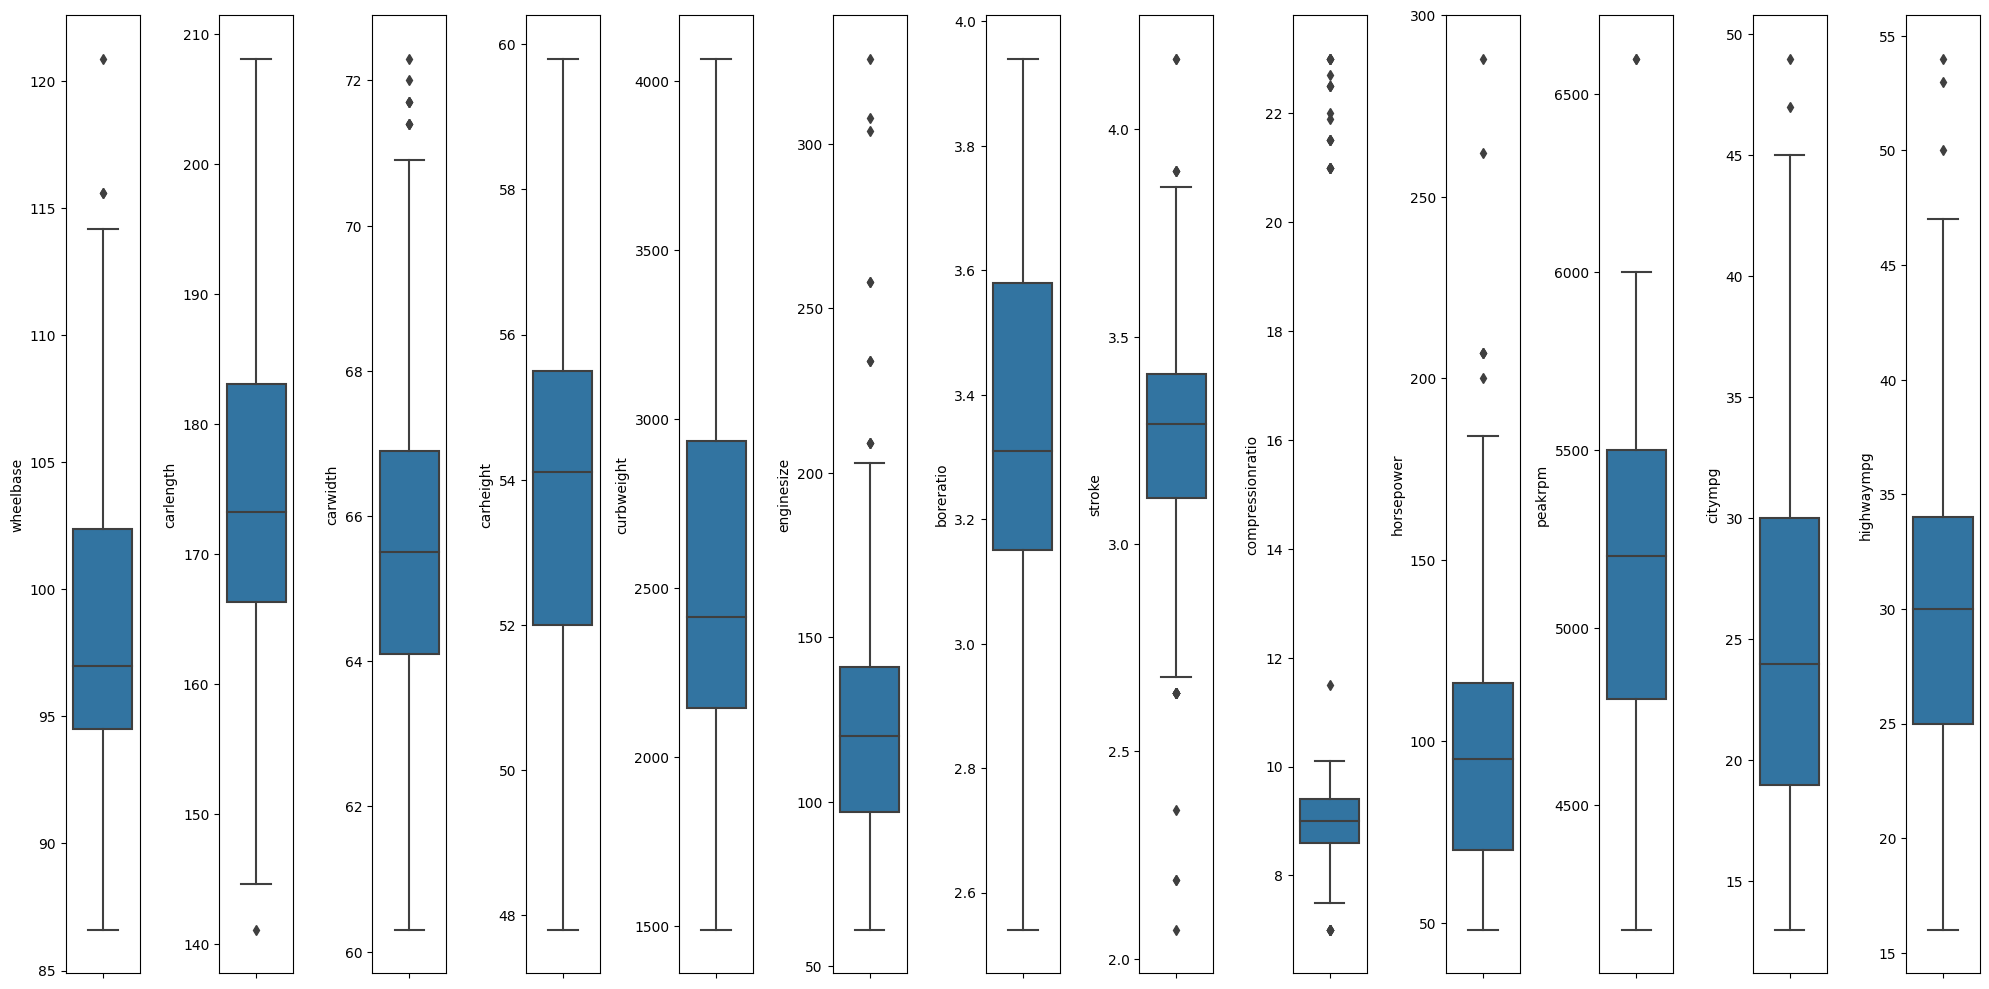

In [139]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [140]:
from sklearn.preprocessing import QuantileTransformer

In [141]:
qt = QuantileTransformer(n_quantiles=10, random_state=0) 
df[cont] = qt.fit_transform(df[cont])

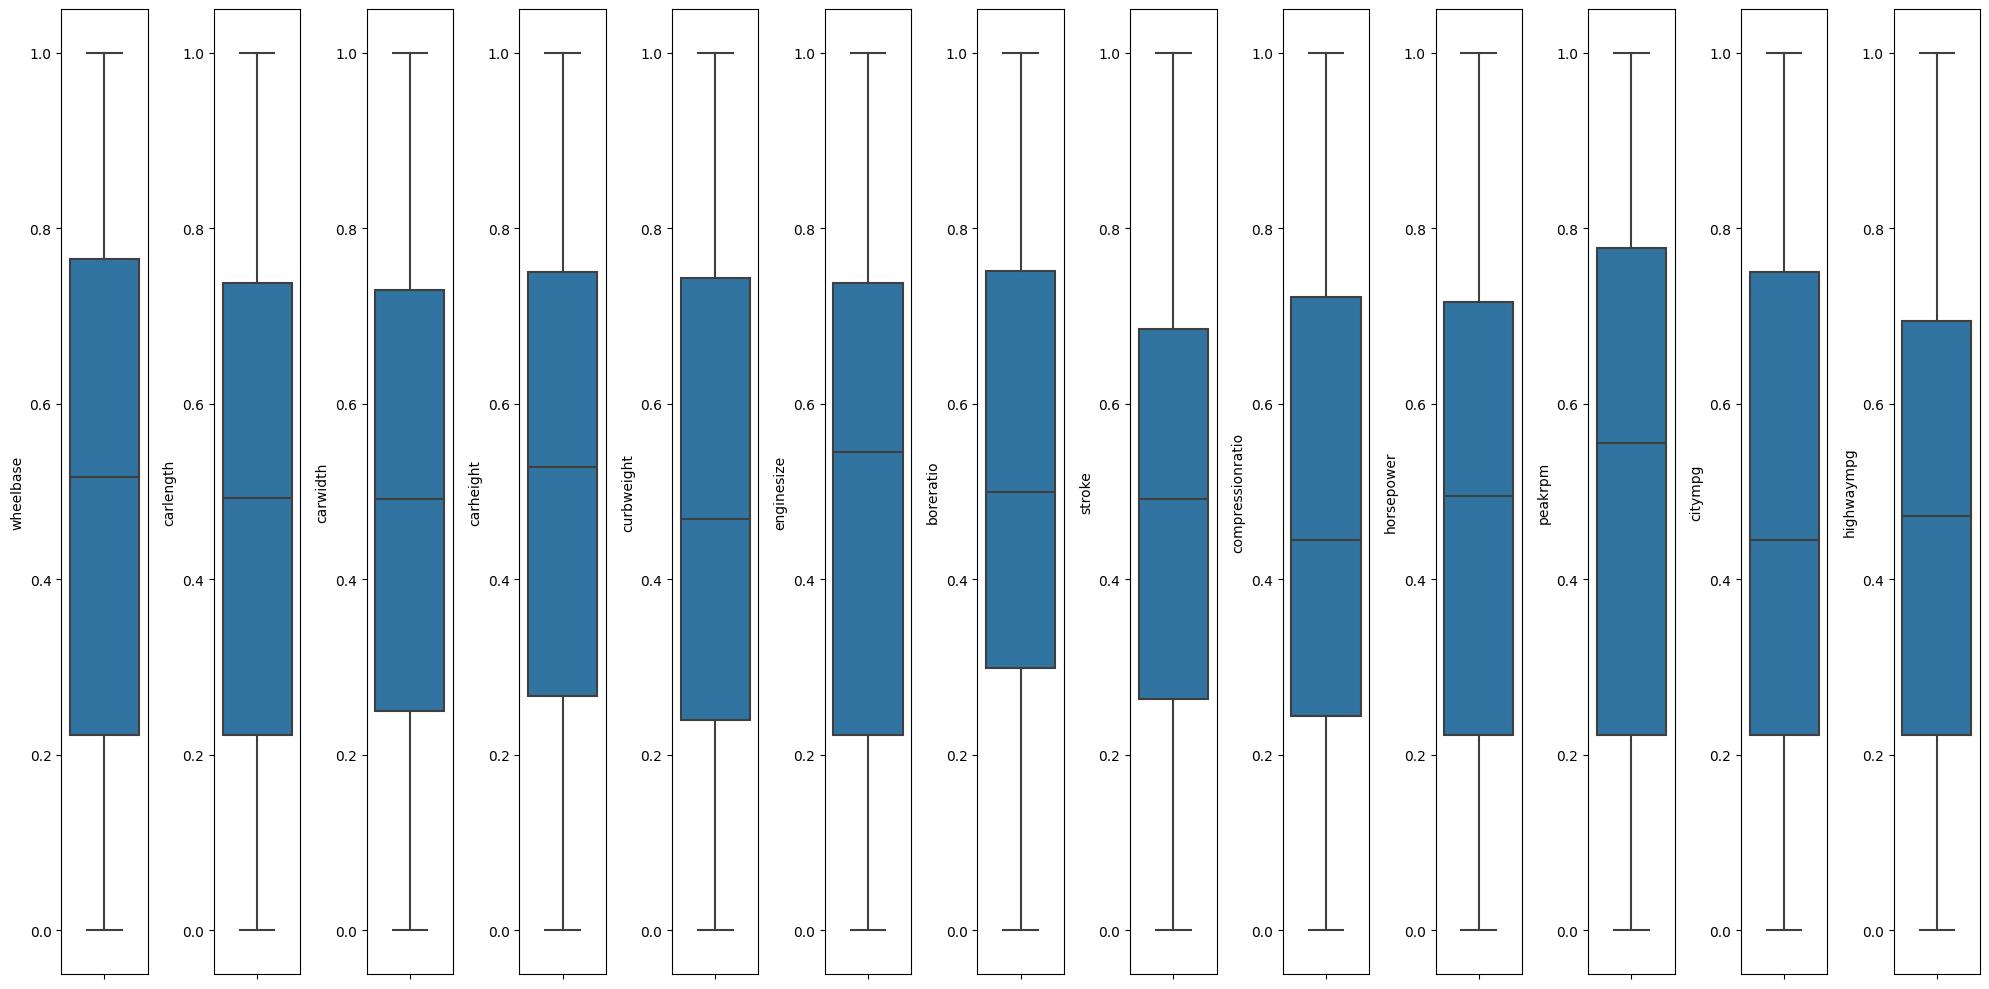

In [142]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

<Axes: >

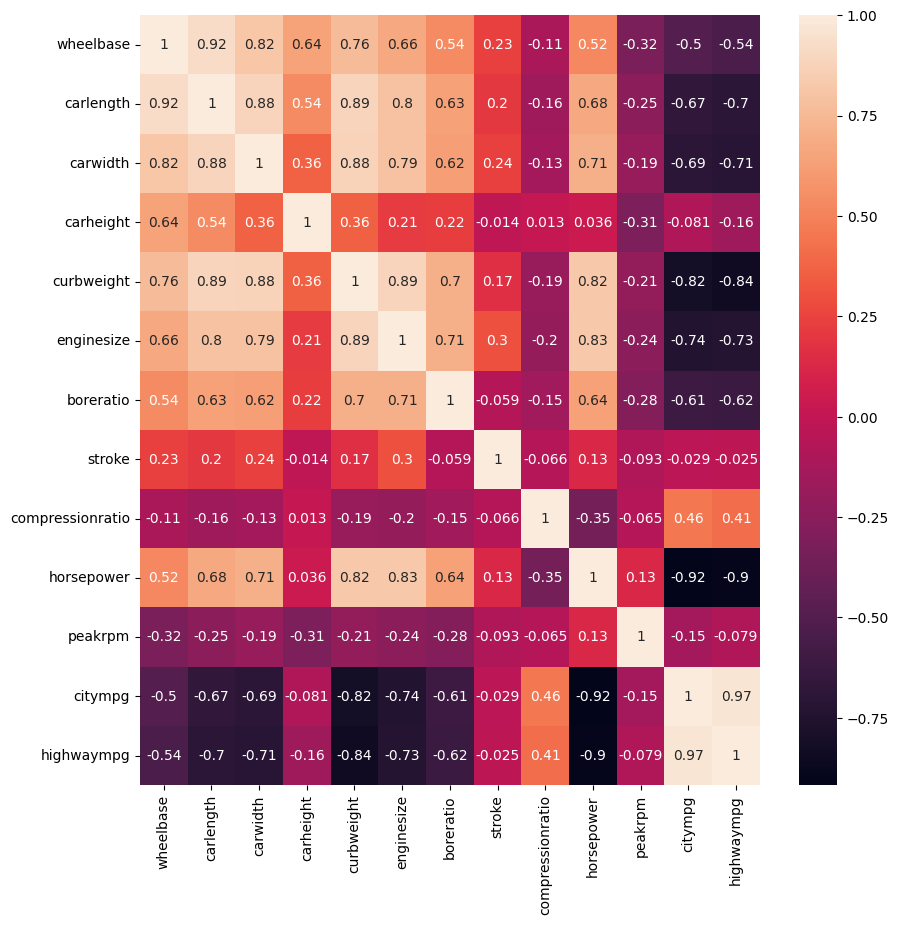

In [143]:
corr = df[cont].corr()
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(corr,  annot=True, ax=ax)

In [144]:
df.drop(['carlength', 'wheelbase', 'carwidth', 'citympg', 'compressionratio'], axis=1, inplace=True)

In [145]:
new_cont = [col for col in cont if col not in ['carlength', 'wheelbase', 'carwidth', 'citympg', 'compressionratio']]

<Axes: >

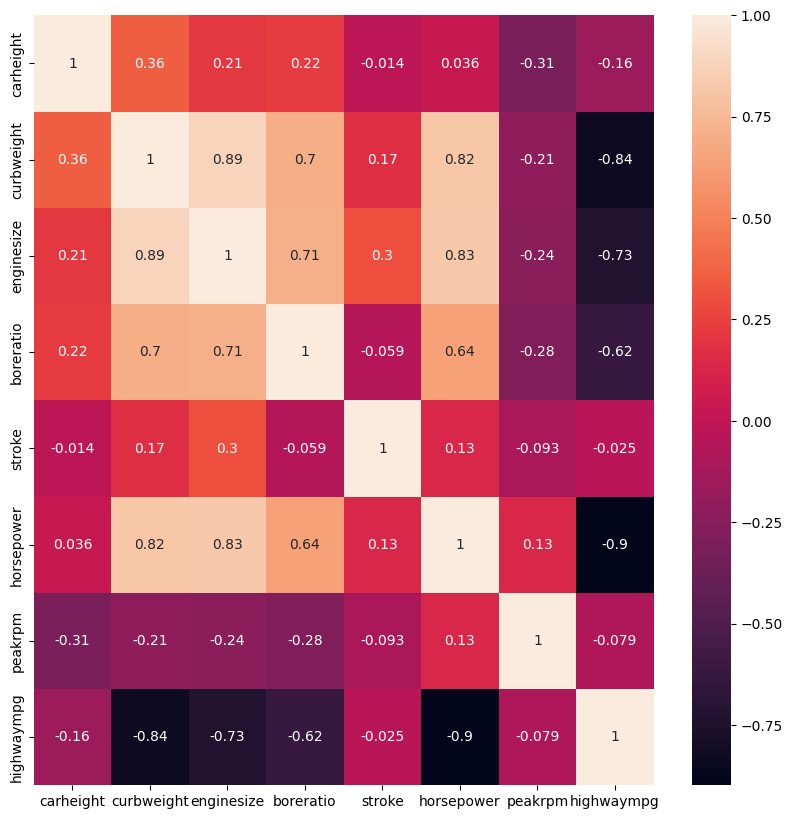

In [146]:
corr = df[new_cont].corr()
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(corr,  annot=True, ax=ax)

Все еще осталась достаточно высокая корреляция с расходом на трассе highwaympg 

Text(0.5, 1.0, 'Распределение цены')

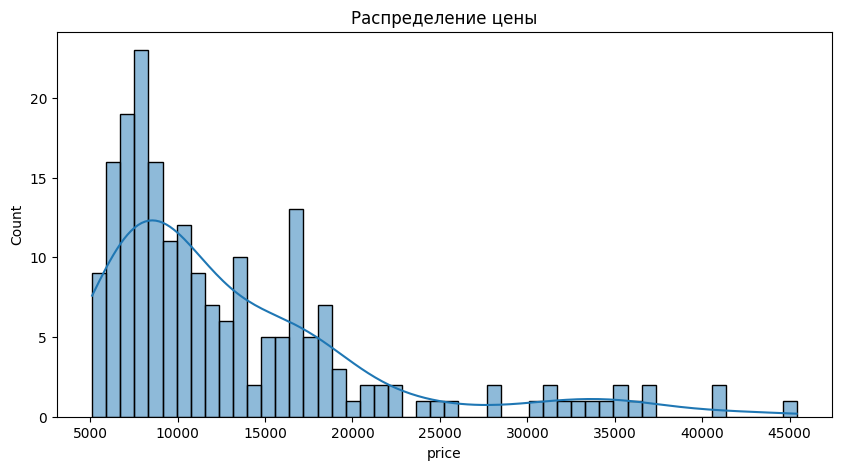

In [147]:
plt.figure(figsize=(10, 5))
sns.histplot(target, bins=50, kde=True)
plt.title('Распределение цены')

In [148]:
bool_columns = df.select_dtypes(include=[bool]).columns
df[bool_columns] = df[bool_columns].astype(int)

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Линейная регрессия с регуляризацией L2

In [28]:
from sklearn import linear_model

In [29]:
alphas = np.logspace(0, 2, 50)  # 50 значений в логарифмической шкале от 1 до 100
reg_ridge = linear_model.RidgeCV(alphas=alphas, cv=10)

In [30]:
reg_ridge = linear_model.RidgeCV()

In [31]:
reg_ridge.fit(X_train, y_train);

In [32]:
reg_ridge.score(X_test, y_test)

0.6814000723786834

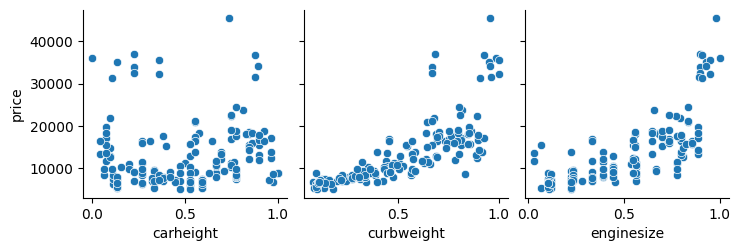

In [33]:
# выбираем фичи с наибольшией корреляцией с таргетом, чтобы отобразить на графике
top_features = corr.index[:3]
sns.pairplot(data=pd.concat([X_train[top_features], y_train], axis=1), 
             y_vars=['price'], 
             x_vars=top_features)

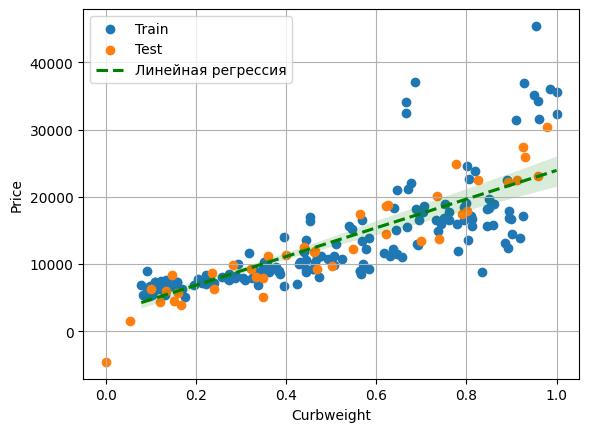

In [34]:
plt.scatter(X_train.curbweight, y_train, label='Train')
plt.scatter(X_test.curbweight, reg_ridge.predict(X_test), label='Test')
sns.regplot(x=X_train['curbweight'], 
            y=y_train, 
            scatter=False, 
            color='green', 
            line_kws={'linestyle': '--'},
            label='Линейная регрессия')
plt.xlabel('Curbweight')
plt.ylabel('Price')
plt.grid()
plt.legend()

In [35]:
reg_ridge.alpha_

1.0

In [36]:
reg_ridge.coef_

array([ -145.5924717 ,   465.1440047 ,  9884.81520545, -1341.15969674,
        2970.26562636, -1151.90790563, -1856.04309009,  4004.80508002,
        1168.63980638, -5335.42779404, -1372.63280503,  -688.21977642,
         207.62278568,  9691.75985463,  1220.89789193, -1798.33827092,
        -285.23167658, -3385.89133276,  1541.06115429,  3752.82889983,
        3375.79422824, -4153.67817475,  -130.1074792 ,   274.65980763,
        2923.44753627,  2631.54898456,   284.21001904,   440.32237752,
        1372.63280503, -1340.99149472,  -750.21322463, -2369.3737259 ,
       -2411.33975519])

In [37]:
np.mean(target)

13276.710570731706

In [38]:
reg_ridge.intercept_

11370.676253674848

Некоторые признаки могут быть избыточными или нерелевантными, но модель пытается их использовать, что приводит к большим коэффициентам. 

# Линейная регрессия с регуляризацией L1

In [39]:
reg_lasso = linear_model.LassoCV(alphas=alphas, cv=10)

In [40]:
reg_lasso.fit(X_train,y_train);
reg_lasso.score(X_test,y_test)

0.6847671727852566

In [41]:
reg_lasso.coef_

array([   -0.        ,     0.        , 14318.04383673, -1002.06094637,
           0.        ,    -0.        ,    -0.        ,   848.51020274,
         211.224917  , -3142.63624953,    -0.        ,    -0.        ,
           0.        , 12736.94821793,     0.        , -1311.03477421,
           0.        , -3220.84433712,     0.        ,  2704.21464266,
           0.        , -4226.43896721,  -195.82372287,    -0.        ,
        3015.98533585,     0.        ,    -0.        ,     0.        ,
           0.        ,    -0.        ,     0.        ,  -971.79390483,
          -0.        ])

In [42]:
sum(reg_lasso.coef_ != 0)

13

In [43]:
ind = np.array(range(33))
nnzero = ind[np.abs(reg_lasso.coef_) != 0]

In [44]:
df.columns[nnzero]

Index(['curbweight', 'cylindernumber', 'horsepower', 'peakrpm', 'highwaympg',
       'enginelocation_rear', 'carbody_hatchback', 'carbody_wagon',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcv',
       'fuelsystem_spdi'],
      dtype='object')

In [45]:
reg_ridge.intercept_

11370.676253674848

Кол-во ненулевых коэффициентов ниже кол-ва всех коэффицентов, действительно, много нерелевантных столбцов

# Линейная регрессия ElasticNet

In [46]:
l1_ratio = np.linspace(1e-2, 1, 20)

In [47]:
reg_elasticnet = linear_model.ElasticNetCV(cv=10,
                                           alphas=alphas,
                                           l1_ratio=l1_ratio,
                                           max_iter=10000,
                                           random_state=42)

In [48]:
reg_elasticnet.fit(X_train,y_train);

In [49]:
reg_elasticnet.score(X_test,y_test)

0.6847671727852566

In [50]:
reg_elasticnet.alpha_

56.89866029018296

In [51]:
reg_elasticnet.l1_ratio_

1.0

Вывод: Так ка l1_ratio=1.0, то эластикнет перешел в лассо регресию. То есть м
Модель автоматическ (обнуляет коэффициенты неважных переменнх Подтверждается, чтотно, присутствуют избыточные или слабовлияющие признаки, котодолжны быть исключеныю Большое значение альфа говорит о том, что есть очень большой штраф за сложность модели. Это может привести к недообучению и к о
Обнулению коэффициентов даже для некоторых важных признаков.чил.

# Ядерная регрессия

In [52]:
from sklearn import kernel_ridge

In [53]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = kernel_ridge.KernelRidge(kernel=kernel, alpha=alphas)
    model.fit(X_train, y_train)
    print(f"{kernel}: {model.score(X_test, y_test):.3f}")

linear: 0.680
poly: 0.720
rbf: 0.628


In [54]:
for degree in range(2, 15):
    model = kernel_ridge.KernelRidge(kernel='poly', degree=degree, alpha=0.1)
    model.fit(X_train, y_train)
    print(f"poly (degree={degree}): {model.score(X_test, y_test):.3f}")

poly (degree=2): 0.788
poly (degree=3): 0.836
poly (degree=4): 0.850
poly (degree=5): 0.853
poly (degree=6): 0.852
poly (degree=7): 0.853
poly (degree=8): 0.855
poly (degree=9): 0.858
poly (degree=10): 0.858
poly (degree=11): 0.855
poly (degree=12): 0.852
poly (degree=13): 0.854
poly (degree=14): 0.857


Вывод: Возможно, данные имеют нелинейную зависимость, которую полиномиальное преобразование успешно улавливает.

# Нейронная сеть (MLP)

In [55]:
from sklearn import neural_network
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [56]:
reg_mlp = neural_network.MLPRegressor(random_state=42,
                                      hidden_layer_sizes=(64,),
                                      alpha=0.001,
                                      max_iter=1000,
                                      batch_size=32,
                                      early_stopping=True
                                      )

In [57]:
reg_mlp.fit(X_train,y_train);
reg_mlp.score(X_test,y_test)

C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1124947082097133

In [58]:
import warnings
param_grid = {
    'hidden_layer_sizes': [(64,), (128, 64), (128, 64, 32)],
    'alpha': np.logspace(-4, -1, 5),
    'learning_rate_init': np.linspace(0.001, 0.1, 5)
}

warnings.filterwarnings("ignore")
mlp = MLPRegressor(max_iter=1000, early_stopping=True)
grid = GridSearchCV(mlp, param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучший R²:", grid.best_score_)

Лучшие параметры: {'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.07525000000000001}
Лучший R²: 0.6548792383672057


In [59]:
reg_mlp = neural_network.MLPRegressor(random_state=42,
                                      hidden_layer_sizes=(128, 64),
                                      alpha=0.003,
                                      max_iter=1000,
                                      batch_size=32,
                                      early_stopping=True,
                                      learning_rate_init=0.1
                                      )

In [60]:
reg_mlp.fit(X_train,y_train);
reg_mlp.score(X_test,y_test)

0.8399592284095796

In [61]:
reg_mlp.score(X_train,y_train)

0.9390313083200067

Как можно заметить, наступило переобучение. Также из-за ограниченного кол-ва комбинаций гиперпарамтров модель могла не попасть в оптимальные значения

# KNN

In [62]:
from sklearn import neighbors

In [63]:
scores = []
n_max = 10
for i in range(1, n_max + 1):
  reg_knn = neighbors.KNeighborsRegressor(n_neighbors=i, weights='uniform', p=2)
  reg_knn.fit(X_train,y_train);
  scores.append(reg_knn.score(X_test,y_test))

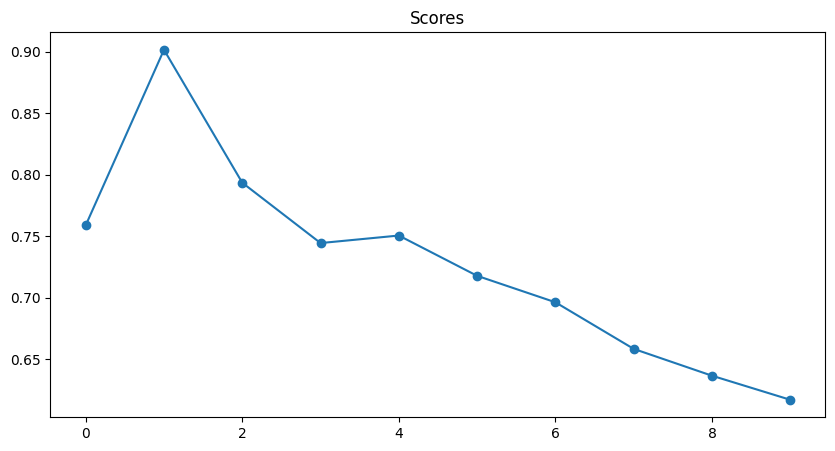

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(scores,'-o')
plt.title('Scores')
plt.show()

In [65]:
reg_knn = neighbors.KNeighborsRegressor(n_neighbors=2, weights='uniform', p=2)

In [66]:
reg_knn.fit(X_train,y_train);
reg_knn.score(X_test,y_test)

0.901627427963608

In [67]:
reg_knn.score(X_train, y_train)

0.9085606493265808

В данных могут существовать четкие локальные зависимости

# Pytorch

In [68]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T

In [69]:
X_train, X_dum, y_train, y_dum = train_test_split(df.values, target.values, test_size=0.1, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_dum, y_dum, test_size=0.5, random_state=42)

In [70]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # вычисления на графическом процессоре, если возможно
device

'cpu'

In [71]:
class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.FloatTensor(data)
        self.targets = torch.FloatTensor(targets)
    
    def __getitem__(self, index):
        return self.data[index], self.targets[index]
    
    def __len__(self):
        return len(self.data)

In [72]:
train_dataset = MyDataset(X_train, y_train)
val_dataset = MyDataset(X_val, y_val)
test_dataset = MyDataset(X_test, y_test)

In [73]:
print(f'''Длина тестовой выборки: {len(test_dataset)}
Длина валидационной выборки: {len(val_dataset)}
Длина тренировочной выборки: {len(train_dataset)}''')

Длина тестовой выборки: 10
Длина валидационной выборки: 11
Длина тренировочной выборки: 184


In [74]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) 
val_loader = DataLoader(val_dataset, shuffle=True)
test_loader = DataLoader(test_dataset, shuffle=True)

In [75]:
class SimpleREG(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Уменьшили размер слоя
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        return self.fc3(x)

In [76]:
model = SimpleREG(X_train.shape[1])
model.to(device);

In [77]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=0.003)

In [78]:
from tqdm import tqdm

In [79]:
train_losses=[]
def train(model,epoch):
  print('\nEpoch : %d'%epoch)
  model.train() # веса модели можно обновлять
  running_loss = 0
  for data in tqdm(train_loader):
      inputs, targets = data[0].to(device),data[1].to(device) # распаковываем пакеты
      optimizer.zero_grad() # обнуляем градиенты
      outputs = model(inputs) # считаем предсказания - прямой проход модели
      loss = criterion(outputs,targets) # ошибка пакета
      loss.backward() # обратное распространение ошибки
      optimizer.step() # итерация алгоритма оптимизации

      running_loss += loss.item()

      for name, param in model.named_parameters():
          if param.grad is not None:
              print(f"{name}: max_grad={param.grad.abs().max()}")

  train_loss = running_loss / len(train_loader)
  train_losses.append(train_loss)
  print('Ошибка обучения в эпохе: %.4f'%(train_loss))

In [80]:
val_losses=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss = 0
    with torch.no_grad(): # запрещаем переисывать градиенты
        for data in tqdm(val_loader):
            inputs, targets = data[0].to(device),data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs,targets)
            running_loss += loss.item()
        val_loss = running_loss / len(val_loader)
        val_losses.append(val_loss)
        print('Ошибка валидации в эпохе: %.4f:'%(val_loss))

In [81]:
max_epochs=200
for epoch in range(1,max_epochs+1):
    train(model,epoch)
    val(model,epoch)


Epoch : 1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.87it/s]


fc1.weight: max_grad=2526.841796875
fc1.bias: max_grad=1080.4796142578125
fc2.weight: max_grad=2287.517333984375
fc2.bias: max_grad=2640.298828125
fc3.weight: max_grad=9796.560546875
fc3.bias: max_grad=21271.01953125
fc1.weight: max_grad=28867.310546875
fc1.bias: max_grad=12731.79296875
fc2.weight: max_grad=11186.2421875
fc2.bias: max_grad=5579.80078125
fc3.weight: max_grad=241751.53125
fc3.bias: max_grad=24313.52734375
fc1.weight: max_grad=77183.6796875
fc1.bias: max_grad=40692.4140625
fc2.weight: max_grad=29448.423828125
fc2.bias: max_grad=9327.103515625
fc3.weight: max_grad=931527.75
fc3.bias: max_grad=30350.38671875
fc1.weight: max_grad=145475.984375
fc1.bias: max_grad=68011.78125
fc2.weight: max_grad=45222.28125
fc2.bias: max_grad=10212.5224609375
fc3.weight: max_grad=1695477.125
fc3.bias: max_grad=27278.97265625
fc1.weight: max_grad=202478.40625
fc1.bias: max_grad=95286.1875
fc2.weight: max_grad=60345.08203125
fc2.bias: max_grad=10923.458984375
fc3.weight: max_grad=2517834.0
fc3.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.71it/s]

Ошибка валидации в эпохе: 114155011.0114:

Epoch : 2



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.16it/s]


fc1.weight: max_grad=471712.78125
fc1.bias: max_grad=217877.78125
fc2.weight: max_grad=128617.9140625
fc2.bias: max_grad=16047.392578125
fc3.weight: max_grad=6351572.0
fc3.bias: max_grad=24524.828125
fc1.weight: max_grad=221587.578125
fc1.bias: max_grad=104753.3828125
fc2.weight: max_grad=63087.65625
fc2.bias: max_grad=7279.02587890625
fc3.weight: max_grad=3407008.5
fc3.bias: max_grad=9348.23828125
fc1.weight: max_grad=343445.03125
fc1.bias: max_grad=173473.53125
fc2.weight: max_grad=107256.203125
fc2.bias: max_grad=10023.6640625
fc3.weight: max_grad=5664391.0
fc3.bias: max_grad=11352.8466796875
fc1.weight: max_grad=121988.484375
fc1.bias: max_grad=60187.09375
fc2.weight: max_grad=34054.27734375
fc2.bias: max_grad=3178.506103515625
fc3.weight: max_grad=1785685.875
fc3.bias: max_grad=3131.18310546875
fc1.weight: max_grad=433179.65625
fc1.bias: max_grad=176793.53125
fc2.weight: max_grad=112229.859375
fc2.bias: max_grad=7917.1376953125
fc3.weight: max_grad=6220232.5
fc3.bias: max_grad=728

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.10it/s]


Ошибка валидации в эпохе: 107567711.6348:

Epoch : 3


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.84it/s]


fc1.weight: max_grad=613448.1875
fc1.bias: max_grad=284501.03125
fc2.weight: max_grad=178687.21875
fc2.bias: max_grad=12135.15234375
fc3.weight: max_grad=9891710.0
fc3.bias: max_grad=11061.44921875
fc1.weight: max_grad=541364.5625
fc1.bias: max_grad=201179.25
fc2.weight: max_grad=129516.3203125
fc2.bias: max_grad=8467.15234375
fc3.weight: max_grad=7140594.0
fc3.bias: max_grad=8089.2958984375
fc1.weight: max_grad=276276.59375
fc1.bias: max_grad=141111.9375
fc2.weight: max_grad=89636.390625
fc2.bias: max_grad=6344.4873046875
fc3.weight: max_grad=4903468.0
fc3.bias: max_grad=6203.04638671875
fc1.weight: max_grad=63865.02734375
fc1.bias: max_grad=11264.302734375
fc2.weight: max_grad=10806.34765625
fc2.bias: max_grad=424.85845947265625
fc3.weight: max_grad=399875.5
fc3.bias: max_grad=329.4162292480469
fc1.weight: max_grad=249896.09375
fc1.bias: max_grad=137879.8125
fc2.weight: max_grad=75121.4921875
fc2.bias: max_grad=6553.833984375
fc3.weight: max_grad=4092898.5
fc3.bias: max_grad=7427.928

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1830.41it/s]


Ошибка валидации в эпохе: 49614526.5554:

Epoch : 4


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.55it/s]


fc1.weight: max_grad=187100.453125
fc1.bias: max_grad=96424.796875
fc2.weight: max_grad=55818.00390625
fc2.bias: max_grad=5100.255859375
fc3.weight: max_grad=3027252.75
fc3.bias: max_grad=6074.3203125
fc1.weight: max_grad=409788.0625
fc1.bias: max_grad=190488.28125
fc2.weight: max_grad=121093.65625
fc2.bias: max_grad=10984.48046875
fc3.weight: max_grad=6662875.0
fc3.bias: max_grad=12461.3642578125
fc1.weight: max_grad=172804.234375
fc1.bias: max_grad=92069.515625
fc2.weight: max_grad=53880.609375
fc2.bias: max_grad=4948.5361328125
fc3.weight: max_grad=2866368.0
fc3.bias: max_grad=5700.42626953125
fc1.weight: max_grad=235449.53125
fc1.bias: max_grad=108110.5703125
fc2.weight: max_grad=62368.30859375
fc2.bias: max_grad=5692.0791015625
fc3.weight: max_grad=3438481.5
fc3.bias: max_grad=6881.083984375
fc1.weight: max_grad=380140.0625
fc1.bias: max_grad=172020.609375
fc2.weight: max_grad=99193.015625
fc2.bias: max_grad=8516.8232421875
fc3.weight: max_grad=5464033.0
fc3.bias: max_grad=10325.9

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.71it/s]


Ошибка валидации в эпохе: 42584329.8523:

Epoch : 5


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.66it/s]


fc1.weight: max_grad=113376.6953125
fc1.bias: max_grad=68684.96875
fc2.weight: max_grad=40974.80078125
fc2.bias: max_grad=3387.54931640625
fc3.weight: max_grad=2171041.75
fc3.bias: max_grad=3511.976806640625
fc1.weight: max_grad=97734.1015625
fc1.bias: max_grad=44873.87890625
fc2.weight: max_grad=29055.029296875
fc2.bias: max_grad=2065.992431640625
fc3.weight: max_grad=1644012.125
fc3.bias: max_grad=1920.252197265625
fc1.weight: max_grad=182519.015625
fc1.bias: max_grad=68009.328125
fc2.weight: max_grad=42187.5078125
fc2.bias: max_grad=2955.50244140625
fc3.weight: max_grad=2360918.25
fc3.bias: max_grad=2945.62060546875
fc1.weight: max_grad=244750.828125
fc1.bias: max_grad=105126.15625
fc2.weight: max_grad=67275.7734375
fc2.bias: max_grad=4524.4677734375
fc3.weight: max_grad=3692470.75
fc3.bias: max_grad=4146.4423828125
fc1.weight: max_grad=321577.65625
fc1.bias: max_grad=139527.0625
fc2.weight: max_grad=90636.8203125
fc2.bias: max_grad=6443.84814453125
fc3.weight: max_grad=5206497.0
fc

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 987.40it/s]


Ошибка валидации в эпохе: 54036239.6364:

Epoch : 6


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.74it/s]


fc1.weight: max_grad=372704.40625
fc1.bias: max_grad=160195.84375
fc2.weight: max_grad=96629.75
fc2.bias: max_grad=6997.0517578125
fc3.weight: max_grad=5475362.5
fc3.bias: max_grad=6737.01513671875
fc1.weight: max_grad=165975.8125
fc1.bias: max_grad=65447.52734375
fc2.weight: max_grad=43036.26953125
fc2.bias: max_grad=2905.35107421875
fc3.weight: max_grad=2333631.25
fc3.bias: max_grad=2765.1923828125
fc1.weight: max_grad=51634.52734375
fc1.bias: max_grad=28675.568359375
fc2.weight: max_grad=18007.921875
fc2.bias: max_grad=1425.174560546875
fc3.weight: max_grad=880352.125
fc3.bias: max_grad=1595.2109375
fc1.weight: max_grad=240864.109375
fc1.bias: max_grad=126278.96875
fc2.weight: max_grad=73759.2109375
fc2.bias: max_grad=6159.9091796875
fc3.weight: max_grad=4159397.25
fc3.bias: max_grad=6597.8515625
fc1.weight: max_grad=113378.7578125
fc1.bias: max_grad=60283.5234375
fc2.weight: max_grad=33549.84375
fc2.bias: max_grad=2875.908203125
fc3.weight: max_grad=1798167.5
fc3.bias: max_grad=317

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1196.38it/s]


Ошибка валидации в эпохе: 44778063.3971:

Epoch : 7


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.10it/s]


fc1.weight: max_grad=36975.15625
fc1.bias: max_grad=13422.169921875
fc2.weight: max_grad=10072.712890625
fc2.bias: max_grad=657.4912719726562
fc3.weight: max_grad=507665.75
fc3.bias: max_grad=399.07574462890625
fc1.weight: max_grad=259800.46875
fc1.bias: max_grad=123238.453125
fc2.weight: max_grad=70631.21875
fc2.bias: max_grad=5501.333984375
fc3.weight: max_grad=3647708.25
fc3.bias: max_grad=6281.67578125
fc1.weight: max_grad=16675.068359375
fc1.bias: max_grad=7279.3779296875
fc2.weight: max_grad=6056.1298828125
fc2.bias: max_grad=413.5256652832031
fc3.weight: max_grad=202389.453125
fc3.bias: max_grad=317.4016418457031
fc1.weight: max_grad=151750.125
fc1.bias: max_grad=91482.46875
fc2.weight: max_grad=53108.984375
fc2.bias: max_grad=4408.57666015625
fc3.weight: max_grad=2849465.5
fc3.bias: max_grad=4580.07421875
fc1.weight: max_grad=134001.890625
fc1.bias: max_grad=60788.26171875
fc2.weight: max_grad=34543.0546875
fc2.bias: max_grad=2699.81103515625
fc3.weight: max_grad=1857311.625
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.99it/s]


Ошибка валидации в эпохе: 51959723.5909:

Epoch : 8


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.77it/s]

fc1.weight: max_grad=91155.546875
fc1.bias: max_grad=38430.3359375
fc2.weight: max_grad=23606.205078125
fc2.bias: max_grad=1467.40673828125
fc3.weight: max_grad=1215389.75
fc3.bias: max_grad=1362.2315673828125
fc1.weight: max_grad=32173.8671875
fc1.bias: max_grad=9199.8173828125
fc2.weight: max_grad=10663.080078125
fc2.bias: max_grad=356.6909484863281
fc3.weight: max_grad=423212.15625
fc3.bias: max_grad=138.9116668701172
fc1.weight: max_grad=192206.625
fc1.bias: max_grad=80071.8046875
fc2.weight: max_grad=48273.94921875
fc2.bias: max_grad=3354.20166015625
fc3.weight: max_grad=2647651.5
fc3.bias: max_grad=3155.8349609375
fc1.weight: max_grad=545124.6875
fc1.bias: max_grad=261699.625
fc2.weight: max_grad=150281.484375
fc2.bias: max_grad=10284.787109375
fc3.weight: max_grad=8171485.5
fc3.bias: max_grad=10056.8994140625
fc1.weight: max_grad=149152.875
fc1.bias: max_grad=62217.77734375
fc2.weight: max_grad=38768.00390625
fc2.bias: max_grad=2364.540283203125
fc3.weight: max_grad=1996443.75
f

Ошибка обучения в эпохе: 68846102.0000

Epoch : 8


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1099.32it/s]


Ошибка валидации в эпохе: 48203905.8182:

Epoch : 9


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=67102.5546875
fc1.bias: max_grad=30290.712890625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 204.89it/s]

fc2.weight: max_grad=20208.2578125
fc2.bias: max_grad=1376.958984375
fc3.weight: max_grad=1052057.5
fc3.bias: max_grad=1156.056884765625
fc1.weight: max_grad=24650.39453125
fc1.bias: max_grad=7356.16357421875
fc2.weight: max_grad=5253.4404296875
fc2.bias: max_grad=355.7926025390625
fc3.weight: max_grad=161973.21875
fc3.bias: max_grad=356.7462158203125
fc1.weight: max_grad=339996.0
fc1.bias: max_grad=161099.125
fc2.weight: max_grad=91654.7265625
fc2.bias: max_grad=7162.2177734375
fc3.weight: max_grad=4774839.0
fc3.bias: max_grad=8296.462890625
fc1.weight: max_grad=158654.921875
fc1.bias: max_grad=65542.234375
fc2.weight: max_grad=36928.17578125
fc2.bias: max_grad=3032.6474609375
fc3.weight: max_grad=2012023.625
fc3.bias: max_grad=3485.2255859375
fc1.weight: max_grad=194734.5
fc1.bias: max_grad=98848.53125
fc2.weight: max_grad=61160.796875
fc2.bias: max_grad=4800.3486328125
fc3.weight: max_grad=3162418.0
fc3.bias: max_grad=5205.77587890625
fc1.weight: max_grad=406165.84375
fc1.bias: max_


Epoch : 9


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1073.69it/s]


Ошибка валидации в эпохе: 46242967.3107:

Epoch : 10


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 199.99it/s]

fc1.weight: max_grad=212454.671875
fc1.bias: max_grad=105497.140625
fc2.weight: max_grad=62643.40234375
fc2.bias: max_grad=4776.35107421875
fc3.weight: max_grad=3134847.5
fc3.bias: max_grad=5236.06396484375
fc1.weight: max_grad=310507.84375
fc1.bias: max_grad=142606.6875
fc2.weight: max_grad=85614.359375
fc2.bias: max_grad=6469.509765625
fc3.weight: max_grad=4573623.0
fc3.bias: max_grad=7061.3916015625
fc1.weight: max_grad=293733.8125
fc1.bias: max_grad=143035.640625
fc2.weight: max_grad=85097.9296875
fc2.bias: max_grad=6324.1650390625
fc3.weight: max_grad=4721473.5
fc3.bias: max_grad=6462.78759765625
fc1.weight: max_grad=119213.1484375
fc1.bias: max_grad=67889.3125
fc2.weight: max_grad=37657.65234375
fc2.bias: max_grad=2927.74072265625
fc3.weight: max_grad=2081510.875
fc3.bias: max_grad=3111.530029296875
fc1.weight: max_grad=328103.125
fc1.bias: max_grad=137176.609375
fc2.weight: max_grad=82853.4765625
fc2.bias: max_grad=5806.06298828125
fc3.weight: max_grad=4574617.0
fc3.bias: max_gr

Ошибка обучения в эпохе: 67019331.6667

Epoch : 10


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 912.44it/s]


Ошибка валидации в эпохе: 57050255.2727:

Epoch : 11


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 214.26it/s]


fc1.weight: max_grad=34672.28515625
fc1.bias: max_grad=22180.962890625
fc2.weight: max_grad=16723.25390625
fc2.bias: max_grad=1062.44580078125
fc3.weight: max_grad=716003.4375
fc3.bias: max_grad=757.6607666015625
fc1.weight: max_grad=460525.0
fc1.bias: max_grad=213586.0625
fc2.weight: max_grad=129599.34375
fc2.bias: max_grad=8882.02734375
fc3.weight: max_grad=6770080.5
fc3.bias: max_grad=8572.146484375
fc1.weight: max_grad=146465.078125
fc1.bias: max_grad=67524.3828125
fc2.weight: max_grad=44160.76953125
fc2.bias: max_grad=2763.364013671875
fc3.weight: max_grad=2233045.0
fc3.bias: max_grad=2607.25537109375
fc1.weight: max_grad=61338.546875
fc1.bias: max_grad=27814.732421875
fc2.weight: max_grad=15874.701171875
fc2.bias: max_grad=967.7962036132812
fc3.weight: max_grad=585276.4375
fc3.bias: max_grad=1085.7430419921875
fc1.weight: max_grad=137627.796875
fc1.bias: max_grad=61234.1484375
fc2.weight: max_grad=38873.40625
fc2.bias: max_grad=2739.05126953125
fc3.weight: max_grad=1943666.375
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.06it/s]


Ошибка валидации в эпохе: 43344808.8530:

Epoch : 12


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 239.95it/s]


fc1.weight: max_grad=45282.15625
fc1.bias: max_grad=21376.419921875
fc2.weight: max_grad=14987.630859375
fc2.bias: max_grad=1180.4034423828125
fc3.weight: max_grad=795166.625
fc3.bias: max_grad=1106.372802734375
fc1.weight: max_grad=86833.0546875
fc1.bias: max_grad=47846.140625
fc2.weight: max_grad=27373.01953125
fc2.bias: max_grad=2112.07421875
fc3.weight: max_grad=1351628.375
fc3.bias: max_grad=2357.788818359375
fc1.weight: max_grad=303815.90625
fc1.bias: max_grad=147863.71875
fc2.weight: max_grad=88287.09375
fc2.bias: max_grad=6784.87353515625
fc3.weight: max_grad=4555986.0
fc3.bias: max_grad=7223.9521484375
fc1.weight: max_grad=113098.6796875
fc1.bias: max_grad=47610.65234375
fc2.weight: max_grad=30259.734375
fc2.bias: max_grad=2219.683349609375
fc3.weight: max_grad=1506124.25
fc3.bias: max_grad=2369.11865234375
fc1.weight: max_grad=77084.78125
fc1.bias: max_grad=38182.03515625
fc2.weight: max_grad=24059.25
fc2.bias: max_grad=1867.586669921875
fc3.weight: max_grad=1274937.75
fc3.bi

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1537.19it/s]


Ошибка валидации в эпохе: 45737403.8636:

Epoch : 13


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=235552.4375
fc1.bias: max_grad=112216.8828125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 222.25it/s]


fc2.weight: max_grad=71698.8515625
fc2.bias: max_grad=4617.3974609375
fc3.weight: max_grad=3664272.5
fc3.bias: max_grad=4377.01171875
fc1.weight: max_grad=24691.375
fc1.bias: max_grad=11982.80078125
fc2.weight: max_grad=9728.138671875
fc2.bias: max_grad=639.8024291992188
fc3.weight: max_grad=390666.71875
fc3.bias: max_grad=549.5980224609375
fc1.weight: max_grad=17517.44140625
fc1.bias: max_grad=9853.0224609375
fc2.weight: max_grad=6615.0341796875
fc2.bias: max_grad=353.6046447753906
fc3.weight: max_grad=156542.15625
fc3.bias: max_grad=253.9090576171875
fc1.weight: max_grad=169390.484375
fc1.bias: max_grad=58307.0859375
fc2.weight: max_grad=41087.2734375
fc2.bias: max_grad=2297.81298828125
fc3.weight: max_grad=2004545.875
fc3.bias: max_grad=2021.9805908203125
fc1.weight: max_grad=49915.68359375
fc1.bias: max_grad=14300.818359375
fc2.weight: max_grad=17329.158203125
fc2.bias: max_grad=940.11181640625
fc3.weight: max_grad=883516.0
fc3.bias: max_grad=244.81948852539062
fc1.weight: max_grad

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2203.21it/s]


Ошибка валидации в эпохе: 47769672.3182:

Epoch : 14


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.89it/s]


fc1.weight: max_grad=132709.265625
fc1.bias: max_grad=50666.9375
fc2.weight: max_grad=32130.53515625
fc2.bias: max_grad=2102.394287109375
fc3.weight: max_grad=1676382.0
fc3.bias: max_grad=1964.516845703125
fc1.weight: max_grad=34089.69140625
fc1.bias: max_grad=18706.654296875
fc2.weight: max_grad=12936.3974609375
fc2.bias: max_grad=938.076904296875
fc3.weight: max_grad=556075.9375
fc3.bias: max_grad=799.0093383789062
fc1.weight: max_grad=70233.0390625
fc1.bias: max_grad=28128.8671875
fc2.weight: max_grad=18399.90625
fc2.bias: max_grad=1232.33447265625
fc3.weight: max_grad=848226.5625
fc3.bias: max_grad=1239.16455078125
fc1.weight: max_grad=72184.6875
fc1.bias: max_grad=36639.03125
fc2.weight: max_grad=25482.888671875
fc2.bias: max_grad=1564.81201171875
fc3.weight: max_grad=1225436.375
fc3.bias: max_grad=1380.2813720703125
fc1.weight: max_grad=179528.125
fc1.bias: max_grad=96846.671875
fc2.weight: max_grad=58879.24609375
fc2.bias: max_grad=4248.06591796875
fc3.weight: max_grad=3068623.2

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.49it/s]


Ошибка валидации в эпохе: 45819801.5909:

Epoch : 15


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 254.25it/s]

fc1.weight: max_grad=138136.796875
fc1.bias: max_grad=58481.984375
fc2.weight: max_grad=38520.32421875
fc2.bias: max_grad=2579.5673828125
fc3.weight: max_grad=2003587.875
fc3.bias: max_grad=2411.790771484375
fc1.weight: max_grad=19314.537109375
fc1.bias: max_grad=7972.00390625
fc2.weight: max_grad=7341.78125
fc2.bias: max_grad=320.02203369140625
fc3.weight: max_grad=309045.5625
fc3.bias: max_grad=88.90093994140625
fc1.weight: max_grad=255197.5625
fc1.bias: max_grad=103714.34375
fc2.weight: max_grad=63000.66796875
fc2.bias: max_grad=4891.638671875
fc3.weight: max_grad=3342940.25
fc3.bias: max_grad=5110.10888671875
fc1.weight: max_grad=41213.33984375
fc1.bias: max_grad=19763.75
fc2.weight: max_grad=13751.818359375
fc2.bias: max_grad=863.8505859375
fc3.weight: max_grad=531498.0
fc3.bias: max_grad=873.2052001953125
fc1.weight: max_grad=21513.37109375
fc1.bias: max_grad=7521.298828125
fc2.weight: max_grad=8873.7568359375
fc2.bias: max_grad=443.7332763671875
fc3.weight: max_grad=394427.1875



Epoch : 15


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1220.98it/s]


Ошибка валидации в эпохе: 46916839.8750:

Epoch : 16


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 207.76it/s]

fc1.weight: max_grad=120762.796875
fc1.bias: max_grad=56196.3046875
fc2.weight: max_grad=32052.630859375
fc2.bias: max_grad=2319.3701171875
fc3.weight: max_grad=1624767.0
fc3.bias: max_grad=2467.613037109375
fc1.weight: max_grad=260337.40625
fc1.bias: max_grad=120461.7109375
fc2.weight: max_grad=73717.1796875
fc2.bias: max_grad=4565.765625
fc3.weight: max_grad=3595853.0
fc3.bias: max_grad=4503.64453125
fc1.weight: max_grad=142117.953125
fc1.bias: max_grad=63002.3125
fc2.weight: max_grad=42959.4765625
fc2.bias: max_grad=2717.744140625
fc3.weight: max_grad=2182692.5
fc3.bias: max_grad=2448.607177734375
fc1.weight: max_grad=98702.9453125
fc1.bias: max_grad=36324.7890625
fc2.weight: max_grad=28663.240234375
fc2.bias: max_grad=1702.04443359375
fc3.weight: max_grad=1418757.625
fc3.bias: max_grad=1273.593505859375
fc1.weight: max_grad=260736.640625
fc1.bias: max_grad=124495.4609375
fc2.weight: max_grad=74881.5625
fc2.bias: max_grad=4986.0029296875
fc3.weight: max_grad=3794485.0
fc3.bias: max_


Epoch : 16


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1171.18it/s]


Ошибка валидации в эпохе: 47446707.6818:

Epoch : 17


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 237.38it/s]

fc1.weight: max_grad=163595.671875
fc1.bias: max_grad=76835.40625
fc2.weight: max_grad=48775.09765625
fc2.bias: max_grad=3608.6328125
fc3.weight: max_grad=2716562.75
fc3.bias: max_grad=3604.322021484375
fc1.weight: max_grad=30203.94140625
fc1.bias: max_grad=9752.041015625
fc2.weight: max_grad=6758.25048828125
fc2.bias: max_grad=384.3088684082031
fc3.weight: max_grad=242320.265625
fc3.bias: max_grad=280.2342529296875
fc1.weight: max_grad=272442.6875
fc1.bias: max_grad=129941.8203125
fc2.weight: max_grad=78335.3125
fc2.bias: max_grad=5145.68505859375
fc3.weight: max_grad=4021802.0
fc3.bias: max_grad=5235.0224609375
fc1.weight: max_grad=109160.234375
fc1.bias: max_grad=44323.6015625
fc2.weight: max_grad=27131.52734375
fc2.bias: max_grad=1718.62646484375
fc3.weight: max_grad=1359870.5
fc3.bias: max_grad=1644.718505859375
fc1.weight: max_grad=18874.2109375
fc1.bias: max_grad=10146.14453125
fc2.weight: max_grad=7022.3115234375
fc2.bias: max_grad=426.8462829589844
fc3.weight: max_grad=208277.


Epoch : 17


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.20it/s]


Ошибка валидации в эпохе: 43948728.4769:

Epoch : 18


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 219.38it/s]

fc1.weight: max_grad=36710.42578125
fc1.bias: max_grad=16533.125
fc2.weight: max_grad=10566.3291015625
fc2.bias: max_grad=776.1170043945312
fc3.weight: max_grad=489929.96875
fc3.bias: max_grad=774.7322998046875
fc1.weight: max_grad=40358.0390625
fc1.bias: max_grad=23095.3359375
fc2.weight: max_grad=15043.720703125
fc2.bias: max_grad=1168.472412109375
fc3.weight: max_grad=743208.375
fc3.bias: max_grad=1274.998046875
fc1.weight: max_grad=154109.203125
fc1.bias: max_grad=70394.6171875
fc2.weight: max_grad=42419.12109375
fc2.bias: max_grad=2809.259765625
fc3.weight: max_grad=2090047.25
fc3.bias: max_grad=2930.49658203125
fc1.weight: max_grad=209649.09375
fc1.bias: max_grad=96551.078125
fc2.weight: max_grad=59756.3203125
fc2.bias: max_grad=4370.88232421875
fc3.weight: max_grad=2967061.75
fc3.bias: max_grad=4518.5517578125
fc1.weight: max_grad=403091.71875
fc1.bias: max_grad=197733.890625
fc2.weight: max_grad=119981.1953125
fc2.bias: max_grad=8984.1962890625
fc3.weight: max_grad=6324007.5
fc


Epoch : 18


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.11it/s]


Ошибка валидации в эпохе: 45591112.5909:

Epoch : 19


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 243.97it/s]


fc1.weight: max_grad=177678.671875
fc1.bias: max_grad=83819.109375
fc2.weight: max_grad=50767.4453125
fc2.bias: max_grad=3620.29833984375
fc3.weight: max_grad=2676182.5
fc3.bias: max_grad=3574.5771484375
fc1.weight: max_grad=67691.9140625
fc1.bias: max_grad=23274.306640625
fc2.weight: max_grad=17804.265625
fc2.bias: max_grad=876.57568359375
fc3.weight: max_grad=842022.1875
fc3.bias: max_grad=628.5966186523438
fc1.weight: max_grad=208021.375
fc1.bias: max_grad=98073.765625
fc2.weight: max_grad=62023.9453125
fc2.bias: max_grad=4224.8720703125
fc3.weight: max_grad=3334826.0
fc3.bias: max_grad=3969.053466796875
fc1.weight: max_grad=119811.640625
fc1.bias: max_grad=39136.53515625
fc2.weight: max_grad=26044.5546875
fc2.bias: max_grad=1486.404541015625
fc3.weight: max_grad=1248006.125
fc3.bias: max_grad=1213.099365234375
fc1.weight: max_grad=117740.65625
fc1.bias: max_grad=52560.2890625
fc2.weight: max_grad=35864.05859375
fc2.bias: max_grad=2306.51171875
fc3.weight: max_grad=1845708.125
fc3.b

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1223.41it/s]


Ошибка валидации в эпохе: 44843609.5114:

Epoch : 20


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 240.02it/s]

fc1.weight: max_grad=182954.53125
fc1.bias: max_grad=83578.375
fc2.weight: max_grad=51438.828125
fc2.bias: max_grad=3683.843505859375
fc3.weight: max_grad=2685332.5
fc3.bias: max_grad=3748.8193359375
fc1.weight: max_grad=40080.73828125
fc1.bias: max_grad=13321.21875
fc2.weight: max_grad=11014.69140625
fc2.bias: max_grad=588.8750610351562
fc3.weight: max_grad=528830.5625
fc3.bias: max_grad=392.8446044921875
fc1.weight: max_grad=156355.15625
fc1.bias: max_grad=70182.765625
fc2.weight: max_grad=45039.54296875
fc2.bias: max_grad=2959.17529296875
fc3.weight: max_grad=2341133.5
fc3.bias: max_grad=2655.132080078125
fc1.weight: max_grad=294432.125
fc1.bias: max_grad=126383.765625
fc2.weight: max_grad=78582.7578125
fc2.bias: max_grad=5419.6376953125
fc3.weight: max_grad=4091943.25
fc3.bias: max_grad=5228.0947265625
fc1.weight: max_grad=71394.84375
fc1.bias: max_grad=30367.08984375
fc2.weight: max_grad=23497.04296875
fc2.bias: max_grad=1444.1358642578125
fc3.weight: max_grad=1129834.875
fc3.bias


Epoch : 20


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1562.71it/s]


Ошибка валидации в эпохе: 42032280.3118:

Epoch : 21


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 205.34it/s]


fc1.weight: max_grad=59129.1171875
fc1.bias: max_grad=27109.8984375
fc2.weight: max_grad=17625.98046875
fc2.bias: max_grad=1339.1221923828125
fc3.weight: max_grad=895297.4375
fc3.bias: max_grad=1394.814208984375
fc1.weight: max_grad=54900.765625
fc1.bias: max_grad=18529.14453125
fc2.weight: max_grad=14038.37109375
fc2.bias: max_grad=784.2876586914062
fc3.weight: max_grad=706987.8125
fc3.bias: max_grad=578.8934936523438
fc1.weight: max_grad=96847.2890625
fc1.bias: max_grad=47795.203125
fc2.weight: max_grad=28102.802734375
fc2.bias: max_grad=2130.6435546875
fc3.weight: max_grad=1366512.0
fc3.bias: max_grad=2261.496826171875
fc1.weight: max_grad=284114.125
fc1.bias: max_grad=132923.875
fc2.weight: max_grad=81055.65625
fc2.bias: max_grad=6275.2841796875
fc3.weight: max_grad=4344288.0
fc3.bias: max_grad=6727.9208984375
fc1.weight: max_grad=183990.34375
fc1.bias: max_grad=92462.515625
fc2.weight: max_grad=57763.95703125
fc2.bias: max_grad=4150.353515625
fc3.weight: max_grad=2923679.5
fc3.bia

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1099.79it/s]

Ошибка валидации в эпохе: 45060733.7727:



Epoch : 22


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 247.30it/s]

fc1.weight: max_grad=65845.9453125
fc1.bias: max_grad=25471.28515625
fc2.weight: max_grad=18243.77734375
fc2.bias: max_grad=985.733154296875
fc3.weight: max_grad=830229.5
fc3.bias: max_grad=622.5144653320312
fc1.weight: max_grad=137579.5625
fc1.bias: max_grad=59702.41796875
fc2.weight: max_grad=36596.28515625
fc2.bias: max_grad=2341.767822265625
fc3.weight: max_grad=1868117.125
fc3.bias: max_grad=2156.041015625
fc1.weight: max_grad=25450.63671875
fc1.bias: max_grad=17795.943359375
fc2.weight: max_grad=11042.3408203125
fc2.bias: max_grad=793.5848999023438
fc3.weight: max_grad=501359.90625
fc3.bias: max_grad=784.6710205078125
fc1.weight: max_grad=129410.8125
fc1.bias: max_grad=58063.5546875
fc2.weight: max_grad=35860.47265625
fc2.bias: max_grad=2404.81396484375
fc3.weight: max_grad=1931159.875
fc3.bias: max_grad=2284.041015625
fc1.weight: max_grad=423672.59375
fc1.bias: max_grad=184859.53125
fc2.weight: max_grad=113524.953125
fc2.bias: max_grad=7390.572265625
fc3.weight: max_grad=6053804


Epoch : 22


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.28it/s]

Ошибка валидации в эпохе: 44636519.1932:

Epoch : 23



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 214.27it/s]

fc1.weight: max_grad=169839.296875
fc1.bias: max_grad=99050.03125
fc2.weight: max_grad=59270.74609375
fc2.bias: max_grad=4538.65771484375
fc3.weight: max_grad=3219192.5
fc3.bias: max_grad=4536.880859375
fc1.weight: max_grad=85144.5546875
fc1.bias: max_grad=45033.0703125
fc2.weight: max_grad=29829.37109375
fc2.bias: max_grad=2230.669189453125
fc3.weight: max_grad=1555307.5
fc3.bias: max_grad=2166.46484375
fc1.weight: max_grad=105186.21875
fc1.bias: max_grad=48474.671875
fc2.weight: max_grad=28984.955078125
fc2.bias: max_grad=1863.5504150390625
fc3.weight: max_grad=1417651.5
fc3.bias: max_grad=1879.24755859375
fc1.weight: max_grad=118158.7890625
fc1.bias: max_grad=53830.28125
fc2.weight: max_grad=35926.5
fc2.bias: max_grad=2651.51025390625
fc3.weight: max_grad=1837270.75
fc3.bias: max_grad=2816.799560546875
fc1.weight: max_grad=155938.640625
fc1.bias: max_grad=77062.0625
fc2.weight: max_grad=46380.73828125
fc2.bias: max_grad=3709.12890625
fc3.weight: max_grad=2592042.75
fc3.bias: max_gra


Epoch : 23


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1377.60it/s]


Ошибка валидации в эпохе: 44764427.4176:

Epoch : 24


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.85it/s]


fc1.weight: max_grad=78440.3046875
fc1.bias: max_grad=37298.59765625
fc2.weight: max_grad=24479.5703125
fc2.bias: max_grad=1688.62060546875
fc3.weight: max_grad=1262810.375
fc3.bias: max_grad=1540.998779296875
fc1.weight: max_grad=34636.63671875
fc1.bias: max_grad=18936.267578125
fc2.weight: max_grad=11575.2978515625
fc2.bias: max_grad=940.794677734375
fc3.weight: max_grad=579656.1875
fc3.bias: max_grad=964.0891723632812
fc1.weight: max_grad=100014.984375
fc1.bias: max_grad=38470.484375
fc2.weight: max_grad=22930.46484375
fc2.bias: max_grad=1643.34814453125
fc3.weight: max_grad=1131002.0
fc3.bias: max_grad=1752.3916015625
fc1.weight: max_grad=179751.203125
fc1.bias: max_grad=88991.859375
fc2.weight: max_grad=51679.45703125
fc2.bias: max_grad=3732.0380859375
fc3.weight: max_grad=2549108.5
fc3.bias: max_grad=4038.69873046875
fc1.weight: max_grad=293514.0625
fc1.bias: max_grad=154149.96875
fc2.weight: max_grad=90689.5
fc2.bias: max_grad=6601.19921875
fc3.weight: max_grad=4701335.5
fc3.bia

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.02it/s]


Ошибка валидации в эпохе: 48462047.5000:

Epoch : 25


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.05it/s]


fc1.weight: max_grad=206332.578125
fc1.bias: max_grad=105377.9140625
fc2.weight: max_grad=63531.51953125
fc2.bias: max_grad=4443.46875
fc3.weight: max_grad=3454651.0
fc3.bias: max_grad=4498.2978515625
fc1.weight: max_grad=22596.66015625
fc1.bias: max_grad=20437.3359375
fc2.weight: max_grad=12592.171875
fc2.bias: max_grad=937.8126220703125
fc3.weight: max_grad=584680.0
fc3.bias: max_grad=905.7803955078125
fc1.weight: max_grad=70391.5
fc1.bias: max_grad=32643.5
fc2.weight: max_grad=21924.251953125
fc2.bias: max_grad=1265.3311767578125
fc3.weight: max_grad=1070392.75
fc3.bias: max_grad=974.2494506835938
fc1.weight: max_grad=172124.453125
fc1.bias: max_grad=77484.765625
fc2.weight: max_grad=48637.21484375
fc2.bias: max_grad=3147.94482421875
fc3.weight: max_grad=2593928.5
fc3.bias: max_grad=3006.6865234375
fc1.weight: max_grad=188062.203125
fc1.bias: max_grad=77654.6015625
fc2.weight: max_grad=45370.05859375
fc2.bias: max_grad=3075.421875
fc3.weight: max_grad=2433612.0
fc3.bias: max_grad=31

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.49it/s]


Ошибка валидации в эпохе: 45821301.0227:

Epoch : 26


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=254880.09375
fc1.bias: max_grad=111524.578125
fc2.weight: max_grad=66015.4921875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.93it/s]


fc2.bias: max_grad=4771.6572265625
fc3.weight: max_grad=3702830.25
fc3.bias: max_grad=4797.28271484375
fc1.weight: max_grad=422398.75
fc1.bias: max_grad=208854.5625
fc2.weight: max_grad=127529.65625
fc2.bias: max_grad=9502.283203125
fc3.weight: max_grad=6791644.0
fc3.bias: max_grad=10184.3125
fc1.weight: max_grad=75295.984375
fc1.bias: max_grad=43703.48828125
fc2.weight: max_grad=26763.91796875
fc2.bias: max_grad=2024.697509765625
fc3.weight: max_grad=1384041.5
fc3.bias: max_grad=2175.337646484375
fc1.weight: max_grad=237935.40625
fc1.bias: max_grad=113653.0546875
fc2.weight: max_grad=69346.3125
fc2.bias: max_grad=5402.9462890625
fc3.weight: max_grad=3808893.5
fc3.bias: max_grad=5702.4443359375
fc1.weight: max_grad=63633.234375
fc1.bias: max_grad=27505.697265625
fc2.weight: max_grad=16491.271484375
fc2.bias: max_grad=1262.6219482421875
fc3.weight: max_grad=855540.3125
fc3.bias: max_grad=1226.52490234375
fc1.weight: max_grad=200429.0
fc1.bias: max_grad=97382.53125
fc2.weight: max_grad=5

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.85it/s]


Ошибка валидации в эпохе: 45044070.3409:

Epoch : 27


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.18it/s]


fc1.weight: max_grad=236518.265625
fc1.bias: max_grad=104972.3125
fc2.weight: max_grad=61168.03125
fc2.bias: max_grad=4204.52783203125
fc3.weight: max_grad=3199686.0
fc3.bias: max_grad=4330.501953125
fc1.weight: max_grad=269628.9375
fc1.bias: max_grad=145916.6875
fc2.weight: max_grad=81924.3046875
fc2.bias: max_grad=5969.05859375
fc3.weight: max_grad=4306625.5
fc3.bias: max_grad=6739.6923828125
fc1.weight: max_grad=35800.33203125
fc1.bias: max_grad=17064.673828125
fc2.weight: max_grad=10640.0732421875
fc2.bias: max_grad=742.80078125
fc3.weight: max_grad=437370.625
fc3.bias: max_grad=736.298828125
fc1.weight: max_grad=163848.71875
fc1.bias: max_grad=78191.5390625
fc2.weight: max_grad=47283.953125
fc2.bias: max_grad=3369.316162109375
fc3.weight: max_grad=2629853.0
fc3.bias: max_grad=3344.25048828125
fc1.weight: max_grad=81660.21875
fc1.bias: max_grad=31219.37890625
fc2.weight: max_grad=20415.896484375
fc2.bias: max_grad=1359.1025390625
fc3.weight: max_grad=1038778.875
fc3.bias: max_grad=

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.41it/s]


Ошибка валидации в эпохе: 44551639.7273:

Epoch : 28


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 228.91it/s]

fc1.weight: max_grad=162787.6875
fc1.bias: max_grad=67814.453125
fc2.weight: max_grad=40446.55859375
fc2.bias: max_grad=2733.5615234375
fc3.weight: max_grad=2211540.75
fc3.bias: max_grad=2759.12841796875
fc1.weight: max_grad=52859.35546875
fc1.bias: max_grad=30432.24609375
fc2.weight: max_grad=18129.78125
fc2.bias: max_grad=1441.94873046875
fc3.weight: max_grad=952240.4375
fc3.bias: max_grad=1480.1876220703125
fc1.weight: max_grad=25555.2265625
fc1.bias: max_grad=7028.6416015625
fc2.weight: max_grad=8189.80810546875
fc2.bias: max_grad=423.31475830078125
fc3.weight: max_grad=275724.78125
fc3.bias: max_grad=285.01593017578125
fc1.weight: max_grad=54311.25
fc1.bias: max_grad=22282.9453125
fc2.weight: max_grad=16643.958984375
fc2.bias: max_grad=668.158203125
fc3.weight: max_grad=656240.5625
fc3.bias: max_grad=342.6097717285156
fc1.weight: max_grad=22364.716796875
fc1.bias: max_grad=11458.5302734375
fc2.weight: max_grad=7279.12548828125
fc2.bias: max_grad=426.99444580078125
fc3.weight: max_


Epoch : 28


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.55it/s]


Ошибка валидации в эпохе: 43228455.9205:

Epoch : 29


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=122952.3359375
fc1.bias: max_grad=51231.5234375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 210.02it/s]

fc2.weight: max_grad=31294.76953125
fc2.bias: max_grad=2038.2979736328125
fc3.weight: max_grad=1569560.125
fc3.bias: max_grad=2030.892822265625
fc1.weight: max_grad=86871.65625
fc1.bias: max_grad=41733.578125
fc2.weight: max_grad=25006.681640625
fc2.bias: max_grad=2049.836181640625
fc3.weight: max_grad=1374824.25
fc3.bias: max_grad=2151.81494140625
fc1.weight: max_grad=203235.703125
fc1.bias: max_grad=105416.71875
fc2.weight: max_grad=63738.6640625
fc2.bias: max_grad=5223.708984375
fc3.weight: max_grad=3662782.25
fc3.bias: max_grad=5429.1015625
fc1.weight: max_grad=108549.0390625
fc1.bias: max_grad=51720.88671875
fc2.weight: max_grad=29612.97265625
fc2.bias: max_grad=2366.419189453125
fc3.weight: max_grad=1571664.75
fc3.bias: max_grad=2575.77880859375
fc1.weight: max_grad=35101.2890625
fc1.bias: max_grad=13732.548828125
fc2.weight: max_grad=9134.568359375
fc2.bias: max_grad=369.3168640136719
fc3.weight: max_grad=183561.640625
fc3.bias: max_grad=316.05328369140625
fc1.weight: max_grad=4


Epoch : 29


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1835.00it/s]


Ошибка валидации в эпохе: 43553793.0909:

Epoch : 30


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=37568.78515625
fc1.bias: max_grad=18523.3203125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 228.91it/s]

fc2.weight: max_grad=13626.0791015625
fc2.bias: max_grad=801.12646484375
fc3.weight: max_grad=659297.3125
fc3.bias: max_grad=562.3693237304688
fc1.weight: max_grad=179176.71875
fc1.bias: max_grad=88373.640625
fc2.weight: max_grad=54349.9453125
fc2.bias: max_grad=3900.331787109375
fc3.weight: max_grad=2853686.5
fc3.bias: max_grad=3839.792236328125
fc1.weight: max_grad=126318.96875
fc1.bias: max_grad=63958.7265625
fc2.weight: max_grad=37351.78125
fc2.bias: max_grad=2838.89892578125
fc3.weight: max_grad=2020709.25
fc3.bias: max_grad=2920.28662109375
fc1.weight: max_grad=119396.78125
fc1.bias: max_grad=56512.5625
fc2.weight: max_grad=35288.0
fc2.bias: max_grad=2442.1435546875
fc3.weight: max_grad=1946730.375
fc3.bias: max_grad=2289.67333984375
fc1.weight: max_grad=273003.46875
fc1.bias: max_grad=138741.96875
fc2.weight: max_grad=82208.9453125
fc2.bias: max_grad=5571.6435546875
fc3.weight: max_grad=4384836.5
fc3.bias: max_grad=5452.947265625
fc1.weight: max_grad=340674.34375
fc1.bias: max_g


Epoch : 30


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2111.74it/s]


Ошибка валидации в эпохе: 46132013.7727:

Epoch : 31


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 230.76it/s]

fc1.weight: max_grad=58734.5703125
fc1.bias: max_grad=18173.275390625
fc2.weight: max_grad=13462.19140625
fc2.bias: max_grad=1020.6170043945312
fc3.weight: max_grad=622094.125
fc3.bias: max_grad=938.5079345703125
fc1.weight: max_grad=67036.0703125
fc1.bias: max_grad=34732.21875
fc2.weight: max_grad=21906.828125
fc2.bias: max_grad=1657.2763671875
fc3.weight: max_grad=1130629.0
fc3.bias: max_grad=1709.234619140625
fc1.weight: max_grad=226663.703125
fc1.bias: max_grad=113232.59375
fc2.weight: max_grad=66733.421875
fc2.bias: max_grad=4732.66015625
fc3.weight: max_grad=3343665.0
fc3.bias: max_grad=5049.41845703125
fc1.weight: max_grad=125183.0625
fc1.bias: max_grad=58548.6171875
fc2.weight: max_grad=35727.375
fc2.bias: max_grad=2562.5478515625
fc3.weight: max_grad=1940486.0
fc3.bias: max_grad=2664.59033203125
fc1.weight: max_grad=238528.25
fc1.bias: max_grad=113467.546875
fc2.weight: max_grad=65959.75
fc2.bias: max_grad=4990.3505859375
fc3.weight: max_grad=3424046.25
fc3.bias: max_grad=5425


Epoch : 31


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.41it/s]


Ошибка валидации в эпохе: 44195870.9613:

Epoch : 32


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 240.00it/s]

fc1.weight: max_grad=70105.3828125
fc1.bias: max_grad=34095.390625
fc2.weight: max_grad=21165.052734375
fc2.bias: max_grad=1641.3623046875
fc3.weight: max_grad=1096882.625
fc3.bias: max_grad=1679.31640625
fc1.weight: max_grad=40314.20703125
fc1.bias: max_grad=18576.58203125
fc2.weight: max_grad=11720.65625
fc2.bias: max_grad=852.9549560546875
fc3.weight: max_grad=522903.125
fc3.bias: max_grad=876.0586547851562
fc1.weight: max_grad=114317.140625
fc1.bias: max_grad=60618.53125
fc2.weight: max_grad=34354.80859375
fc2.bias: max_grad=2571.4609375
fc3.weight: max_grad=1803294.25
fc3.bias: max_grad=2719.357421875
fc1.weight: max_grad=116923.6484375
fc1.bias: max_grad=46219.46484375
fc2.weight: max_grad=28816.421875
fc2.bias: max_grad=1846.11767578125
fc3.weight: max_grad=1469231.0
fc3.bias: max_grad=1866.824462890625
fc1.weight: max_grad=34863.21875
fc1.bias: max_grad=13984.9111328125
fc2.weight: max_grad=14973.306640625
fc2.bias: max_grad=453.80462646484375
fc3.weight: max_grad=480493.21875



Epoch : 32


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.63it/s]


Ошибка валидации в эпохе: 49244879.9091:

Epoch : 33


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.96it/s]

fc1.weight: max_grad=190588.546875
fc1.bias: max_grad=91486.109375
fc2.weight: max_grad=56592.625
fc2.bias: max_grad=4174.22314453125
fc3.weight: max_grad=3147590.0
fc3.bias: max_grad=4270.03271484375
fc1.weight: max_grad=107169.03125
fc1.bias: max_grad=41199.69921875
fc2.weight: max_grad=26601.5
fc2.bias: max_grad=1699.719970703125
fc3.weight: max_grad=1435892.125
fc3.bias: max_grad=1403.4031982421875
fc1.weight: max_grad=149113.265625
fc1.bias: max_grad=70410.1171875
fc2.weight: max_grad=41032.71484375
fc2.bias: max_grad=2746.528076171875
fc3.weight: max_grad=2250299.25
fc3.bias: max_grad=2752.568603515625
fc1.weight: max_grad=227154.765625
fc1.bias: max_grad=103575.515625
fc2.weight: max_grad=61960.90234375
fc2.bias: max_grad=4077.330078125
fc3.weight: max_grad=3227002.5
fc3.bias: max_grad=4128.65673828125
fc1.weight: max_grad=271452.1875
fc1.bias: max_grad=126797.59375
fc2.weight: max_grad=76237.5546875
fc2.bias: max_grad=5126.6337890625
fc3.weight: max_grad=3950342.0
fc3.bias: max


Epoch : 33


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1377.15it/s]

Ошибка валидации в эпохе: 43919841.0043:

Epoch : 34



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 243.52it/s]

fc1.weight: max_grad=242706.59375
fc1.bias: max_grad=117681.40625
fc2.weight: max_grad=73421.6328125
fc2.bias: max_grad=5258.080078125
fc3.weight: max_grad=3788495.0
fc3.bias: max_grad=5739.97412109375
fc1.weight: max_grad=20292.83984375
fc1.bias: max_grad=9024.576171875
fc2.weight: max_grad=7161.4482421875
fc2.bias: max_grad=388.9365539550781
fc3.weight: max_grad=336031.3125
fc3.bias: max_grad=227.60308837890625
fc1.weight: max_grad=354439.0625
fc1.bias: max_grad=169613.1875
fc2.weight: max_grad=101946.84375
fc2.bias: max_grad=7310.66357421875
fc3.weight: max_grad=4851023.5
fc3.bias: max_grad=7858.9150390625
fc1.weight: max_grad=23305.25390625
fc1.bias: max_grad=7670.45068359375
fc2.weight: max_grad=5771.69189453125
fc2.bias: max_grad=310.3921813964844
fc3.weight: max_grad=239637.3125
fc3.bias: max_grad=76.712646484375
fc1.weight: max_grad=185028.3125
fc1.bias: max_grad=100551.5078125
fc2.weight: max_grad=58785.88671875
fc2.bias: max_grad=4316.17529296875
fc3.weight: max_grad=3000381.


Epoch : 34


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.45it/s]


Ошибка валидации в эпохе: 46913847.0909:

Epoch : 35


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 240.03it/s]


fc1.weight: max_grad=34277.8203125
fc1.bias: max_grad=10242.310546875
fc2.weight: max_grad=9149.5859375
fc2.bias: max_grad=332.5836181640625
fc3.weight: max_grad=351701.0
fc3.bias: max_grad=84.64205932617188
fc1.weight: max_grad=42800.25390625
fc1.bias: max_grad=18913.48046875
fc2.weight: max_grad=14231.80078125
fc2.bias: max_grad=813.1221923828125
fc3.weight: max_grad=710532.1875
fc3.bias: max_grad=503.444580078125
fc1.weight: max_grad=274345.25
fc1.bias: max_grad=118590.15625
fc2.weight: max_grad=70004.6015625
fc2.bias: max_grad=4660.31494140625
fc3.weight: max_grad=3666803.0
fc3.bias: max_grad=4730.5908203125
fc1.weight: max_grad=239779.421875
fc1.bias: max_grad=109092.03125
fc2.weight: max_grad=63728.21875
fc2.bias: max_grad=4381.669921875
fc3.weight: max_grad=3422162.5
fc3.bias: max_grad=4437.82470703125
fc1.weight: max_grad=119300.7265625
fc1.bias: max_grad=65459.90625
fc2.weight: max_grad=38492.640625
fc2.bias: max_grad=2904.13037109375
fc3.weight: max_grad=1987340.0
fc3.bias: m

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1831.79it/s]


Ошибка валидации в эпохе: 43041624.1026:

Epoch : 36


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=22430.498046875
fc1.bias: max_grad=14523.5419921875
fc2.weight: max_grad=10272.0126953125
fc2.bias: max_grad=678.2522583007812


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.76it/s]


fc3.weight: max_grad=411604.875
fc3.bias: max_grad=644.8386840820312
fc1.weight: max_grad=203251.734375
fc1.bias: max_grad=97533.328125
fc2.weight: max_grad=55525.22265625
fc2.bias: max_grad=4507.4521484375
fc3.weight: max_grad=3085723.0
fc3.bias: max_grad=4827.734375
fc1.weight: max_grad=59074.95703125
fc1.bias: max_grad=30453.25
fc2.weight: max_grad=20311.828125
fc2.bias: max_grad=1353.619140625
fc3.weight: max_grad=1072323.125
fc3.bias: max_grad=1223.221435546875
fc1.weight: max_grad=74282.15625
fc1.bias: max_grad=39773.453125
fc2.weight: max_grad=23934.234375
fc2.bias: max_grad=1803.5843505859375
fc3.weight: max_grad=1175272.5
fc3.bias: max_grad=1809.1378173828125
fc1.weight: max_grad=108934.1015625
fc1.bias: max_grad=61721.13671875
fc2.weight: max_grad=38368.140625
fc2.bias: max_grad=2966.26416015625
fc3.weight: max_grad=2033462.0
fc3.bias: max_grad=2968.1005859375
fc1.weight: max_grad=180178.03125
fc1.bias: max_grad=74901.34375
fc2.weight: max_grad=44966.08203125
fc2.bias: max_gr

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.65it/s]


Ошибка валидации в эпохе: 45780631.7841:

Epoch : 37


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.06it/s]


fc1.weight: max_grad=125594.0
fc1.bias: max_grad=58162.8125
fc2.weight: max_grad=34139.48046875
fc2.bias: max_grad=2352.662109375
fc3.weight: max_grad=1794238.75
fc3.bias: max_grad=2335.869140625
fc1.weight: max_grad=24221.8515625
fc1.bias: max_grad=9442.416015625
fc2.weight: max_grad=7597.64306640625
fc2.bias: max_grad=538.179443359375
fc3.weight: max_grad=353410.90625
fc3.bias: max_grad=368.1153564453125
fc1.weight: max_grad=29897.681640625
fc1.bias: max_grad=12976.96875
fc2.weight: max_grad=10936.537109375
fc2.bias: max_grad=683.8917846679688
fc3.weight: max_grad=529444.0
fc3.bias: max_grad=326.16546630859375
fc1.weight: max_grad=187838.0625
fc1.bias: max_grad=85404.0625
fc2.weight: max_grad=49494.12109375
fc2.bias: max_grad=3294.81640625
fc3.weight: max_grad=2493988.5
fc3.bias: max_grad=3344.72021484375
fc1.weight: max_grad=405123.90625
fc1.bias: max_grad=190280.03125
fc2.weight: max_grad=113202.859375
fc2.bias: max_grad=8164.43359375
fc3.weight: max_grad=5847612.0
fc3.bias: max_gr

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1521.23it/s]


Ошибка валидации в эпохе: 43935703.0057:

Epoch : 38


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.10it/s]

fc1.weight: max_grad=55018.25390625
fc1.bias: max_grad=27815.431640625
fc2.weight: max_grad=16903.09375
fc2.bias: max_grad=1183.6063232421875
fc3.weight: max_grad=802400.0
fc3.bias: max_grad=1242.5361328125
fc1.weight: max_grad=156567.234375
fc1.bias: max_grad=73640.703125
fc2.weight: max_grad=45113.1640625
fc2.bias: max_grad=3336.62353515625
fc3.weight: max_grad=2480921.5
fc3.bias: max_grad=3282.756591796875
fc1.weight: max_grad=23291.78125
fc1.bias: max_grad=6837.88427734375
fc2.weight: max_grad=6015.1474609375
fc2.bias: max_grad=177.66990661621094
fc3.weight: max_grad=173014.46875
fc3.bias: max_grad=86.89981842041016
fc1.weight: max_grad=128639.0390625
fc1.bias: max_grad=65534.078125
fc2.weight: max_grad=37898.1484375
fc2.bias: max_grad=2755.1396484375
fc3.weight: max_grad=1844706.0
fc3.bias: max_grad=2891.54736328125
fc1.weight: max_grad=140772.609375
fc1.bias: max_grad=59723.875
fc2.weight: max_grad=34738.1328125
fc2.bias: max_grad=2536.77685546875
fc3.weight: max_grad=1754134.25



Epoch : 38


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.54it/s]


Ошибка валидации в эпохе: 45657752.4545:

Epoch : 39


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 228.39it/s]

fc1.weight: max_grad=87433.0546875
fc1.bias: max_grad=35156.2421875
fc2.weight: max_grad=22585.8046875
fc2.bias: max_grad=1512.324462890625
fc3.weight: max_grad=1167171.125
fc3.bias: max_grad=1261.48388671875
fc1.weight: max_grad=174412.71875
fc1.bias: max_grad=79175.234375
fc2.weight: max_grad=48745.5390625
fc2.bias: max_grad=3036.517822265625
fc3.weight: max_grad=2450283.0
fc3.bias: max_grad=2882.34814453125
fc1.weight: max_grad=219937.171875
fc1.bias: max_grad=113613.28125
fc2.weight: max_grad=68777.6796875
fc2.bias: max_grad=4853.3935546875
fc3.weight: max_grad=3503098.25
fc3.bias: max_grad=4817.1640625
fc1.weight: max_grad=170724.453125
fc1.bias: max_grad=73530.5
fc2.weight: max_grad=46467.46875
fc2.bias: max_grad=2990.57177734375
fc3.weight: max_grad=2430894.5
fc3.bias: max_grad=2576.20654296875
fc1.weight: max_grad=318385.25
fc1.bias: max_grad=153188.640625
fc2.weight: max_grad=89197.21875
fc2.bias: max_grad=6639.93310546875
fc3.weight: max_grad=5068795.0
fc3.bias: max_grad=6554


Epoch : 39


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.15it/s]


Ошибка валидации в эпохе: 45205758.2557:

Epoch : 40


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 201.70it/s]


fc1.weight: max_grad=98721.78125
fc1.bias: max_grad=47529.72265625
fc2.weight: max_grad=28460.931640625
fc2.bias: max_grad=2132.77490234375
fc3.weight: max_grad=1475411.125
fc3.bias: max_grad=2180.0439453125
fc1.weight: max_grad=127047.2265625
fc1.bias: max_grad=60675.1796875
fc2.weight: max_grad=35963.19140625
fc2.bias: max_grad=2790.0537109375
fc3.weight: max_grad=1973100.625
fc3.bias: max_grad=2938.445556640625
fc1.weight: max_grad=46824.99609375
fc1.bias: max_grad=25718.3359375
fc2.weight: max_grad=16544.546875
fc2.bias: max_grad=1228.9119873046875
fc3.weight: max_grad=795921.5
fc3.bias: max_grad=1282.062255859375
fc1.weight: max_grad=74686.3359375
fc1.bias: max_grad=34715.671875
fc2.weight: max_grad=22581.841796875
fc2.bias: max_grad=1524.678466796875
fc3.weight: max_grad=1138338.0
fc3.bias: max_grad=1342.42919921875
fc1.weight: max_grad=37304.8671875
fc1.bias: max_grad=18175.736328125
fc2.weight: max_grad=11784.9365234375
fc2.bias: max_grad=683.8631591796875
fc3.weight: max_grad=

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.06it/s]


Ошибка валидации в эпохе: 43974848.6634:

Epoch : 41


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=225755.078125
fc1.bias: max_grad=100826.59375
fc2.weight: max_grad=62816.875
fc2.bias: max_grad=4768.79833984375
fc3.weight: max_grad=3293488.0
fc3.bias: max_grad=4692.6162109375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 212.82it/s]


fc1.weight: max_grad=246344.1875
fc1.bias: max_grad=115278.0234375
fc2.weight: max_grad=70987.484375
fc2.bias: max_grad=5157.81689453125
fc3.weight: max_grad=3577115.75
fc3.bias: max_grad=5085.302734375
fc1.weight: max_grad=88012.8828125
fc1.bias: max_grad=38594.0859375
fc2.weight: max_grad=27710.28125
fc2.bias: max_grad=1742.762939453125
fc3.weight: max_grad=1374631.125
fc3.bias: max_grad=1389.972900390625
fc1.weight: max_grad=405001.75
fc1.bias: max_grad=172879.078125
fc2.weight: max_grad=103582.5
fc2.bias: max_grad=7358.4140625
fc3.weight: max_grad=5735946.0
fc3.bias: max_grad=7120.61767578125
fc1.weight: max_grad=196695.078125
fc1.bias: max_grad=102280.703125
fc2.weight: max_grad=64058.33984375
fc2.bias: max_grad=4299.033203125
fc3.weight: max_grad=3339719.75
fc3.bias: max_grad=3978.373779296875
fc1.weight: max_grad=265134.46875
fc1.bias: max_grad=120363.1328125
fc2.weight: max_grad=72691.8359375
fc2.bias: max_grad=4912.41162109375
fc3.weight: max_grad=3721171.0
fc3.bias: max_grad=

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1831.57it/s]


Ошибка валидации в эпохе: 45217328.0739:

Epoch : 42


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=195989.46875
fc1.bias: max_grad=96894.2109375
fc2.weight: max_grad=62054.8125
fc2.bias: max_grad=4360.44140625
fc3.weight: max_grad=3233449.5
fc3.bias: max_grad=4060.241455078125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 230.76it/s]


fc1.weight: max_grad=18424.89453125
fc1.bias: max_grad=6973.0107421875
fc2.weight: max_grad=4976.82763671875
fc2.bias: max_grad=281.5148620605469
fc3.weight: max_grad=142479.21875
fc3.bias: max_grad=260.4464111328125
fc1.weight: max_grad=527624.875
fc1.bias: max_grad=251227.78125
fc2.weight: max_grad=147946.484375
fc2.bias: max_grad=11533.8818359375
fc3.weight: max_grad=7833381.5
fc3.bias: max_grad=12998.0048828125
fc1.weight: max_grad=245019.796875
fc1.bias: max_grad=126023.890625
fc2.weight: max_grad=75053.171875
fc2.bias: max_grad=6105.9892578125
fc3.weight: max_grad=4058708.75
fc3.bias: max_grad=6474.9365234375
fc1.weight: max_grad=98600.4375
fc1.bias: max_grad=49644.0
fc2.weight: max_grad=30833.076171875
fc2.bias: max_grad=2246.42041015625
fc3.weight: max_grad=1456496.375
fc3.bias: max_grad=2370.546142578125
fc1.weight: max_grad=257927.75
fc1.bias: max_grad=121221.421875
fc2.weight: max_grad=73246.9609375
fc2.bias: max_grad=5185.5712890625
fc3.weight: max_grad=3471781.0
fc3.bias: 

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.56it/s]

Ошибка валидации в эпохе: 44668723.2921:

Epoch : 43



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.07it/s]

fc1.weight: max_grad=126017.3046875
fc1.bias: max_grad=63320.9765625
fc2.weight: max_grad=38381.71484375
fc2.bias: max_grad=2989.253662109375
fc3.weight: max_grad=2086918.375
fc3.bias: max_grad=3064.60009765625
fc1.weight: max_grad=77864.375
fc1.bias: max_grad=43756.2578125
fc2.weight: max_grad=27039.61328125
fc2.bias: max_grad=1744.7901611328125
fc3.weight: max_grad=1177391.125
fc3.bias: max_grad=1679.0977783203125
fc1.weight: max_grad=498107.40625
fc1.bias: max_grad=220345.0
fc2.weight: max_grad=138501.0625
fc2.bias: max_grad=9186.716796875
fc3.weight: max_grad=7359828.5
fc3.bias: max_grad=8350.083984375
fc1.weight: max_grad=568101.0
fc1.bias: max_grad=239252.875
fc2.weight: max_grad=145579.46875
fc2.bias: max_grad=9525.4912109375
fc3.weight: max_grad=7661238.5
fc3.bias: max_grad=8983.734375
fc1.weight: max_grad=71657.0234375
fc1.bias: max_grad=28947.1796875
fc2.weight: max_grad=19573.328125
fc2.bias: max_grad=1136.720947265625
fc3.weight: max_grad=936764.8125
fc3.bias: max_grad=911.


Epoch : 43


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1759.09it/s]


Ошибка валидации в эпохе: 43616923.6960:

Epoch : 44


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.68it/s]


fc1.weight: max_grad=87913.1015625
fc1.bias: max_grad=45267.82421875
fc2.weight: max_grad=27742.287109375
fc2.bias: max_grad=2117.259765625
fc3.weight: max_grad=1438816.625
fc3.bias: max_grad=2158.239501953125
fc1.weight: max_grad=148658.8125
fc1.bias: max_grad=72364.28125
fc2.weight: max_grad=42446.78515625
fc2.bias: max_grad=3182.39599609375
fc3.weight: max_grad=2122561.75
fc3.bias: max_grad=3492.34130859375
fc1.weight: max_grad=217548.265625
fc1.bias: max_grad=106480.71875
fc2.weight: max_grad=60599.33203125
fc2.bias: max_grad=4554.1748046875
fc3.weight: max_grad=3090875.0
fc3.bias: max_grad=5030.685546875
fc1.weight: max_grad=90794.9765625
fc1.bias: max_grad=48940.578125
fc2.weight: max_grad=28318.02734375
fc2.bias: max_grad=2339.722412109375
fc3.weight: max_grad=1523202.5
fc3.bias: max_grad=2559.444091796875
fc1.weight: max_grad=157782.328125
fc1.bias: max_grad=68602.3359375
fc2.weight: max_grad=41812.625
fc2.bias: max_grad=2964.266845703125
fc3.weight: max_grad=2005694.875
fc3.bi

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1530.01it/s]


Ошибка валидации в эпохе: 43992915.9631:

Epoch : 45


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=68723.3515625
fc1.bias: max_grad=39296.6328125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.96it/s]

fc2.weight: max_grad=24480.587890625
fc2.bias: max_grad=1772.66650390625
fc3.weight: max_grad=1228035.25
fc3.bias: max_grad=1803.94140625
fc1.weight: max_grad=85303.078125
fc1.bias: max_grad=28577.95703125
fc2.weight: max_grad=19966.259765625
fc2.bias: max_grad=1132.810791015625
fc3.weight: max_grad=932668.375
fc3.bias: max_grad=762.7269897460938
fc1.weight: max_grad=105857.2890625
fc1.bias: max_grad=53099.0859375
fc2.weight: max_grad=31695.966796875
fc2.bias: max_grad=2174.201171875
fc3.weight: max_grad=1691431.5
fc3.bias: max_grad=2027.9014892578125
fc1.weight: max_grad=93683.1953125
fc1.bias: max_grad=37733.203125
fc2.weight: max_grad=26558.728515625
fc2.bias: max_grad=1614.868408203125
fc3.weight: max_grad=1357468.375
fc3.bias: max_grad=1267.325927734375
fc1.weight: max_grad=345066.5625
fc1.bias: max_grad=157351.265625
fc2.weight: max_grad=99661.7265625
fc2.bias: max_grad=6231.037109375
fc3.weight: max_grad=4957678.5
fc3.bias: max_grad=5835.66162109375
fc1.weight: max_grad=328679.3

Ошибка обучения в эпохе: 65648536.6667

Epoch : 45


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1458.75it/s]


Ошибка валидации в эпохе: 46689845.2869:

Epoch : 46


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.74it/s]

fc1.weight: max_grad=76176.4765625
fc1.bias: max_grad=37524.1640625
fc2.weight: max_grad=25343.357421875
fc2.bias: max_grad=1728.749755859375
fc3.weight: max_grad=1198980.75
fc3.bias: max_grad=1622.421142578125
fc1.weight: max_grad=169894.0
fc1.bias: max_grad=76043.109375
fc2.weight: max_grad=44692.90234375
fc2.bias: max_grad=3224.542236328125
fc3.weight: max_grad=2145530.75
fc3.bias: max_grad=3544.00048828125
fc1.weight: max_grad=64590.234375
fc1.bias: max_grad=32080.1484375
fc2.weight: max_grad=19349.2421875
fc2.bias: max_grad=1481.8243408203125
fc3.weight: max_grad=961689.6875
fc3.bias: max_grad=1552.662841796875
fc1.weight: max_grad=74124.203125
fc1.bias: max_grad=24521.736328125
fc2.weight: max_grad=14540.802734375
fc2.bias: max_grad=991.7116088867188
fc3.weight: max_grad=714973.5
fc3.bias: max_grad=915.6013793945312
fc1.weight: max_grad=136476.984375
fc1.bias: max_grad=66930.5546875
fc2.weight: max_grad=38855.2421875
fc2.bias: max_grad=2888.489501953125
fc3.weight: max_grad=19109


Epoch : 46


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.71it/s]


Ошибка валидации в эпохе: 45005809.2983:

Epoch : 47


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 230.75it/s]


fc1.weight: max_grad=67604.8359375
fc1.bias: max_grad=33808.33984375
fc2.weight: max_grad=19088.17578125
fc2.bias: max_grad=1502.60986328125
fc3.weight: max_grad=1012871.6875
fc3.bias: max_grad=1677.27392578125
fc1.weight: max_grad=67997.875
fc1.bias: max_grad=33197.0078125
fc2.weight: max_grad=20903.3203125
fc2.bias: max_grad=1259.3966064453125
fc3.weight: max_grad=965020.125
fc3.bias: max_grad=1161.2843017578125
fc1.weight: max_grad=245337.546875
fc1.bias: max_grad=101206.453125
fc2.weight: max_grad=58007.796875
fc2.bias: max_grad=4462.728515625
fc3.weight: max_grad=3137465.5
fc3.bias: max_grad=4718.591796875
fc1.weight: max_grad=92362.6875
fc1.bias: max_grad=32086.7421875
fc2.weight: max_grad=22324.248046875
fc2.bias: max_grad=1534.65234375
fc3.weight: max_grad=1020643.5
fc3.bias: max_grad=1384.459716796875
fc1.weight: max_grad=297230.75
fc1.bias: max_grad=149054.21875
fc2.weight: max_grad=90057.640625
fc2.bias: max_grad=6273.7978515625
fc3.weight: max_grad=4734002.5
fc3.bias: max_g

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.98it/s]


Ошибка валидации в эпохе: 55268493.4545:

Epoch : 48


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 222.24it/s]

fc1.weight: max_grad=241848.78125
fc1.bias: max_grad=111643.265625
fc2.weight: max_grad=67259.8828125
fc2.bias: max_grad=4738.2890625
fc3.weight: max_grad=3646403.25
fc3.bias: max_grad=4333.9453125
fc1.weight: max_grad=163091.375
fc1.bias: max_grad=76688.84375
fc2.weight: max_grad=45456.6328125
fc2.bias: max_grad=2961.7197265625
fc3.weight: max_grad=2321305.5
fc3.bias: max_grad=2911.07080078125
fc1.weight: max_grad=103055.6484375
fc1.bias: max_grad=44882.140625
fc2.weight: max_grad=27562.580078125
fc2.bias: max_grad=1903.5426025390625
fc3.weight: max_grad=1342925.5
fc3.bias: max_grad=1963.5478515625
fc1.weight: max_grad=261717.90625
fc1.bias: max_grad=134625.3125
fc2.weight: max_grad=79167.9453125
fc2.bias: max_grad=5512.6240234375
fc3.weight: max_grad=3814929.5
fc3.bias: max_grad=5859.818359375
fc1.weight: max_grad=78433.0078125
fc1.bias: max_grad=30427.66796875
fc2.weight: max_grad=19488.818359375
fc2.bias: max_grad=1176.8638916015625
fc3.weight: max_grad=870016.625
fc3.bias: max_gra


Epoch : 48


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.73it/s]


Ошибка валидации в эпохе: 45823535.8892:

Epoch : 49


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 203.46it/s]

fc1.weight: max_grad=424378.125
fc1.bias: max_grad=184663.03125
fc2.weight: max_grad=109714.2421875
fc2.bias: max_grad=8423.583984375
fc3.weight: max_grad=5696220.5
fc3.bias: max_grad=8820.796875
fc1.weight: max_grad=290519.65625
fc1.bias: max_grad=132831.625
fc2.weight: max_grad=78891.84375
fc2.bias: max_grad=5436.017578125
fc3.weight: max_grad=4110443.25
fc3.bias: max_grad=5498.3505859375
fc1.weight: max_grad=28247.791015625
fc1.bias: max_grad=18200.81640625
fc2.weight: max_grad=12860.6328125
fc2.bias: max_grad=737.2183837890625
fc3.weight: max_grad=472396.3125
fc3.bias: max_grad=783.0489501953125
fc1.weight: max_grad=27910.29296875
fc1.bias: max_grad=8713.453125
fc2.weight: max_grad=9083.896484375
fc2.bias: max_grad=435.79791259765625
fc3.weight: max_grad=366974.59375
fc3.bias: max_grad=120.01300811767578
fc1.weight: max_grad=22816.966796875
fc1.bias: max_grad=8457.5810546875
fc2.weight: max_grad=7965.916015625
fc2.bias: max_grad=340.1387939453125
fc3.weight: max_grad=293392.09375
f


Epoch : 49


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1000.09it/s]


Ошибка валидации в эпохе: 47165762.5795:

Epoch : 50


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=214066.34375
fc1.bias: max_grad=96478.75


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 192.27it/s]


fc2.weight: max_grad=58733.6875
fc2.bias: max_grad=3773.25830078125
fc3.weight: max_grad=2906752.75
fc3.bias: max_grad=3792.236328125
fc1.weight: max_grad=65059.3125
fc1.bias: max_grad=29090.916015625
fc2.weight: max_grad=18933.177734375
fc2.bias: max_grad=1137.2437744140625
fc3.weight: max_grad=889354.6875
fc3.bias: max_grad=1034.917724609375
fc1.weight: max_grad=204984.1875
fc1.bias: max_grad=90734.34375
fc2.weight: max_grad=58046.26953125
fc2.bias: max_grad=4267.587890625
fc3.weight: max_grad=2970895.75
fc3.bias: max_grad=4234.27001953125
fc1.weight: max_grad=445501.5
fc1.bias: max_grad=212855.5
fc2.weight: max_grad=124384.5234375
fc2.bias: max_grad=9561.201171875
fc3.weight: max_grad=6652638.0
fc3.bias: max_grad=9924.0751953125
fc1.weight: max_grad=77994.4296875
fc1.bias: max_grad=21734.6640625
fc2.weight: max_grad=16410.830078125
fc2.bias: max_grad=972.3026123046875
fc3.weight: max_grad=772778.75
fc3.bias: max_grad=831.1381225585938
fc1.weight: max_grad=41375.22265625
fc1.bias: ma

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1570.42it/s]


Ошибка валидации в эпохе: 44885419.7386:

Epoch : 51


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=108658.0546875
fc1.bias: max_grad=34169.546875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 222.14it/s]

fc2.weight: max_grad=22183.287109375
fc2.bias: max_grad=1299.6953125
fc3.weight: max_grad=1045640.6875
fc3.bias: max_grad=1203.8291015625
fc1.weight: max_grad=54391.14453125
fc1.bias: max_grad=16091.748046875
fc2.weight: max_grad=13109.4453125
fc2.bias: max_grad=548.7559204101562
fc3.weight: max_grad=494509.375
fc3.bias: max_grad=260.46868896484375
fc1.weight: max_grad=177949.734375
fc1.bias: max_grad=92810.0
fc2.weight: max_grad=56492.46875
fc2.bias: max_grad=3642.009765625
fc3.weight: max_grad=2786515.5
fc3.bias: max_grad=3479.47412109375
fc1.weight: max_grad=102913.1953125
fc1.bias: max_grad=47304.421875
fc2.weight: max_grad=26460.44921875
fc2.bias: max_grad=1888.71337890625
fc3.weight: max_grad=1291590.5
fc3.bias: max_grad=2050.9814453125
fc1.weight: max_grad=170201.015625
fc1.bias: max_grad=83081.953125
fc2.weight: max_grad=48475.93359375
fc2.bias: max_grad=3235.962890625
fc3.weight: max_grad=2411062.0
fc3.bias: max_grad=3116.2080078125
fc1.weight: max_grad=55298.3984375
fc1.bias:


Epoch : 51


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1099.82it/s]


Ошибка валидации в эпохе: 43318205.6761:

Epoch : 52


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 196.63it/s]


fc1.weight: max_grad=15236.275390625
fc1.bias: max_grad=8250.60546875
fc2.weight: max_grad=5694.57470703125
fc2.bias: max_grad=311.65869140625
fc3.weight: max_grad=165110.03125
fc3.bias: max_grad=269.395751953125
fc1.weight: max_grad=392898.71875
fc1.bias: max_grad=191266.53125
fc2.weight: max_grad=118599.640625
fc2.bias: max_grad=7868.6083984375
fc3.weight: max_grad=5695185.5
fc3.bias: max_grad=8236.310546875
fc1.weight: max_grad=191481.765625
fc1.bias: max_grad=85124.8359375
fc2.weight: max_grad=54436.8046875
fc2.bias: max_grad=3520.576171875
fc3.weight: max_grad=2752495.75
fc3.bias: max_grad=3166.2275390625
fc1.weight: max_grad=189734.296875
fc1.bias: max_grad=94533.390625
fc2.weight: max_grad=55179.49609375
fc2.bias: max_grad=3877.072021484375
fc3.weight: max_grad=2947634.5
fc3.bias: max_grad=3642.521728515625
fc1.weight: max_grad=122944.9140625
fc1.bias: max_grad=42063.08203125
fc2.weight: max_grad=27097.9296875
fc2.bias: max_grad=1710.729736328125
fc3.weight: max_grad=1334907.75


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 916.68it/s]


Ошибка валидации в эпохе: 41771679.1790:

Epoch : 53


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=248235.59375
fc1.bias: max_grad=113526.53125
fc2.weight: max_grad=64539.17578125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 200.05it/s]

fc2.bias: max_grad=4382.32568359375
fc3.weight: max_grad=3028488.25
fc3.bias: max_grad=4767.5712890625
fc1.weight: max_grad=24130.40625
fc1.bias: max_grad=10642.8505859375
fc2.weight: max_grad=9089.5595703125
fc2.bias: max_grad=414.40301513671875
fc3.weight: max_grad=368627.5625
fc3.bias: max_grad=251.88925170898438
fc1.weight: max_grad=386357.0
fc1.bias: max_grad=198278.96875
fc2.weight: max_grad=115869.6953125
fc2.bias: max_grad=8255.888671875
fc3.weight: max_grad=5698568.0
fc3.bias: max_grad=8664.06640625
fc1.weight: max_grad=261399.484375
fc1.bias: max_grad=121623.859375
fc2.weight: max_grad=69118.3203125
fc2.bias: max_grad=4962.4111328125
fc3.weight: max_grad=3567333.75
fc3.bias: max_grad=5065.12451171875
fc1.weight: max_grad=34676.5
fc1.bias: max_grad=14793.7919921875
fc2.weight: max_grad=13120.810546875
fc2.bias: max_grad=631.13525390625
fc3.weight: max_grad=520778.9375
fc3.bias: max_grad=358.94091796875
fc1.weight: max_grad=51027.26171875
fc1.bias: max_grad=24473.08984375
fc2.w


Epoch : 53


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.67it/s]


Ошибка валидации в эпохе: 42261332.1445:

Epoch : 54


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.05it/s]


fc1.weight: max_grad=106368.484375
fc1.bias: max_grad=53486.2734375
fc2.weight: max_grad=32155.55859375
fc2.bias: max_grad=2398.86572265625
fc3.weight: max_grad=1592800.0
fc3.bias: max_grad=2333.68310546875
fc1.weight: max_grad=54865.33203125
fc1.bias: max_grad=30296.251953125
fc2.weight: max_grad=18337.8515625
fc2.bias: max_grad=1370.900146484375
fc3.weight: max_grad=896455.375
fc3.bias: max_grad=1415.657958984375
fc1.weight: max_grad=26542.525390625
fc1.bias: max_grad=6378.9365234375
fc2.weight: max_grad=5519.8681640625
fc2.bias: max_grad=259.03607177734375
fc3.weight: max_grad=170989.59375
fc3.bias: max_grad=187.22552490234375
fc1.weight: max_grad=155431.140625
fc1.bias: max_grad=63243.8515625
fc2.weight: max_grad=41518.50390625
fc2.bias: max_grad=2576.02392578125
fc3.weight: max_grad=2018002.75
fc3.bias: max_grad=2427.904296875
fc1.weight: max_grad=119647.3203125
fc1.bias: max_grad=44858.31640625
fc2.weight: max_grad=28448.015625
fc2.bias: max_grad=1716.1173095703125
fc3.weight: ma

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.80it/s]


Ошибка валидации в эпохе: 44248777.5682:

Epoch : 55


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 180.67it/s]

fc1.weight: max_grad=13157.7939453125
fc1.bias: max_grad=8592.6220703125
fc2.weight: max_grad=5501.01123046875
fc2.bias: max_grad=359.43280029296875
fc3.weight: max_grad=213718.921875
fc3.bias: max_grad=289.36041259765625
fc1.weight: max_grad=32057.318359375
fc1.bias: max_grad=9236.7568359375
fc2.weight: max_grad=7925.48046875
fc2.bias: max_grad=349.16156005859375
fc3.weight: max_grad=326665.53125
fc3.bias: max_grad=197.2076416015625
fc1.weight: max_grad=162131.84375
fc1.bias: max_grad=79212.34375
fc2.weight: max_grad=48059.39453125
fc2.bias: max_grad=3206.904296875
fc3.weight: max_grad=2420296.0
fc3.bias: max_grad=3201.363037109375
fc1.weight: max_grad=119084.53125
fc1.bias: max_grad=57362.359375
fc2.weight: max_grad=33414.15234375
fc2.bias: max_grad=2288.88818359375
fc3.weight: max_grad=1538400.125
fc3.bias: max_grad=2530.30615234375
fc1.weight: max_grad=268782.65625
fc1.bias: max_grad=125036.6015625
fc2.weight: max_grad=77402.984375
fc2.bias: max_grad=5962.70263671875
fc3.weight: ma


Epoch : 55


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1100.13it/s]


Ошибка валидации в эпохе: 43817793.6037:

Epoch : 56


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 222.26it/s]

fc1.weight: max_grad=158239.859375
fc1.bias: max_grad=77263.25
fc2.weight: max_grad=45719.18359375
fc2.bias: max_grad=3432.1298828125
fc3.weight: max_grad=2343439.25
fc3.bias: max_grad=3529.9677734375
fc1.weight: max_grad=52655.87890625
fc1.bias: max_grad=24011.5
fc2.weight: max_grad=18046.521484375
fc2.bias: max_grad=1079.262451171875
fc3.weight: max_grad=857031.0
fc3.bias: max_grad=631.2360229492188
fc1.weight: max_grad=308972.15625
fc1.bias: max_grad=144774.265625
fc2.weight: max_grad=88641.8671875
fc2.bias: max_grad=6139.03369140625
fc3.weight: max_grad=4671328.5
fc3.bias: max_grad=5658.533203125
fc1.weight: max_grad=196770.5625
fc1.bias: max_grad=80311.0859375
fc2.weight: max_grad=51304.8359375
fc2.bias: max_grad=3318.020751953125
fc3.weight: max_grad=2661974.5
fc3.bias: max_grad=2883.693603515625
fc1.weight: max_grad=247971.8125
fc1.bias: max_grad=108973.53125
fc2.weight: max_grad=68248.0
fc2.bias: max_grad=4637.595703125
fc3.weight: max_grad=3712424.5
fc3.bias: max_grad=4384.224


Epoch : 56


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1221.79it/s]

Ошибка валидации в эпохе: 44969388.8494:



Epoch : 57


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=17412.87890625
fc1.bias: max_grad=11465.7099609375
fc2.weight: max_grad=9028.3916015625
fc2.bias: max_grad=572.0144653320312
fc3.weight: max_grad=337398.1875
fc3.bias: max_grad=438.3338623046875
fc1.weight: max_grad=270132.5
fc1.bias: max_grad=122570.59375
fc2.weight: max_grad=74256.4765625
fc2.bias: max_grad=4903.8525390625
fc3.weight: max_grad=3390078.75
fc3.bias: max_grad=5086.1494140625
fc1.weight: max_grad=100950.71875
fc1.bias: max_grad=44939.5234375
fc2.weight: max_grad=27260.447265625
fc2.bias: max_grad=1982.44384765625
fc3.weight: max_grad=1342161.625
fc3.bias: max_grad=2072.67919921875
fc1.weight: max_grad=152642.078125
fc1.bias: max_grad=73548.609375


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.96it/s]


fc2.weight: max_grad=43460.6328125
fc2.bias: max_grad=2982.00439453125
fc3.weight: max_grad=2257078.5
fc3.bias: max_grad=3032.31591796875
fc1.weight: max_grad=132123.578125
fc1.bias: max_grad=61037.546875
fc2.weight: max_grad=32972.85546875
fc2.bias: max_grad=2487.3701171875
fc3.weight: max_grad=1745284.0
fc3.bias: max_grad=2714.92138671875
fc1.weight: max_grad=168311.640625
fc1.bias: max_grad=82961.5703125
fc2.weight: max_grad=53053.63671875
fc2.bias: max_grad=3326.9052734375
fc3.weight: max_grad=2495182.5
fc3.bias: max_grad=3275.3642578125
Ошибка обучения в эпохе: 63006343.3333

Epoch : 57


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 967.54it/s]

Ошибка валидации в эпохе: 45474218.0398:



Epoch : 58


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 214.26it/s]

fc1.weight: max_grad=117477.8203125
fc1.bias: max_grad=59316.921875
fc2.weight: max_grad=37130.796875
fc2.bias: max_grad=2470.002685546875
fc3.weight: max_grad=1723318.875
fc3.bias: max_grad=2440.87255859375
fc1.weight: max_grad=84335.203125
fc1.bias: max_grad=42578.890625
fc2.weight: max_grad=27074.9140625
fc2.bias: max_grad=1779.6142578125
fc3.weight: max_grad=1331116.875
fc3.bias: max_grad=1600.1925048828125
fc1.weight: max_grad=153012.5625
fc1.bias: max_grad=71870.71875
fc2.weight: max_grad=42735.34765625
fc2.bias: max_grad=2699.19970703125
fc3.weight: max_grad=2064535.25
fc3.bias: max_grad=2687.137451171875
fc1.weight: max_grad=119938.828125
fc1.bias: max_grad=65630.3125
fc2.weight: max_grad=37333.625
fc2.bias: max_grad=2748.860595703125
fc3.weight: max_grad=1827515.25
fc3.bias: max_grad=2958.98193359375
fc1.weight: max_grad=126867.1328125
fc1.bias: max_grad=57496.6015625
fc2.weight: max_grad=34887.78125
fc2.bias: max_grad=2335.57568359375
fc3.weight: max_grad=1648625.75
fc3.bias:

Ошибка обучения в эпохе: 61561165.0000

Epoch : 58


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1037.14it/s]


Ошибка валидации в эпохе: 44964196.8267:

Epoch : 59


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 182.33it/s]


fc1.weight: max_grad=170008.125
fc1.bias: max_grad=81013.28125
fc2.weight: max_grad=48018.26171875
fc2.bias: max_grad=3081.167236328125
fc3.weight: max_grad=2287668.0
fc3.bias: max_grad=3071.5546875
fc1.weight: max_grad=100257.8203125
fc1.bias: max_grad=55665.7109375
fc2.weight: max_grad=32340.341796875
fc2.bias: max_grad=2447.001708984375
fc3.weight: max_grad=1670909.125
fc3.bias: max_grad=2642.802001953125
fc1.weight: max_grad=164295.296875
fc1.bias: max_grad=71494.796875
fc2.weight: max_grad=42856.5234375
fc2.bias: max_grad=2962.82177734375
fc3.weight: max_grad=2260808.5
fc3.bias: max_grad=2936.92578125
fc1.weight: max_grad=113674.8046875
fc1.bias: max_grad=49530.765625
fc2.weight: max_grad=31120.5859375
fc2.bias: max_grad=1874.8131103515625
fc3.weight: max_grad=1407201.0
fc3.bias: max_grad=1758.0242919921875
fc1.weight: max_grad=278438.75
fc1.bias: max_grad=123939.1015625
fc2.weight: max_grad=72860.3359375
fc2.bias: max_grad=5215.53955078125
fc3.weight: max_grad=3694679.75
fc3.bias

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.10it/s]


Ошибка валидации в эпохе: 45870793.9773:

Epoch : 60


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 189.33it/s]

fc1.weight: max_grad=269767.28125
fc1.bias: max_grad=120188.3046875
fc2.weight: max_grad=68907.5859375
fc2.bias: max_grad=4515.64892578125
fc3.weight: max_grad=3511891.75
fc3.bias: max_grad=4648.30810546875
fc1.weight: max_grad=162247.578125
fc1.bias: max_grad=76225.921875
fc2.weight: max_grad=46336.30078125
fc2.bias: max_grad=3402.0947265625
fc3.weight: max_grad=2383658.5
fc3.bias: max_grad=3392.595703125
fc1.weight: max_grad=125108.1875
fc1.bias: max_grad=53148.27734375
fc2.weight: max_grad=30361.326171875
fc2.bias: max_grad=2177.908203125
fc3.weight: max_grad=1660792.5
fc3.bias: max_grad=2160.02880859375
fc1.weight: max_grad=163024.90625
fc1.bias: max_grad=67012.203125
fc2.weight: max_grad=39925.0
fc2.bias: max_grad=2766.5478515625
fc3.weight: max_grad=2095603.25
fc3.bias: max_grad=2636.42138671875
fc1.weight: max_grad=107774.09375
fc1.bias: max_grad=49866.5625
fc2.weight: max_grad=29639.46484375
fc2.bias: max_grad=1986.461669921875
fc3.weight: max_grad=1516923.25
fc3.bias: max_grad

Ошибка обучения в эпохе: 64931879.3333

Epoch : 60


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1066.98it/s]


Ошибка валидации в эпохе: 45113233.6420:

Epoch : 61


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=28631.4296875
fc1.bias: max_grad=11485.8046875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 173.13it/s]

fc2.weight: max_grad=9143.90625
fc2.bias: max_grad=602.9982299804688
fc3.weight: max_grad=372251.0
fc3.bias: max_grad=576.558837890625
fc1.weight: max_grad=119376.4765625
fc1.bias: max_grad=55987.78125
fc2.weight: max_grad=34305.7890625
fc2.bias: max_grad=2472.224609375
fc3.weight: max_grad=1727137.625
fc3.bias: max_grad=2511.394287109375
fc1.weight: max_grad=69489.40625
fc1.bias: max_grad=23829.99609375
fc2.weight: max_grad=18944.6171875
fc2.bias: max_grad=1193.23388671875
fc3.weight: max_grad=951902.5625
fc3.bias: max_grad=750.2808837890625
fc1.weight: max_grad=201415.828125
fc1.bias: max_grad=97778.859375
fc2.weight: max_grad=57587.390625
fc2.bias: max_grad=4019.69287109375
fc3.weight: max_grad=3051652.25
fc3.bias: max_grad=3937.57568359375
fc1.weight: max_grad=46496.91015625
fc1.bias: max_grad=19857.001953125
fc2.weight: max_grad=13443.1083984375
fc2.bias: max_grad=811.779296875
fc3.weight: max_grad=641439.6875
fc3.bias: max_grad=608.4334106445312
fc1.weight: max_grad=175438.0625
f

Ошибка обучения в эпохе: 64734029.3333

Epoch : 61


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 687.32it/s]


Ошибка валидации в эпохе: 44939910.9261:

Epoch : 62


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 218.58it/s]


fc1.weight: max_grad=136227.296875
fc1.bias: max_grad=65953.09375
fc2.weight: max_grad=38828.4765625
fc2.bias: max_grad=2985.302734375
fc3.weight: max_grad=2105317.75
fc3.bias: max_grad=2982.633544921875
fc1.weight: max_grad=140964.921875
fc1.bias: max_grad=71319.1171875
fc2.weight: max_grad=44723.98828125
fc2.bias: max_grad=3138.58984375
fc3.weight: max_grad=2211812.75
fc3.bias: max_grad=3180.211181640625
fc1.weight: max_grad=258092.890625
fc1.bias: max_grad=105397.703125
fc2.weight: max_grad=63698.09375
fc2.bias: max_grad=4227.8818359375
fc3.weight: max_grad=3311030.75
fc3.bias: max_grad=4100.68994140625
fc1.weight: max_grad=109316.03125
fc1.bias: max_grad=49019.359375
fc2.weight: max_grad=32562.716796875
fc2.bias: max_grad=2196.18310546875
fc3.weight: max_grad=1692857.375
fc3.bias: max_grad=1943.359375
fc1.weight: max_grad=65043.2734375
fc1.bias: max_grad=30120.93359375
fc2.weight: max_grad=18637.73046875
fc2.bias: max_grad=1214.2796630859375
fc3.weight: max_grad=942547.3125
fc3.bia

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.27it/s]


Ошибка валидации в эпохе: 44590978.0474:

Epoch : 63


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=21329.64453125
fc1.bias: max_grad=5542.76318359375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 194.97it/s]

fc2.weight: max_grad=5960.7451171875
fc2.bias: max_grad=224.79022216796875
fc3.weight: max_grad=222973.96875
fc3.bias: max_grad=80.1173095703125
fc1.weight: max_grad=15836.7373046875
fc1.bias: max_grad=6211.7294921875
fc2.weight: max_grad=5350.4716796875
fc2.bias: max_grad=213.45480346679688
fc3.weight: max_grad=109066.6015625
fc3.bias: max_grad=163.31097412109375
fc1.weight: max_grad=233474.265625
fc1.bias: max_grad=107305.609375
fc2.weight: max_grad=61940.30078125
fc2.bias: max_grad=4693.6962890625
fc3.weight: max_grad=3176544.5
fc3.bias: max_grad=5138.41259765625
fc1.weight: max_grad=275196.625
fc1.bias: max_grad=127843.9453125
fc2.weight: max_grad=75733.1953125
fc2.bias: max_grad=5714.794921875
fc3.weight: max_grad=3960153.75
fc3.bias: max_grad=6156.57080078125
fc1.weight: max_grad=253445.53125
fc1.bias: max_grad=112303.40625
fc2.weight: max_grad=63594.8203125
fc2.bias: max_grad=4819.2099609375
fc3.weight: max_grad=3347897.75
fc3.bias: max_grad=5370.1689453125
fc1.weight: max_grad=


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1525.05it/s]


Ошибка валидации в эпохе: 47956825.0795:

Epoch : 64


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.09it/s]


fc1.weight: max_grad=148652.484375
fc1.bias: max_grad=61968.3515625
fc2.weight: max_grad=37830.4609375
fc2.bias: max_grad=2321.070556640625
fc3.weight: max_grad=1775283.25
fc3.bias: max_grad=2217.842041015625
fc1.weight: max_grad=111455.484375
fc1.bias: max_grad=53040.484375
fc2.weight: max_grad=31996.11328125
fc2.bias: max_grad=2323.08154296875
fc3.weight: max_grad=1701129.0
fc3.bias: max_grad=2371.418212890625
fc1.weight: max_grad=343528.34375
fc1.bias: max_grad=158122.6875
fc2.weight: max_grad=97400.546875
fc2.bias: max_grad=6721.5830078125
fc3.weight: max_grad=5193842.5
fc3.bias: max_grad=6309.10986328125
fc1.weight: max_grad=227562.171875
fc1.bias: max_grad=102688.375
fc2.weight: max_grad=63277.2421875
fc2.bias: max_grad=4147.896484375
fc3.weight: max_grad=3224532.25
fc3.bias: max_grad=3870.5859375
fc1.weight: max_grad=17983.568359375
fc1.bias: max_grad=12200.89453125
fc2.weight: max_grad=8520.771484375
fc2.bias: max_grad=629.677001953125
fc3.weight: max_grad=356244.3125
fc3.bias:

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1079.08it/s]


Ошибка валидации в эпохе: 45159286.2315:

Epoch : 65


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 269.58it/s]

fc1.weight: max_grad=46626.484375
fc1.bias: max_grad=21627.9765625
fc2.weight: max_grad=14851.7861328125
fc2.bias: max_grad=1003.1541748046875
fc3.weight: max_grad=776373.5
fc3.bias: max_grad=760.5015869140625
fc1.weight: max_grad=56644.96875
fc1.bias: max_grad=26981.595703125
fc2.weight: max_grad=16042.1083984375
fc2.bias: max_grad=1309.59619140625
fc3.weight: max_grad=815277.625
fc3.bias: max_grad=1275.389404296875
fc1.weight: max_grad=348958.28125
fc1.bias: max_grad=176253.171875
fc2.weight: max_grad=97628.2421875
fc2.bias: max_grad=6945.9150390625
fc3.weight: max_grad=4754142.0
fc3.bias: max_grad=7943.87451171875
fc1.weight: max_grad=149481.421875
fc1.bias: max_grad=65772.9453125
fc2.weight: max_grad=36860.69140625
fc2.bias: max_grad=2509.0556640625
fc3.weight: max_grad=1856354.375
fc3.bias: max_grad=2375.978271484375
fc1.weight: max_grad=146054.3125
fc1.bias: max_grad=69405.828125
fc2.weight: max_grad=39780.8984375
fc2.bias: max_grad=3183.47607421875
fc3.weight: max_grad=2155981.2


Epoch : 65


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.54it/s]


Ошибка валидации в эпохе: 46804054.6136:

Epoch : 66


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 142.86it/s]


fc1.weight: max_grad=110310.25
fc1.bias: max_grad=61867.2109375
fc2.weight: max_grad=37649.5390625
fc2.bias: max_grad=2584.85205078125
fc3.weight: max_grad=1752158.625
fc3.bias: max_grad=2687.02099609375
fc1.weight: max_grad=33448.8828125
fc1.bias: max_grad=7714.50244140625
fc2.weight: max_grad=9612.5732421875
fc2.bias: max_grad=399.5575256347656
fc3.weight: max_grad=359187.4375
fc3.bias: max_grad=90.64939880371094
fc1.weight: max_grad=369067.6875
fc1.bias: max_grad=174554.21875
fc2.weight: max_grad=96351.1484375
fc2.bias: max_grad=6512.572265625
fc3.weight: max_grad=5140613.5
fc3.bias: max_grad=6543.380859375
fc1.weight: max_grad=191195.21875
fc1.bias: max_grad=88463.171875
fc2.weight: max_grad=51957.40234375
fc2.bias: max_grad=3510.198486328125
fc3.weight: max_grad=2755693.0
fc3.bias: max_grad=3334.40576171875
fc1.weight: max_grad=98306.4375
fc1.bias: max_grad=37110.6796875
fc2.weight: max_grad=23527.17578125
fc2.bias: max_grad=1716.8341064453125
fc3.weight: max_grad=1194774.625
fc3.

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 897.53it/s]


Ошибка валидации в эпохе: 44697844.9176:

Epoch : 67


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 187.50it/s]


fc1.weight: max_grad=47892.21484375
fc1.bias: max_grad=22921.7265625
fc2.weight: max_grad=14113.5966796875
fc2.bias: max_grad=982.9246826171875
fc3.weight: max_grad=744346.75
fc3.bias: max_grad=867.03759765625
fc1.weight: max_grad=271616.375
fc1.bias: max_grad=112366.546875
fc2.weight: max_grad=65524.41015625
fc2.bias: max_grad=4958.94091796875
fc3.weight: max_grad=3320831.75
fc3.bias: max_grad=5351.4462890625
fc1.weight: max_grad=30574.94921875
fc1.bias: max_grad=12923.451171875
fc2.weight: max_grad=7426.63525390625
fc2.bias: max_grad=521.5513305664062
fc3.weight: max_grad=312868.1875
fc3.bias: max_grad=538.010009765625
fc1.weight: max_grad=172401.578125
fc1.bias: max_grad=90054.3125
fc2.weight: max_grad=51082.84765625
fc2.bias: max_grad=3937.922119140625
fc3.weight: max_grad=2677062.0
fc3.bias: max_grad=4361.46142578125
fc1.weight: max_grad=328760.21875
fc1.bias: max_grad=170052.5625
fc2.weight: max_grad=96578.0625
fc2.bias: max_grad=6856.392578125
fc3.weight: max_grad=4708466.5
fc3.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.41it/s]


Ошибка валидации в эпохе: 47542406.0568:

Epoch : 68


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 176.49it/s]

fc1.weight: max_grad=185314.265625
fc1.bias: max_grad=89650.4375
fc2.weight: max_grad=53466.8515625
fc2.bias: max_grad=3935.39404296875
fc3.weight: max_grad=2998240.75
fc3.bias: max_grad=3746.246826171875
fc1.weight: max_grad=69508.8828125
fc1.bias: max_grad=25999.875
fc2.weight: max_grad=16253.046875
fc2.bias: max_grad=992.6334228515625
fc3.weight: max_grad=780979.5625
fc3.bias: max_grad=644.6611938476562
fc1.weight: max_grad=156296.859375
fc1.bias: max_grad=74311.765625
fc2.weight: max_grad=44327.2421875
fc2.bias: max_grad=2764.01513671875
fc3.weight: max_grad=2193706.0
fc3.bias: max_grad=2719.593505859375
fc1.weight: max_grad=117233.515625
fc1.bias: max_grad=62026.9375
fc2.weight: max_grad=39217.484375
fc2.bias: max_grad=2802.127685546875
fc3.weight: max_grad=1985875.625
fc3.bias: max_grad=2665.79833984375
fc1.weight: max_grad=216482.953125
fc1.bias: max_grad=82048.90625
fc2.weight: max_grad=54251.74609375
fc2.bias: max_grad=3718.510986328125
fc3.weight: max_grad=2903658.5
fc3.bias:

Ошибка обучения в эпохе: 62207857.0000

Epoch : 68


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 977.38it/s]


Ошибка валидации в эпохе: 47958090.2727:

Epoch : 69


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 211.81it/s]

fc1.weight: max_grad=87806.28125
fc1.bias: max_grad=30260.21484375
fc2.weight: max_grad=19455.125
fc2.bias: max_grad=1207.0029296875
fc3.weight: max_grad=986796.125
fc3.bias: max_grad=983.1961059570312
fc1.weight: max_grad=109129.90625
fc1.bias: max_grad=51371.09375
fc2.weight: max_grad=30394.998046875
fc2.bias: max_grad=1899.137451171875
fc3.weight: max_grad=1424506.875
fc3.bias: max_grad=1770.1845703125
fc1.weight: max_grad=98616.6875
fc1.bias: max_grad=43538.5625
fc2.weight: max_grad=24614.529296875
fc2.bias: max_grad=1856.701171875
fc3.weight: max_grad=1206847.625
fc3.bias: max_grad=1987.4947509765625
fc1.weight: max_grad=445825.90625
fc1.bias: max_grad=200792.484375
fc2.weight: max_grad=110968.6640625
fc2.bias: max_grad=7798.212890625
fc3.weight: max_grad=5385565.5
fc3.bias: max_grad=8782.416015625
fc1.weight: max_grad=195505.1875
fc1.bias: max_grad=92228.015625
fc2.weight: max_grad=55462.07421875
fc2.bias: max_grad=3955.76953125
fc3.weight: max_grad=2765631.25
fc3.bias: max_grad=


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1195.21it/s]


Ошибка валидации в эпохе: 45289137.8849:

Epoch : 70


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 243.26it/s]


fc1.weight: max_grad=65672.8828125
fc1.bias: max_grad=24455.30859375
fc2.weight: max_grad=18718.533203125
fc2.bias: max_grad=1165.36328125
fc3.weight: max_grad=927787.625
fc3.bias: max_grad=803.546875
fc1.weight: max_grad=63420.734375
fc1.bias: max_grad=28848.8125
fc2.weight: max_grad=17239.61328125
fc2.bias: max_grad=1290.4095458984375
fc3.weight: max_grad=905892.5
fc3.bias: max_grad=1334.581787109375
fc1.weight: max_grad=225528.703125
fc1.bias: max_grad=103942.796875
fc2.weight: max_grad=63078.5546875
fc2.bias: max_grad=3918.677978515625
fc3.weight: max_grad=2937644.0
fc3.bias: max_grad=3760.46533203125
fc1.weight: max_grad=166062.0
fc1.bias: max_grad=69192.3125
fc2.weight: max_grad=38774.67578125
fc2.bias: max_grad=2808.8876953125
fc3.weight: max_grad=2080553.125
fc3.bias: max_grad=2693.401611328125
fc1.weight: max_grad=121492.9609375
fc1.bias: max_grad=58953.796875
fc2.weight: max_grad=36791.34375
fc2.bias: max_grad=2509.0361328125
fc3.weight: max_grad=1927064.25
fc3.bias: max_grad

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1334.41it/s]


Ошибка валидации в эпохе: 45546576.8835:

Epoch : 71


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 245.64it/s]


fc1.weight: max_grad=248242.234375
fc1.bias: max_grad=110572.65625
fc2.weight: max_grad=63376.41796875
fc2.bias: max_grad=4494.87939453125
fc3.weight: max_grad=3147640.75
fc3.bias: max_grad=4764.1123046875
fc1.weight: max_grad=146753.921875
fc1.bias: max_grad=64826.75
fc2.weight: max_grad=37096.46484375
fc2.bias: max_grad=2317.0654296875
fc3.weight: max_grad=1799437.25
fc3.bias: max_grad=2338.93017578125
fc1.weight: max_grad=137798.078125
fc1.bias: max_grad=73579.8046875
fc2.weight: max_grad=45664.64453125
fc2.bias: max_grad=2718.21826171875
fc3.weight: max_grad=2134841.0
fc3.bias: max_grad=2621.57861328125
fc1.weight: max_grad=242207.515625
fc1.bias: max_grad=106246.8984375
fc2.weight: max_grad=62905.5703125
fc2.bias: max_grad=4054.87548828125
fc3.weight: max_grad=3164495.5
fc3.bias: max_grad=4059.36279296875
fc1.weight: max_grad=35632.3359375
fc1.bias: max_grad=14615.7978515625
fc2.weight: max_grad=12315.4423828125
fc2.bias: max_grad=617.2229614257812
fc3.weight: max_grad=507388.5
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1524.55it/s]


Ошибка валидации в эпохе: 43321600.1818:

Epoch : 72


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 280.37it/s]


fc1.weight: max_grad=269180.25
fc1.bias: max_grad=120732.21875
fc2.weight: max_grad=68410.2421875
fc2.bias: max_grad=5051.677734375
fc3.weight: max_grad=3519062.0
fc3.bias: max_grad=5657.095703125
fc1.weight: max_grad=74395.828125
fc1.bias: max_grad=36821.3125
fc2.weight: max_grad=21201.3984375
fc2.bias: max_grad=1599.52783203125
fc3.weight: max_grad=1115045.25
fc3.bias: max_grad=1735.2728271484375
fc1.weight: max_grad=139593.8125
fc1.bias: max_grad=69729.4296875
fc2.weight: max_grad=39132.91796875
fc2.bias: max_grad=2810.91796875
fc3.weight: max_grad=1984345.125
fc3.bias: max_grad=3061.502197265625
fc1.weight: max_grad=287986.34375
fc1.bias: max_grad=115366.53125
fc2.weight: max_grad=70478.953125
fc2.bias: max_grad=4280.0048828125
fc3.weight: max_grad=3237310.75
fc3.bias: max_grad=4072.5908203125
fc1.weight: max_grad=102484.28125
fc1.bias: max_grad=51920.3046875
fc2.weight: max_grad=33947.08984375
fc2.bias: max_grad=2262.0966796875
fc3.weight: max_grad=1768950.0
fc3.bias: max_grad=195

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1773.83it/s]


Ошибка валидации в эпохе: 45611934.3977:

Epoch : 73


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=35183.1796875
fc1.bias: max_grad=11021.87109375
fc2.weight: max_grad=9499.185546875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 236.46it/s]


fc2.bias: max_grad=583.5792236328125
fc3.weight: max_grad=470556.71875
fc3.bias: max_grad=248.2203369140625
fc1.weight: max_grad=223118.703125
fc1.bias: max_grad=108165.265625
fc2.weight: max_grad=59480.23046875
fc2.bias: max_grad=4216.328125
fc3.weight: max_grad=3133745.75
fc3.bias: max_grad=4265.9814453125
fc1.weight: max_grad=33315.671875
fc1.bias: max_grad=14565.4306640625
fc2.weight: max_grad=10438.84765625
fc2.bias: max_grad=522.64404296875
fc3.weight: max_grad=429149.9375
fc3.bias: max_grad=278.9058837890625
fc1.weight: max_grad=153120.375
fc1.bias: max_grad=65098.765625
fc2.weight: max_grad=39780.046875
fc2.bias: max_grad=2864.25244140625
fc3.weight: max_grad=2005221.0
fc3.bias: max_grad=3001.229248046875
fc1.weight: max_grad=245517.6875
fc1.bias: max_grad=127703.203125
fc2.weight: max_grad=74153.28125
fc2.bias: max_grad=4973.423828125
fc3.weight: max_grad=3428782.0
fc3.bias: max_grad=5220.65283203125
fc1.weight: max_grad=177000.109375
fc1.bias: max_grad=70520.734375
fc2.weight

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1376.82it/s]


Ошибка валидации в эпохе: 45596824.8864:

Epoch : 74


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=23437.5078125
fc1.bias: max_grad=9476.025390625
fc2.weight: max_grad=9312.09765625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 216.54it/s]


fc2.bias: max_grad=368.1588134765625
fc3.weight: max_grad=320988.03125
fc3.bias: max_grad=46.53875732421875
fc1.weight: max_grad=233498.640625
fc1.bias: max_grad=116135.65625
fc2.weight: max_grad=71289.8515625
fc2.bias: max_grad=4836.0068359375
fc3.weight: max_grad=3611091.0
fc3.bias: max_grad=4862.1806640625
fc1.weight: max_grad=312763.9375
fc1.bias: max_grad=142794.25
fc2.weight: max_grad=81959.1171875
fc2.bias: max_grad=5862.40234375
fc3.weight: max_grad=4465842.5
fc3.bias: max_grad=5764.10302734375
fc1.weight: max_grad=335012.28125
fc1.bias: max_grad=131039.8203125
fc2.weight: max_grad=76815.8203125
fc2.bias: max_grad=5356.2177734375
fc3.weight: max_grad=4068696.25
fc3.bias: max_grad=5337.7724609375
fc1.weight: max_grad=92220.0859375
fc1.bias: max_grad=44705.6015625
fc2.weight: max_grad=24269.052734375
fc2.bias: max_grad=1919.1002197265625
fc3.weight: max_grad=1296661.875
fc3.bias: max_grad=2025.748291015625
fc1.weight: max_grad=35465.4609375
fc1.bias: max_grad=13741.072265625
fc2.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1769.82it/s]


Ошибка валидации в эпохе: 42721964.4293:

Epoch : 75


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=131268.625
fc1.bias: max_grad=58265.26953125
fc2.weight: max_grad=33648.7890625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 198.42it/s]


fc2.bias: max_grad=2676.8427734375
fc3.weight: max_grad=1872444.75
fc3.bias: max_grad=2740.92138671875
fc1.weight: max_grad=52604.26953125
fc1.bias: max_grad=25670.869140625
fc2.weight: max_grad=16401.640625
fc2.bias: max_grad=1123.423583984375
fc3.weight: max_grad=821891.875
fc3.bias: max_grad=1036.495849609375
fc1.weight: max_grad=223386.765625
fc1.bias: max_grad=111876.0390625
fc2.weight: max_grad=59246.328125
fc2.bias: max_grad=4138.54443359375
fc3.weight: max_grad=2816176.25
fc3.bias: max_grad=4704.8173828125
fc1.weight: max_grad=111954.875
fc1.bias: max_grad=56942.66015625
fc2.weight: max_grad=32987.3671875
fc2.bias: max_grad=2159.265625
fc3.weight: max_grad=1485961.625
fc3.bias: max_grad=2355.2451171875
fc1.weight: max_grad=155172.140625
fc1.bias: max_grad=74245.1875
fc2.weight: max_grad=43749.3671875
fc2.bias: max_grad=3109.833984375
fc3.weight: max_grad=2152807.5
fc3.bias: max_grad=3170.2978515625
fc1.weight: max_grad=72795.109375
fc1.bias: max_grad=30874.54296875
fc2.weight: 

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1071.86it/s]


Ошибка валидации в эпохе: 45991906.6591:

Epoch : 76


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 195.59it/s]


fc1.weight: max_grad=149190.84375
fc1.bias: max_grad=82766.40625
fc2.weight: max_grad=48445.6640625
fc2.bias: max_grad=3342.3388671875
fc3.weight: max_grad=2310727.25
fc3.bias: max_grad=3374.80908203125
fc1.weight: max_grad=115552.8046875
fc1.bias: max_grad=52893.90625
fc2.weight: max_grad=31248.953125
fc2.bias: max_grad=2054.205322265625
fc3.weight: max_grad=1647570.625
fc3.bias: max_grad=1898.808349609375
fc1.weight: max_grad=460410.96875
fc1.bias: max_grad=209995.21875
fc2.weight: max_grad=119935.640625
fc2.bias: max_grad=8064.796875
fc3.weight: max_grad=6226771.0
fc3.bias: max_grad=7786.77734375
fc1.weight: max_grad=125937.734375
fc1.bias: max_grad=64685.328125
fc2.weight: max_grad=36273.6328125
fc2.bias: max_grad=2443.02978515625
fc3.weight: max_grad=1723955.875
fc3.bias: max_grad=2560.85986328125
fc1.weight: max_grad=264178.375
fc1.bias: max_grad=130830.8984375
fc2.weight: max_grad=72854.2265625
fc2.bias: max_grad=4513.51611328125
fc3.weight: max_grad=3446782.0
fc3.bias: max_grad

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.83it/s]

Ошибка валидации в эпохе: 43410496.7188:



Epoch : 77


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 218.30it/s]


fc1.weight: max_grad=89090.9765625
fc1.bias: max_grad=45238.640625
fc2.weight: max_grad=25730.654296875
fc2.bias: max_grad=1969.579833984375
fc3.weight: max_grad=1283477.0
fc3.bias: max_grad=2086.015625
fc1.weight: max_grad=18867.373046875
fc1.bias: max_grad=8424.291015625
fc2.weight: max_grad=6625.451171875
fc2.bias: max_grad=408.77520751953125
fc3.weight: max_grad=226203.6875
fc3.bias: max_grad=257.969970703125
fc1.weight: max_grad=536212.0
fc1.bias: max_grad=212494.9375
fc2.weight: max_grad=126191.46875
fc2.bias: max_grad=8820.0849609375
fc3.weight: max_grad=5807132.5
fc3.bias: max_grad=9839.349609375
fc1.weight: max_grad=240897.546875
fc1.bias: max_grad=114276.03125
fc2.weight: max_grad=64403.671875
fc2.bias: max_grad=4632.3759765625
fc3.weight: max_grad=3106534.5
fc3.bias: max_grad=5080.57177734375
fc1.weight: max_grad=167876.3125
fc1.bias: max_grad=83170.4765625
fc2.weight: max_grad=46246.21875
fc2.bias: max_grad=3450.473388671875
fc3.weight: max_grad=2393251.75
fc3.bias: max_gra

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 785.40it/s]


Ошибка валидации в эпохе: 47809286.7955:

Epoch : 78


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 169.40it/s]

fc1.weight: max_grad=66599.8984375
fc1.bias: max_grad=21461.3125
fc2.weight: max_grad=15627.6396484375
fc2.bias: max_grad=984.2674560546875
fc3.weight: max_grad=757475.125
fc3.bias: max_grad=662.9349975585938
fc1.weight: max_grad=132085.859375
fc1.bias: max_grad=54380.3515625
fc2.weight: max_grad=31988.63671875
fc2.bias: max_grad=2031.4400634765625
fc3.weight: max_grad=1656782.125
fc3.bias: max_grad=1858.59375
fc1.weight: max_grad=419193.0
fc1.bias: max_grad=181543.71875
fc2.weight: max_grad=103316.7421875
fc2.bias: max_grad=6767.7275390625
fc3.weight: max_grad=5343568.5
fc3.bias: max_grad=6578.9482421875
fc1.weight: max_grad=178700.65625
fc1.bias: max_grad=86963.171875
fc2.weight: max_grad=49115.40625
fc2.bias: max_grad=3098.203125
fc3.weight: max_grad=2451332.5
fc3.bias: max_grad=2986.37939453125
fc1.weight: max_grad=269039.625
fc1.bias: max_grad=134767.0
fc2.weight: max_grad=82397.6953125
fc2.bias: max_grad=4563.8671875
fc3.weight: max_grad=3557503.75
fc3.bias: max_grad=4308.2119140

Ошибка обучения в эпохе: 66119742.6667

Epoch : 78


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1570.10it/s]


Ошибка валидации в эпохе: 44210685.0710:

Epoch : 79


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 233.14it/s]


fc1.weight: max_grad=155450.28125
fc1.bias: max_grad=73701.765625
fc2.weight: max_grad=42622.44921875
fc2.bias: max_grad=2862.55126953125
fc3.weight: max_grad=1980145.25
fc3.bias: max_grad=3139.3349609375
fc1.weight: max_grad=50898.71484375
fc1.bias: max_grad=24911.59765625
fc2.weight: max_grad=15405.1630859375
fc2.bias: max_grad=1218.0673828125
fc3.weight: max_grad=750313.5
fc3.bias: max_grad=1344.802490234375
fc1.weight: max_grad=363049.1875
fc1.bias: max_grad=166036.625
fc2.weight: max_grad=90523.515625
fc2.bias: max_grad=6274.9638671875
fc3.weight: max_grad=4142997.0
fc3.bias: max_grad=7301.0546875
fc1.weight: max_grad=190305.875
fc1.bias: max_grad=87223.9296875
fc2.weight: max_grad=49522.03125
fc2.bias: max_grad=3406.470458984375
fc3.weight: max_grad=2236922.25
fc3.bias: max_grad=3898.591796875
fc1.weight: max_grad=439265.3125
fc1.bias: max_grad=215377.53125
fc2.weight: max_grad=121785.203125
fc2.bias: max_grad=8638.041015625
fc3.weight: max_grad=5859024.5
fc3.bias: max_grad=9465.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.02it/s]


Ошибка валидации в эпохе: 47307688.4716:

Epoch : 80


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 268.06it/s]


fc1.weight: max_grad=85069.7578125
fc1.bias: max_grad=28704.267578125
fc2.weight: max_grad=18442.6328125
fc2.bias: max_grad=1028.7568359375
fc3.weight: max_grad=816696.75
fc3.bias: max_grad=789.235595703125
fc1.weight: max_grad=26863.357421875
fc1.bias: max_grad=11395.9453125
fc2.weight: max_grad=7258.1328125
fc2.bias: max_grad=430.7835388183594
fc3.weight: max_grad=245810.46875
fc3.bias: max_grad=428.58074951171875
fc1.weight: max_grad=183339.890625
fc1.bias: max_grad=91961.171875
fc2.weight: max_grad=53932.34765625
fc2.bias: max_grad=3123.470703125
fc3.weight: max_grad=2460174.0
fc3.bias: max_grad=2977.555908203125
fc1.weight: max_grad=489096.9375
fc1.bias: max_grad=221903.6875
fc2.weight: max_grad=133588.25
fc2.bias: max_grad=8039.9208984375
fc3.weight: max_grad=6324524.0
fc3.bias: max_grad=7886.57421875
fc1.weight: max_grad=399111.84375
fc1.bias: max_grad=182536.8125
fc2.weight: max_grad=108377.640625
fc2.bias: max_grad=7019.650390625
fc3.weight: max_grad=5379334.5
fc3.bias: max_gr

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.49it/s]


Ошибка валидации в эпохе: 45190143.0341:

Epoch : 81


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 246.18it/s]


fc1.weight: max_grad=137865.90625
fc1.bias: max_grad=73031.046875
fc2.weight: max_grad=41639.92578125
fc2.bias: max_grad=2492.0830078125
fc3.weight: max_grad=1835880.0
fc3.bias: max_grad=2513.8369140625
fc1.weight: max_grad=16351.375
fc1.bias: max_grad=5518.125
fc2.weight: max_grad=5730.1943359375
fc2.bias: max_grad=243.3460693359375
fc3.weight: max_grad=165835.890625
fc3.bias: max_grad=168.6531982421875
fc1.weight: max_grad=153075.28125
fc1.bias: max_grad=74285.84375
fc2.weight: max_grad=42506.4765625
fc2.bias: max_grad=2806.38818359375
fc3.weight: max_grad=1893133.625
fc3.bias: max_grad=3118.11083984375
fc1.weight: max_grad=317829.71875
fc1.bias: max_grad=143618.796875
fc2.weight: max_grad=83748.140625
fc2.bias: max_grad=6147.16845703125
fc3.weight: max_grad=3948656.75
fc3.bias: max_grad=6654.75048828125
fc1.weight: max_grad=234922.125
fc1.bias: max_grad=116851.3203125
fc2.weight: max_grad=70840.0
fc2.bias: max_grad=4777.26953125
fc3.weight: max_grad=3105500.25
fc3.bias: max_grad=512

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1449.04it/s]


Ошибка валидации в эпохе: 46401127.8125:

Epoch : 82


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 264.48it/s]


fc1.weight: max_grad=115451.6171875
fc1.bias: max_grad=46592.5390625
fc2.weight: max_grad=25681.640625
fc2.bias: max_grad=1366.83642578125
fc3.weight: max_grad=1051636.125
fc3.bias: max_grad=1349.4111328125
fc1.weight: max_grad=363491.5625
fc1.bias: max_grad=173995.59375
fc2.weight: max_grad=102106.421875
fc2.bias: max_grad=7205.1240234375
fc3.weight: max_grad=5470236.0
fc3.bias: max_grad=6951.88671875
fc1.weight: max_grad=32576.98046875
fc1.bias: max_grad=21571.212890625
fc2.weight: max_grad=18572.09375
fc2.bias: max_grad=636.8958740234375
fc3.weight: max_grad=599438.5625
fc3.bias: max_grad=170.049072265625
fc1.weight: max_grad=775017.5625
fc1.bias: max_grad=392682.125
fc2.weight: max_grad=208410.25
fc2.bias: max_grad=13194.9326171875
fc3.weight: max_grad=10414994.0
fc3.bias: max_grad=12760.56640625
fc1.weight: max_grad=185948.328125
fc1.bias: max_grad=86930.046875
fc2.weight: max_grad=53789.96875
fc2.bias: max_grad=3063.7578125
fc3.weight: max_grad=2409043.25
fc3.bias: max_grad=2831.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1336.00it/s]


Ошибка валидации в эпохе: 41955255.0239:

Epoch : 83


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=131829.546875
fc1.bias: max_grad=57842.6953125
fc2.weight: max_grad=35349.49609375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 218.69it/s]


fc2.bias: max_grad=2583.34375
fc3.weight: max_grad=1790375.125
fc3.bias: max_grad=2588.7158203125
fc1.weight: max_grad=26878.849609375
fc1.bias: max_grad=9516.1318359375
fc2.weight: max_grad=9689.0625
fc2.bias: max_grad=388.6412353515625
fc3.weight: max_grad=340252.3125
fc3.bias: max_grad=25.51239013671875
fc1.weight: max_grad=340158.71875
fc1.bias: max_grad=157465.9375
fc2.weight: max_grad=87200.859375
fc2.bias: max_grad=6281.7197265625
fc3.weight: max_grad=4235130.0
fc3.bias: max_grad=7063.72412109375
fc1.weight: max_grad=324181.6875
fc1.bias: max_grad=170387.625
fc2.weight: max_grad=101855.5625
fc2.bias: max_grad=7464.5712890625
fc3.weight: max_grad=5144041.5
fc3.bias: max_grad=8205.6279296875
fc1.weight: max_grad=79542.0859375
fc1.bias: max_grad=35923.6328125
fc2.weight: max_grad=24611.58203125
fc2.bias: max_grad=1371.33984375
fc3.weight: max_grad=1114745.25
fc3.bias: max_grad=1244.2122802734375
fc1.weight: max_grad=358228.5625
fc1.bias: max_grad=167934.40625
fc2.weight: max_grad=9

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2124.97it/s]


Ошибка валидации в эпохе: 41682413.0057:

Epoch : 84


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 267.88it/s]


fc1.weight: max_grad=133411.296875
fc1.bias: max_grad=68602.09375
fc2.weight: max_grad=41617.203125
fc2.bias: max_grad=2685.38623046875
fc3.weight: max_grad=1835503.625
fc3.bias: max_grad=2657.693359375
fc1.weight: max_grad=264761.5625
fc1.bias: max_grad=123646.5625
fc2.weight: max_grad=70965.15625
fc2.bias: max_grad=4330.6259765625
fc3.weight: max_grad=3240599.75
fc3.bias: max_grad=4480.31640625
fc1.weight: max_grad=57207.0703125
fc1.bias: max_grad=30053.4140625
fc2.weight: max_grad=20652.97265625
fc2.bias: max_grad=977.267822265625
fc3.weight: max_grad=792607.6875
fc3.bias: max_grad=738.7352905273438
fc1.weight: max_grad=27650.478515625
fc1.bias: max_grad=15663.140625
fc2.weight: max_grad=9823.537109375
fc2.bias: max_grad=706.454345703125
fc3.weight: max_grad=412395.625
fc3.bias: max_grad=710.0286865234375
fc1.weight: max_grad=254065.125
fc1.bias: max_grad=110111.3125
fc2.weight: max_grad=63953.6015625
fc2.bias: max_grad=4684.51025390625
fc3.weight: max_grad=3280811.75
fc3.bias: max_

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1529.60it/s]

Ошибка валидации в эпохе: 40693792.6591:

Epoch : 85



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 293.62it/s]

fc1.weight: max_grad=43237.55859375
fc1.bias: max_grad=19117.751953125
fc2.weight: max_grad=12017.7177734375
fc2.bias: max_grad=735.7506713867188
fc3.weight: max_grad=473033.5
fc3.bias: max_grad=738.4967041015625
fc1.weight: max_grad=138093.96875
fc1.bias: max_grad=72409.703125
fc2.weight: max_grad=42431.203125
fc2.bias: max_grad=2701.1904296875
fc3.weight: max_grad=1886457.375
fc3.bias: max_grad=2787.962646484375
fc1.weight: max_grad=124513.046875
fc1.bias: max_grad=74013.515625
fc2.weight: max_grad=44860.4375
fc2.bias: max_grad=2658.00439453125
fc3.weight: max_grad=2115281.5
fc3.bias: max_grad=2570.57470703125
fc1.weight: max_grad=325571.4375
fc1.bias: max_grad=137843.71875
fc2.weight: max_grad=80579.09375
fc2.bias: max_grad=5101.03125
fc3.weight: max_grad=3957271.75
fc3.bias: max_grad=5201.0576171875
fc1.weight: max_grad=184887.046875
fc1.bias: max_grad=93168.046875
fc2.weight: max_grad=60982.90234375
fc2.bias: max_grad=3933.886474609375
fc3.weight: max_grad=2921532.5
fc3.bias: max_


Epoch : 85


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1780.20it/s]


Ошибка валидации в эпохе: 42664743.6932:

Epoch : 86


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=157723.828125
fc1.bias: max_grad=60352.5703125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 233.67it/s]

fc2.weight: max_grad=39069.92578125
fc2.bias: max_grad=2147.74365234375
fc3.weight: max_grad=1673653.25
fc3.bias: max_grad=1965.084228515625
fc1.weight: max_grad=209741.265625
fc1.bias: max_grad=104149.90625
fc2.weight: max_grad=60426.48828125
fc2.bias: max_grad=4272.66015625
fc3.weight: max_grad=2948653.5
fc3.bias: max_grad=4669.84375
fc1.weight: max_grad=92006.34375
fc1.bias: max_grad=50712.5078125
fc2.weight: max_grad=29561.474609375
fc2.bias: max_grad=2086.543701171875
fc3.weight: max_grad=1365019.0
fc3.bias: max_grad=2200.203369140625
fc1.weight: max_grad=190962.875
fc1.bias: max_grad=101882.9609375
fc2.weight: max_grad=60839.12890625
fc2.bias: max_grad=4492.318359375
fc3.weight: max_grad=2977618.0
fc3.bias: max_grad=4689.140625
fc1.weight: max_grad=36098.8046875
fc1.bias: max_grad=11335.3486328125
fc2.weight: max_grad=10690.6123046875
fc2.bias: max_grad=486.5760192871094
fc3.weight: max_grad=446218.40625
fc3.bias: max_grad=171.044677734375
fc1.weight: max_grad=181875.984375
fc1.b


Epoch : 86


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1517.53it/s]


Ошибка валидации в эпохе: 43146737.9006:

Epoch : 87


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 254.51it/s]

fc1.weight: max_grad=110319.5234375
fc1.bias: max_grad=49002.8671875
fc2.weight: max_grad=32180.4609375
fc2.bias: max_grad=1896.276611328125
fc3.weight: max_grad=1456732.75
fc3.bias: max_grad=1759.7376708984375
fc1.weight: max_grad=71047.0859375
fc1.bias: max_grad=32233.15234375
fc2.weight: max_grad=20357.8359375
fc2.bias: max_grad=1354.1744384765625
fc3.weight: max_grad=913858.125
fc3.bias: max_grad=1467.559326171875
fc1.weight: max_grad=298075.0
fc1.bias: max_grad=134810.40625
fc2.weight: max_grad=75292.4140625
fc2.bias: max_grad=5095.966796875
fc3.weight: max_grad=3687820.5
fc3.bias: max_grad=5597.232421875
fc1.weight: max_grad=135392.53125
fc1.bias: max_grad=59953.2265625
fc2.weight: max_grad=36875.00390625
fc2.bias: max_grad=2350.96484375
fc3.weight: max_grad=1798820.125
fc3.bias: max_grad=2315.468505859375
fc1.weight: max_grad=337796.28125
fc1.bias: max_grad=148928.8125
fc2.weight: max_grad=84764.453125
fc2.bias: max_grad=5543.3935546875
fc3.weight: max_grad=4115468.0
fc3.bias: m


Epoch : 87


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.86it/s]


Ошибка валидации в эпохе: 43253391.5426:

Epoch : 88


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 206.84it/s]

fc1.weight: max_grad=76090.6953125
fc1.bias: max_grad=42516.92578125
fc2.weight: max_grad=24175.408203125
fc2.bias: max_grad=1652.586181640625
fc3.weight: max_grad=1110621.375
fc3.bias: max_grad=1777.6351318359375
fc1.weight: max_grad=102583.4140625
fc1.bias: max_grad=52444.890625
fc2.weight: max_grad=33869.05078125
fc2.bias: max_grad=2148.5771484375
fc3.weight: max_grad=1652539.0
fc3.bias: max_grad=1974.662109375
fc1.weight: max_grad=222729.8125
fc1.bias: max_grad=95353.09375
fc2.weight: max_grad=55550.8125
fc2.bias: max_grad=3846.673828125
fc3.weight: max_grad=2683242.0
fc3.bias: max_grad=4005.714599609375
fc1.weight: max_grad=360760.8125
fc1.bias: max_grad=171947.96875
fc2.weight: max_grad=105422.0703125
fc2.bias: max_grad=6675.0751953125
fc3.weight: max_grad=4957524.5
fc3.bias: max_grad=6301.78369140625
fc1.weight: max_grad=23459.43359375
fc1.bias: max_grad=10759.9150390625
fc2.weight: max_grad=9809.2685546875
fc2.bias: max_grad=507.9778747558594
fc3.weight: max_grad=425474.96875
f

Ошибка обучения в эпохе: 63555982.6667

Epoch : 88


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.40it/s]


Ошибка валидации в эпохе: 42278649.2251:

Epoch : 89


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 228.62it/s]


fc1.weight: max_grad=45552.125
fc1.bias: max_grad=15571.70703125
fc2.weight: max_grad=10991.3369140625
fc2.bias: max_grad=713.9691772460938
fc3.weight: max_grad=451129.1875
fc3.bias: max_grad=734.8618774414062
fc1.weight: max_grad=98712.453125
fc1.bias: max_grad=43511.515625
fc2.weight: max_grad=26566.6328125
fc2.bias: max_grad=1647.6097412109375
fc3.weight: max_grad=1257679.0
fc3.bias: max_grad=1441.4976806640625
fc1.weight: max_grad=36328.484375
fc1.bias: max_grad=16229.701171875
fc2.weight: max_grad=10577.208984375
fc2.bias: max_grad=608.4102172851562
fc3.weight: max_grad=468259.15625
fc3.bias: max_grad=411.83941650390625
fc1.weight: max_grad=363753.0
fc1.bias: max_grad=165747.40625
fc2.weight: max_grad=94268.703125
fc2.bias: max_grad=7015.05322265625
fc3.weight: max_grad=4770292.0
fc3.bias: max_grad=7634.54443359375
fc1.weight: max_grad=320974.8125
fc1.bias: max_grad=144286.46875
fc2.weight: max_grad=82650.078125
fc2.bias: max_grad=5596.12841796875
fc3.weight: max_grad=3811661.5
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.35it/s]


Ошибка валидации в эпохе: 44135895.7259:

Epoch : 90


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.02it/s]

fc1.weight: max_grad=42045.61328125
fc1.bias: max_grad=20702.908203125
fc2.weight: max_grad=13110.6015625
fc2.bias: max_grad=1003.81591796875
fc3.weight: max_grad=571962.125
fc3.bias: max_grad=971.7011108398438
fc1.weight: max_grad=233457.765625
fc1.bias: max_grad=105242.46875
fc2.weight: max_grad=62843.703125
fc2.bias: max_grad=3985.84228515625
fc3.weight: max_grad=2987484.25
fc3.bias: max_grad=3828.681640625
fc1.weight: max_grad=177642.671875
fc1.bias: max_grad=78500.1640625
fc2.weight: max_grad=45849.42578125
fc2.bias: max_grad=2872.69482421875
fc3.weight: max_grad=2282057.25
fc3.bias: max_grad=2758.599853515625
fc1.weight: max_grad=390745.96875
fc1.bias: max_grad=174255.609375
fc2.weight: max_grad=99915.265625
fc2.bias: max_grad=6667.3232421875
fc3.weight: max_grad=5145355.0
fc3.bias: max_grad=6586.037109375
fc1.weight: max_grad=196128.046875
fc1.bias: max_grad=91559.8515625
fc2.weight: max_grad=53795.8828125
fc2.bias: max_grad=3543.3388671875
fc3.weight: max_grad=2600309.0
fc3.bia


Epoch : 90


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 999.49it/s]


Ошибка валидации в эпохе: 42884889.0511:

Epoch : 91


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 187.15it/s]


fc1.weight: max_grad=87691.046875
fc1.bias: max_grad=31635.9609375
fc2.weight: max_grad=20419.521484375
fc2.bias: max_grad=1200.647705078125
fc3.weight: max_grad=957221.375
fc3.bias: max_grad=1031.8448486328125
fc1.weight: max_grad=223097.703125
fc1.bias: max_grad=112280.375
fc2.weight: max_grad=67238.46875
fc2.bias: max_grad=4728.6064453125
fc3.weight: max_grad=3341832.0
fc3.bias: max_grad=5095.58984375
fc1.weight: max_grad=28984.392578125
fc1.bias: max_grad=5084.48828125
fc2.weight: max_grad=5364.87255859375
fc2.bias: max_grad=224.6102294921875
fc3.weight: max_grad=186594.28125
fc3.bias: max_grad=103.58932495117188
fc1.weight: max_grad=109229.6875
fc1.bias: max_grad=53999.9765625
fc2.weight: max_grad=31250.501953125
fc2.bias: max_grad=2144.350341796875
fc3.weight: max_grad=1448040.0
fc3.bias: max_grad=2429.3828125
fc1.weight: max_grad=172073.3125
fc1.bias: max_grad=85901.0
fc2.weight: max_grad=50889.93359375
fc2.bias: max_grad=3745.806640625
fc3.weight: max_grad=2536078.25
fc3.bias: 

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1099.69it/s]


Ошибка валидации в эпохе: 45238909.0739:

Epoch : 92


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 228.77it/s]


fc1.weight: max_grad=36170.8203125
fc1.bias: max_grad=18602.91796875
fc2.weight: max_grad=11686.720703125
fc2.bias: max_grad=580.2789916992188
fc3.weight: max_grad=371900.4375
fc3.bias: max_grad=544.806396484375
fc1.weight: max_grad=197425.515625
fc1.bias: max_grad=85588.7421875
fc2.weight: max_grad=48880.26171875
fc2.bias: max_grad=3205.693603515625
fc3.weight: max_grad=2429949.75
fc3.bias: max_grad=3167.9443359375
fc1.weight: max_grad=400525.84375
fc1.bias: max_grad=173359.078125
fc2.weight: max_grad=101781.109375
fc2.bias: max_grad=6705.69140625
fc3.weight: max_grad=5151361.5
fc3.bias: max_grad=6621.8359375
fc1.weight: max_grad=61614.09375
fc1.bias: max_grad=22669.8203125
fc2.weight: max_grad=17489.791015625
fc2.bias: max_grad=987.1524658203125
fc3.weight: max_grad=832695.9375
fc3.bias: max_grad=602.8624267578125
fc1.weight: max_grad=175776.703125
fc1.bias: max_grad=83034.03125
fc2.weight: max_grad=47807.3125
fc2.bias: max_grad=3400.7548828125
fc3.weight: max_grad=2405718.75
fc3.bia

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1223.02it/s]


Ошибка валидации в эпохе: 44947198.5431:

Epoch : 93


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 238.66it/s]


fc1.weight: max_grad=61972.953125
fc1.bias: max_grad=23560.14453125
fc2.weight: max_grad=15214.9150390625
fc2.bias: max_grad=1106.58544921875
fc3.weight: max_grad=704716.4375
fc3.bias: max_grad=1059.2215576171875
fc1.weight: max_grad=19850.80859375
fc1.bias: max_grad=10429.5078125
fc2.weight: max_grad=6912.2578125
fc2.bias: max_grad=383.08282470703125
fc3.weight: max_grad=231386.09375
fc3.bias: max_grad=322.001708984375
fc1.weight: max_grad=128893.21875
fc1.bias: max_grad=58941.25
fc2.weight: max_grad=36719.015625
fc2.bias: max_grad=2263.27099609375
fc3.weight: max_grad=1566146.375
fc3.bias: max_grad=2440.828369140625
fc1.weight: max_grad=158266.125
fc1.bias: max_grad=67864.7109375
fc2.weight: max_grad=39251.66015625
fc2.bias: max_grad=2602.65869140625
fc3.weight: max_grad=1905320.5
fc3.bias: max_grad=2627.391845703125
fc1.weight: max_grad=375175.65625
fc1.bias: max_grad=201425.0
fc2.weight: max_grad=120111.4375
fc2.bias: max_grad=8551.404296875
fc3.weight: max_grad=6040779.5
fc3.bias:

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1573.63it/s]


Ошибка валидации в эпохе: 47337931.7330:

Epoch : 94


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 203.96it/s]

fc1.weight: max_grad=71043.5859375
fc1.bias: max_grad=35147.2578125
fc2.weight: max_grad=22022.341796875
fc2.bias: max_grad=1453.5478515625
fc3.weight: max_grad=1003205.0
fc3.bias: max_grad=1407.4320068359375
fc1.weight: max_grad=24318.958984375
fc1.bias: max_grad=9098.826171875
fc2.weight: max_grad=6223.83642578125
fc2.bias: max_grad=342.5067443847656
fc3.weight: max_grad=190658.640625
fc3.bias: max_grad=325.4859619140625
fc1.weight: max_grad=302543.0
fc1.bias: max_grad=134443.46875
fc2.weight: max_grad=73909.8984375
fc2.bias: max_grad=4841.5859375
fc3.weight: max_grad=3764546.25
fc3.bias: max_grad=4895.9208984375
fc1.weight: max_grad=222870.515625
fc1.bias: max_grad=98626.5625
fc2.weight: max_grad=58529.5234375
fc2.bias: max_grad=3780.681396484375
fc3.weight: max_grad=3010596.0
fc3.bias: max_grad=3741.42822265625
fc1.weight: max_grad=193070.5
fc1.bias: max_grad=87227.6875
fc2.weight: max_grad=50773.66015625
fc2.bias: max_grad=3660.111328125
fc3.weight: max_grad=2583453.75
fc3.bias: m


Epoch : 94


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1100.71it/s]


Ошибка валидации в эпохе: 45721324.9067:

Epoch : 95


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 185.94it/s]


fc1.weight: max_grad=135994.125
fc1.bias: max_grad=71505.734375
fc2.weight: max_grad=43393.125
fc2.bias: max_grad=3260.67919921875
fc3.weight: max_grad=2240351.5
fc3.bias: max_grad=3271.884521484375
fc1.weight: max_grad=150471.140625
fc1.bias: max_grad=73766.3203125
fc2.weight: max_grad=44158.7578125
fc2.bias: max_grad=3167.728759765625
fc3.weight: max_grad=2175576.75
fc3.bias: max_grad=3227.532470703125
fc1.weight: max_grad=143724.765625
fc1.bias: max_grad=52778.28125
fc2.weight: max_grad=29005.41015625
fc2.bias: max_grad=2120.496826171875
fc3.weight: max_grad=1438312.0
fc3.bias: max_grad=2257.693359375
fc1.weight: max_grad=74782.515625
fc1.bias: max_grad=38671.1640625
fc2.weight: max_grad=23546.62890625
fc2.bias: max_grad=1689.56494140625
fc3.weight: max_grad=1122385.25
fc3.bias: max_grad=1722.0897216796875
fc1.weight: max_grad=166783.203125
fc1.bias: max_grad=80067.9140625
fc2.weight: max_grad=49019.8828125
fc2.bias: max_grad=3204.48974609375
fc3.weight: max_grad=2399052.0
fc3.bias:

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1075.46it/s]


Ошибка валидации в эпохе: 46036439.8097:

Epoch : 96


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=18962.8671875
fc1.bias: max_grad=9358.875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 171.43it/s]

fc2.weight: max_grad=7721.337890625
fc2.bias: max_grad=462.1474914550781
fc3.weight: max_grad=295383.1875
fc3.bias: max_grad=342.90972900390625
fc1.weight: max_grad=90801.71875
fc1.bias: max_grad=42320.0625
fc2.weight: max_grad=25986.322265625
fc2.bias: max_grad=1748.3072509765625
fc3.weight: max_grad=1326626.375
fc3.bias: max_grad=1506.526611328125
fc1.weight: max_grad=89564.578125
fc1.bias: max_grad=44943.49609375
fc2.weight: max_grad=27430.55859375
fc2.bias: max_grad=1921.069091796875
fc3.weight: max_grad=1386380.625
fc3.bias: max_grad=1879.3507080078125
fc1.weight: max_grad=212964.0625
fc1.bias: max_grad=88721.109375
fc2.weight: max_grad=51783.140625
fc2.bias: max_grad=3767.644287109375
fc3.weight: max_grad=2569392.25
fc3.bias: max_grad=3927.88427734375
fc1.weight: max_grad=338178.6875
fc1.bias: max_grad=153652.90625
fc2.weight: max_grad=93911.078125
fc2.bias: max_grad=6745.61279296875
fc3.weight: max_grad=4529282.0
fc3.bias: max_grad=6561.3974609375
fc1.weight: max_grad=89179.7421


Epoch : 96


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1376.17it/s]


Ошибка валидации в эпохе: 47225282.9886:

Epoch : 97


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 240.00it/s]

fc1.weight: max_grad=184823.40625
fc1.bias: max_grad=93980.828125
fc2.weight: max_grad=54267.44140625
fc2.bias: max_grad=3819.35498046875
fc3.weight: max_grad=2644823.75
fc3.bias: max_grad=3817.013671875
fc1.weight: max_grad=179341.140625
fc1.bias: max_grad=82038.8359375
fc2.weight: max_grad=50569.34375
fc2.bias: max_grad=3208.64599609375
fc3.weight: max_grad=2469491.75
fc3.bias: max_grad=3035.33837890625
fc1.weight: max_grad=434241.125
fc1.bias: max_grad=199937.484375
fc2.weight: max_grad=118060.3984375
fc2.bias: max_grad=7753.529296875
fc3.weight: max_grad=6088032.0
fc3.bias: max_grad=7306.96142578125
fc1.weight: max_grad=264717.84375
fc1.bias: max_grad=122644.671875
fc2.weight: max_grad=75036.6640625
fc2.bias: max_grad=4809.615234375
fc3.weight: max_grad=3741883.75
fc3.bias: max_grad=4363.52001953125
fc1.weight: max_grad=131649.453125
fc1.bias: max_grad=64162.49609375
fc2.weight: max_grad=39053.3125
fc2.bias: max_grad=2534.197265625
fc3.weight: max_grad=1954223.75
fc3.bias: max_grad


Epoch : 97


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1832.16it/s]


Ошибка валидации в эпохе: 44347659.8892:

Epoch : 98


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=94477.7421875
fc1.bias: max_grad=42841.49609375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 249.13it/s]


fc2.weight: max_grad=23765.3671875
fc2.bias: max_grad=1874.3515625
fc3.weight: max_grad=1205610.875
fc3.bias: max_grad=2072.24072265625
fc1.weight: max_grad=86854.8984375
fc1.bias: max_grad=42933.921875
fc2.weight: max_grad=28652.458984375
fc2.bias: max_grad=2012.178955078125
fc3.weight: max_grad=1333695.75
fc3.bias: max_grad=2135.6025390625
fc1.weight: max_grad=434204.75
fc1.bias: max_grad=176667.46875
fc2.weight: max_grad=107188.7578125
fc2.bias: max_grad=8009.4833984375
fc3.weight: max_grad=5229706.0
fc3.bias: max_grad=8660.109375
fc1.weight: max_grad=75043.328125
fc1.bias: max_grad=35966.4765625
fc2.weight: max_grad=22103.482421875
fc2.bias: max_grad=1683.4359130859375
fc3.weight: max_grad=1060733.125
fc3.bias: max_grad=1905.3355712890625
fc1.weight: max_grad=105207.7265625
fc1.bias: max_grad=50041.546875
fc2.weight: max_grad=30788.4375
fc2.bias: max_grad=2357.66552734375
fc3.weight: max_grad=1581216.75
fc3.bias: max_grad=2375.950439453125
fc1.weight: max_grad=285683.65625
fc1.bias

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1099.24it/s]


Ошибка валидации в эпохе: 48916146.5455:

Epoch : 99


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 175.40it/s]


fc1.weight: max_grad=103057.171875
fc1.bias: max_grad=50172.9453125
fc2.weight: max_grad=33367.08203125
fc2.bias: max_grad=2009.807861328125
fc3.weight: max_grad=1549998.125
fc3.bias: max_grad=1741.594970703125
fc1.weight: max_grad=174792.421875
fc1.bias: max_grad=71218.3125
fc2.weight: max_grad=49017.265625
fc2.bias: max_grad=2963.69677734375
fc3.weight: max_grad=2353183.0
fc3.bias: max_grad=2317.720703125
fc1.weight: max_grad=429353.875
fc1.bias: max_grad=187994.5
fc2.weight: max_grad=116500.015625
fc2.bias: max_grad=7561.533203125
fc3.weight: max_grad=5805286.0
fc3.bias: max_grad=6783.96923828125
fc1.weight: max_grad=200043.390625
fc1.bias: max_grad=82177.484375
fc2.weight: max_grad=53961.953125
fc2.bias: max_grad=3261.98388671875
fc3.weight: max_grad=2580902.5
fc3.bias: max_grad=2802.160888671875
fc1.weight: max_grad=144458.75
fc1.bias: max_grad=62458.7109375
fc2.weight: max_grad=37040.8671875
fc2.bias: max_grad=2481.53857421875
fc3.weight: max_grad=1858145.875
fc3.bias: max_grad=2

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1100.24it/s]

Ошибка валидации в эпохе: 45993927.5780:

Epoch : 100



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 187.48it/s]


fc1.weight: max_grad=113390.8046875
fc1.bias: max_grad=51375.94140625
fc2.weight: max_grad=28530.8359375
fc2.bias: max_grad=1928.021728515625
fc3.weight: max_grad=1357734.875
fc3.bias: max_grad=2124.8671875
fc1.weight: max_grad=234918.890625
fc1.bias: max_grad=118413.4296875
fc2.weight: max_grad=66773.84375
fc2.bias: max_grad=5083.29443359375
fc3.weight: max_grad=3441946.0
fc3.bias: max_grad=5275.22802734375
fc1.weight: max_grad=44866.203125
fc1.bias: max_grad=20774.298828125
fc2.weight: max_grad=13117.54296875
fc2.bias: max_grad=919.5645751953125
fc3.weight: max_grad=610827.9375
fc3.bias: max_grad=963.1968383789062
fc1.weight: max_grad=96107.0859375
fc1.bias: max_grad=50401.3046875
fc2.weight: max_grad=28778.97265625
fc2.bias: max_grad=1902.70458984375
fc3.weight: max_grad=1425511.25
fc3.bias: max_grad=1866.489990234375
fc1.weight: max_grad=242604.84375
fc1.bias: max_grad=108450.546875
fc2.weight: max_grad=63545.40234375
fc2.bias: max_grad=4543.6455078125
fc3.weight: max_grad=3197488.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1331.91it/s]


Ошибка валидации в эпохе: 47605368.8949:

Epoch : 101


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 218.56it/s]


fc1.weight: max_grad=38197.84375
fc1.bias: max_grad=16259.173828125
fc2.weight: max_grad=10323.0654296875
fc2.bias: max_grad=705.6127319335938
fc3.weight: max_grad=444593.15625
fc3.bias: max_grad=687.7337036132812
fc1.weight: max_grad=34806.46875
fc1.bias: max_grad=15254.0048828125
fc2.weight: max_grad=10426.2783203125
fc2.bias: max_grad=619.96826171875
fc3.weight: max_grad=495325.0
fc3.bias: max_grad=488.40484619140625
fc1.weight: max_grad=128965.703125
fc1.bias: max_grad=61542.078125
fc2.weight: max_grad=35745.65234375
fc2.bias: max_grad=2536.242919921875
fc3.weight: max_grad=1773634.875
fc3.bias: max_grad=2569.05224609375
fc1.weight: max_grad=16739.6953125
fc1.bias: max_grad=9330.765625
fc2.weight: max_grad=6646.4140625
fc2.bias: max_grad=419.634033203125
fc3.weight: max_grad=252413.1875
fc3.bias: max_grad=293.1778564453125
fc1.weight: max_grad=192771.84375
fc1.bias: max_grad=95535.8828125
fc2.weight: max_grad=59976.3671875
fc2.bias: max_grad=3818.94189453125
fc3.weight: max_grad=28

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1065.55it/s]


Ошибка валидации в эпохе: 47417511.5795:

Epoch : 102


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=32706.0
fc1.bias: max_grad=11862.720703125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 201.13it/s]

fc2.weight: max_grad=10638.70703125
fc2.bias: max_grad=638.0890502929688
fc3.weight: max_grad=488269.90625
fc3.bias: max_grad=259.70233154296875
fc1.weight: max_grad=23291.109375
fc1.bias: max_grad=9617.6923828125
fc2.weight: max_grad=9151.16796875
fc2.bias: max_grad=400.296875
fc3.weight: max_grad=338381.78125
fc3.bias: max_grad=131.52197265625
fc1.weight: max_grad=142493.453125
fc1.bias: max_grad=72378.296875
fc2.weight: max_grad=42993.98828125
fc2.bias: max_grad=3149.41796875
fc3.weight: max_grad=2146545.25
fc3.bias: max_grad=3099.242431640625
fc1.weight: max_grad=18507.029296875
fc1.bias: max_grad=5904.40625
fc2.weight: max_grad=5181.80615234375
fc2.bias: max_grad=324.46990966796875
fc3.weight: max_grad=192699.328125
fc3.bias: max_grad=169.07501220703125
fc1.weight: max_grad=87207.546875
fc1.bias: max_grad=35957.65625
fc2.weight: max_grad=24125.10546875
fc2.bias: max_grad=1455.5635986328125
fc3.weight: max_grad=1106669.875
fc3.bias: max_grad=1218.4603271484375
fc1.weight: max_grad=


Epoch : 102


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1074.66it/s]


Ошибка валидации в эпохе: 45627478.9787:

Epoch : 103


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 178.30it/s]

fc1.weight: max_grad=106402.03125
fc1.bias: max_grad=58805.34375
fc2.weight: max_grad=35929.34765625
fc2.bias: max_grad=2572.162841796875
fc3.weight: max_grad=1742550.875
fc3.bias: max_grad=2582.792724609375
fc1.weight: max_grad=203898.953125
fc1.bias: max_grad=93867.8515625
fc2.weight: max_grad=54124.5859375
fc2.bias: max_grad=3816.603515625
fc3.weight: max_grad=2665801.75
fc3.bias: max_grad=3896.177001953125
fc1.weight: max_grad=200674.078125
fc1.bias: max_grad=85960.5625
fc2.weight: max_grad=49747.40625
fc2.bias: max_grad=3297.63134765625
fc3.weight: max_grad=2597340.25
fc3.bias: max_grad=3245.7978515625
fc1.weight: max_grad=478678.125
fc1.bias: max_grad=227076.0
fc2.weight: max_grad=134787.453125
fc2.bias: max_grad=9027.279296875
fc3.weight: max_grad=6759629.0
fc3.bias: max_grad=8745.6875
fc1.weight: max_grad=175489.40625
fc1.bias: max_grad=74360.3515625
fc2.weight: max_grad=44613.8046875
fc2.bias: max_grad=2934.941162109375
fc3.weight: max_grad=2222950.0
fc3.bias: max_grad=2828.30


Epoch : 103


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1192.83it/s]


Ошибка валидации в эпохе: 44915334.2940:

Epoch : 104


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=190452.859375
fc1.bias: max_grad=85058.765625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 209.57it/s]


fc2.weight: max_grad=47514.6875
fc2.bias: max_grad=3259.0791015625
fc3.weight: max_grad=2423512.25
fc3.bias: max_grad=3349.935791015625
fc1.weight: max_grad=92463.328125
fc1.bias: max_grad=40875.078125
fc2.weight: max_grad=25320.3515625
fc2.bias: max_grad=1794.2073974609375
fc3.weight: max_grad=1212671.875
fc3.bias: max_grad=1843.7313232421875
fc1.weight: max_grad=218710.578125
fc1.bias: max_grad=109127.6328125
fc2.weight: max_grad=63868.73828125
fc2.bias: max_grad=4758.146484375
fc3.weight: max_grad=3290915.5
fc3.bias: max_grad=5151.31787109375
fc1.weight: max_grad=232375.25
fc1.bias: max_grad=114783.609375
fc2.weight: max_grad=68074.7578125
fc2.bias: max_grad=4853.6630859375
fc3.weight: max_grad=3267436.0
fc3.bias: max_grad=5294.9580078125
fc1.weight: max_grad=106871.6953125
fc1.bias: max_grad=48715.90625
fc2.weight: max_grad=29634.513671875
fc2.bias: max_grad=2249.1884765625
fc3.weight: max_grad=1485787.5
fc3.bias: max_grad=2264.72900390625
fc1.weight: max_grad=130543.9453125
fc1.bi

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1305.75it/s]


Ошибка валидации в эпохе: 47673646.3068:

Epoch : 105


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 258.34it/s]

fc1.weight: max_grad=119834.6796875
fc1.bias: max_grad=49269.01953125
fc2.weight: max_grad=28417.01171875
fc2.bias: max_grad=1841.3984375
fc3.weight: max_grad=1414828.5
fc3.bias: max_grad=1791.46142578125
fc1.weight: max_grad=279269.375
fc1.bias: max_grad=140517.6875
fc2.weight: max_grad=79086.2734375
fc2.bias: max_grad=5612.533203125
fc3.weight: max_grad=4118911.75
fc3.bias: max_grad=5766.69970703125
fc1.weight: max_grad=447768.09375
fc1.bias: max_grad=199237.375
fc2.weight: max_grad=119820.5703125
fc2.bias: max_grad=7863.37646484375
fc3.weight: max_grad=6039695.0
fc3.bias: max_grad=7241.3544921875
fc1.weight: max_grad=352579.03125
fc1.bias: max_grad=160745.375
fc2.weight: max_grad=93847.0078125
fc2.bias: max_grad=5779.291015625
fc3.weight: max_grad=4600473.5
fc3.bias: max_grad=5579.4736328125
fc1.weight: max_grad=327329.90625
fc1.bias: max_grad=135839.640625
fc2.weight: max_grad=77365.703125
fc2.bias: max_grad=5213.0595703125
fc3.weight: max_grad=4073383.75
fc3.bias: max_grad=4912.57

Ошибка обучения в эпохе: 67562779.3333

Epoch : 105


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1326.82it/s]


Ошибка валидации в эпохе: 44093802.9574:

Epoch : 106


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=178376.765625
fc1.bias: max_grad=94044.859375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 194.55it/s]

fc2.weight: max_grad=52079.09375
fc2.bias: max_grad=3944.38134765625
fc3.weight: max_grad=2646550.5
fc3.bias: max_grad=4223.1416015625
fc1.weight: max_grad=138822.3125
fc1.bias: max_grad=60377.296875
fc2.weight: max_grad=34413.9296875
fc2.bias: max_grad=2590.782470703125
fc3.weight: max_grad=1704890.875
fc3.bias: max_grad=2862.584228515625
fc1.weight: max_grad=282150.53125
fc1.bias: max_grad=119380.921875
fc2.weight: max_grad=72971.671875
fc2.bias: max_grad=5486.8134765625
fc3.weight: max_grad=3601262.75
fc3.bias: max_grad=5890.982421875
fc1.weight: max_grad=463125.0
fc1.bias: max_grad=221312.15625
fc2.weight: max_grad=127221.2734375
fc2.bias: max_grad=8908.39453125
fc3.weight: max_grad=5778431.0
fc3.bias: max_grad=10115.2236328125
fc1.weight: max_grad=89555.515625
fc1.bias: max_grad=42419.4296875
fc2.weight: max_grad=23836.865234375
fc2.bias: max_grad=1765.5577392578125
fc3.weight: max_grad=1211002.75
fc3.bias: max_grad=1913.1998291015625
fc1.weight: max_grad=187720.921875
fc1.bias: m

Ошибка обучения в эпохе: 66566317.0000

Epoch : 106


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1376.04it/s]


Ошибка валидации в эпохе: 45370288.9929:

Epoch : 107


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 208.70it/s]


fc1.weight: max_grad=68974.9765625
fc1.bias: max_grad=32164.701171875
fc2.weight: max_grad=22059.3046875
fc2.bias: max_grad=1282.5919189453125
fc3.weight: max_grad=971697.4375
fc3.bias: max_grad=968.8524169921875
fc1.weight: max_grad=21260.3125
fc1.bias: max_grad=7868.86376953125
fc2.weight: max_grad=7969.4794921875
fc2.bias: max_grad=306.3583984375
fc3.weight: max_grad=211208.421875
fc3.bias: max_grad=207.54685974121094
fc1.weight: max_grad=52193.56640625
fc1.bias: max_grad=19279.64453125
fc2.weight: max_grad=13873.373046875
fc2.bias: max_grad=762.8128051757812
fc3.weight: max_grad=647001.4375
fc3.bias: max_grad=592.7880859375
fc1.weight: max_grad=46347.28125
fc1.bias: max_grad=17508.63671875
fc2.weight: max_grad=12644.6279296875
fc2.bias: max_grad=674.6748657226562
fc3.weight: max_grad=569582.0625
fc3.bias: max_grad=467.6689758300781
fc1.weight: max_grad=84614.703125
fc1.bias: max_grad=28203.48046875
fc2.weight: max_grad=17518.23046875
fc2.bias: max_grad=961.2342529296875
fc3.weight:

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1342.76it/s]


Ошибка валидации в эпохе: 47808052.3295:

Epoch : 108


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 176.73it/s]

fc1.weight: max_grad=189799.59375
fc1.bias: max_grad=78524.046875
fc2.weight: max_grad=46444.08203125
fc2.bias: max_grad=2960.971435546875
fc3.weight: max_grad=2249614.25
fc3.bias: max_grad=2772.12255859375
fc1.weight: max_grad=40205.7890625
fc1.bias: max_grad=22725.53125
fc2.weight: max_grad=15262.75
fc2.bias: max_grad=1005.6820068359375
fc3.weight: max_grad=658982.375
fc3.bias: max_grad=959.5428466796875
fc1.weight: max_grad=15332.4248046875
fc1.bias: max_grad=12436.626953125
fc2.weight: max_grad=9558.515625
fc2.bias: max_grad=636.4625244140625
fc3.weight: max_grad=393060.78125
fc3.bias: max_grad=521.7958374023438
fc1.weight: max_grad=235795.890625
fc1.bias: max_grad=117503.046875
fc2.weight: max_grad=67015.546875
fc2.bias: max_grad=5024.91259765625
fc3.weight: max_grad=3464119.25
fc3.bias: max_grad=5266.92919921875
fc1.weight: max_grad=163290.890625
fc1.bias: max_grad=74492.609375
fc2.weight: max_grad=42764.98828125
fc2.bias: max_grad=3099.024658203125
fc3.weight: max_grad=2155945.0


Epoch : 108


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.24it/s]


Ошибка валидации в эпохе: 45550647.6254:

Epoch : 109


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=19311.4296875
fc1.bias: max_grad=14992.466796875
fc2.weight: max_grad=9154.1923828125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 176.49it/s]

fc2.bias: max_grad=607.7400512695312
fc3.weight: max_grad=374503.4375
fc3.bias: max_grad=619.0028686523438
fc1.weight: max_grad=31771.486328125
fc1.bias: max_grad=11729.56640625
fc2.weight: max_grad=8749.732421875
fc2.bias: max_grad=525.9599609375
fc3.weight: max_grad=363215.15625
fc3.bias: max_grad=502.5159912109375
fc1.weight: max_grad=336506.34375
fc1.bias: max_grad=127231.6328125
fc2.weight: max_grad=70316.9609375
fc2.bias: max_grad=4777.955078125
fc3.weight: max_grad=3405927.5
fc3.bias: max_grad=5138.841796875
fc1.weight: max_grad=38008.2421875
fc1.bias: max_grad=15197.455078125
fc2.weight: max_grad=11065.126953125
fc2.bias: max_grad=718.3338623046875
fc3.weight: max_grad=493436.59375
fc3.bias: max_grad=571.1201171875
fc1.weight: max_grad=413558.0625
fc1.bias: max_grad=201708.96875
fc2.weight: max_grad=116717.828125
fc2.bias: max_grad=7938.044921875
fc3.weight: max_grad=5900883.0
fc3.bias: max_grad=7540.615234375
fc1.weight: max_grad=281685.28125
fc1.bias: max_grad=148285.53125
fc


Epoch : 109


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 916.81it/s]


Ошибка валидации в эпохе: 47537280.8864:

Epoch : 110


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 218.73it/s]


fc1.weight: max_grad=153352.328125
fc1.bias: max_grad=76303.3125
fc2.weight: max_grad=41935.0703125
fc2.bias: max_grad=2894.933837890625
fc3.weight: max_grad=2083535.0
fc3.bias: max_grad=2990.799072265625
fc1.weight: max_grad=234577.640625
fc1.bias: max_grad=86549.59375
fc2.weight: max_grad=48023.1875
fc2.bias: max_grad=3325.6279296875
fc3.weight: max_grad=2525472.0
fc3.bias: max_grad=3303.06494140625
fc1.weight: max_grad=45903.50390625
fc1.bias: max_grad=20442.66015625
fc2.weight: max_grad=15862.6708984375
fc2.bias: max_grad=760.1015625
fc3.weight: max_grad=594067.0625
fc3.bias: max_grad=504.76336669921875
fc1.weight: max_grad=30320.431640625
fc1.bias: max_grad=14611.8427734375
fc2.weight: max_grad=9058.2099609375
fc2.bias: max_grad=585.8514404296875
fc3.weight: max_grad=370952.34375
fc3.bias: max_grad=618.1769409179688
fc1.weight: max_grad=269770.09375
fc1.bias: max_grad=152726.6875
fc2.weight: max_grad=82707.9765625
fc2.bias: max_grad=6298.0634765625
fc3.weight: max_grad=4217775.5
f

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 837.52it/s]


Ошибка валидации в эпохе: 44597723.0618:

Epoch : 111


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 176.47it/s]


fc1.weight: max_grad=41979.76953125
fc1.bias: max_grad=18845.583984375
fc2.weight: max_grad=10920.1572265625
fc2.bias: max_grad=634.0908203125
fc3.weight: max_grad=458794.5625
fc3.bias: max_grad=470.5196533203125
fc1.weight: max_grad=196234.90625
fc1.bias: max_grad=78382.6328125
fc2.weight: max_grad=44323.29296875
fc2.bias: max_grad=3504.62060546875
fc3.weight: max_grad=2331019.5
fc3.bias: max_grad=3670.80517578125
fc1.weight: max_grad=174971.890625
fc1.bias: max_grad=79496.296875
fc2.weight: max_grad=47979.21875
fc2.bias: max_grad=3467.041259765625
fc3.weight: max_grad=2460913.25
fc3.bias: max_grad=3371.12646484375
fc1.weight: max_grad=73550.125
fc1.bias: max_grad=34338.9296875
fc2.weight: max_grad=22314.8046875
fc2.bias: max_grad=1308.25439453125
fc3.weight: max_grad=996445.1875
fc3.bias: max_grad=1048.939208984375
fc1.weight: max_grad=212242.9375
fc1.bias: max_grad=109483.5625
fc2.weight: max_grad=63527.609375
fc2.bias: max_grad=4288.0947265625
fc3.weight: max_grad=3309864.0
fc3.bia

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1100.24it/s]


Ошибка валидации в эпохе: 53133856.6364:

Epoch : 112


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 198.39it/s]

fc1.weight: max_grad=496364.15625
fc1.bias: max_grad=239620.46875
fc2.weight: max_grad=131802.15625
fc2.bias: max_grad=8945.3671875
fc3.weight: max_grad=6754641.5
fc3.bias: max_grad=8519.60546875
fc1.weight: max_grad=208302.546875
fc1.bias: max_grad=99447.59375
fc2.weight: max_grad=56611.95703125
fc2.bias: max_grad=3976.76904296875
fc3.weight: max_grad=2770955.0
fc3.bias: max_grad=4119.69775390625
fc1.weight: max_grad=70972.328125
fc1.bias: max_grad=30966.703125
fc2.weight: max_grad=19452.29296875
fc2.bias: max_grad=1126.9189453125
fc3.weight: max_grad=854003.125
fc3.bias: max_grad=985.3082885742188
fc1.weight: max_grad=64447.54296875
fc1.bias: max_grad=27620.673828125
fc2.weight: max_grad=16784.689453125
fc2.bias: max_grad=1328.2376708984375
fc3.weight: max_grad=810901.5625
fc3.bias: max_grad=1467.640625
fc1.weight: max_grad=625878.5625
fc1.bias: max_grad=298350.53125
fc2.weight: max_grad=171425.34375
fc2.bias: max_grad=12814.09765625
fc3.weight: max_grad=8515899.0
fc3.bias: max_grad=

Ошибка обучения в эпохе: 69434477.3333

Epoch : 112


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 733.33it/s]


Ошибка валидации в эпохе: 43706643.4716:

Epoch : 113


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 258.43it/s]


fc1.weight: max_grad=351181.71875
fc1.bias: max_grad=166570.5625
fc2.weight: max_grad=93704.765625
fc2.bias: max_grad=6694.5419921875
fc3.weight: max_grad=4628684.0
fc3.bias: max_grad=7418.5029296875
fc1.weight: max_grad=86641.9453125
fc1.bias: max_grad=39843.91015625
fc2.weight: max_grad=20772.46484375
fc2.bias: max_grad=1563.043701171875
fc3.weight: max_grad=1012345.875
fc3.bias: max_grad=1606.0523681640625
fc1.weight: max_grad=88603.21875
fc1.bias: max_grad=35880.58984375
fc2.weight: max_grad=24517.103515625
fc2.bias: max_grad=1226.5244140625
fc3.weight: max_grad=999022.1875
fc3.bias: max_grad=928.1468505859375
fc1.weight: max_grad=646277.25
fc1.bias: max_grad=292264.3125
fc2.weight: max_grad=164922.859375
fc2.bias: max_grad=10914.75390625
fc3.weight: max_grad=8350367.0
fc3.bias: max_grad=10399.787109375
fc1.weight: max_grad=504176.34375
fc1.bias: max_grad=229133.5625
fc2.weight: max_grad=125423.6171875
fc2.bias: max_grad=8478.419921875
fc3.weight: max_grad=6376328.0
fc3.bias: max_g

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.85it/s]


Ошибка валидации в эпохе: 42980201.8132:

Epoch : 114


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=113653.2421875
fc1.bias: max_grad=52203.703125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 239.96it/s]

fc2.weight: max_grad=29259.322265625
fc2.bias: max_grad=2108.404052734375
fc3.weight: max_grad=1498442.0
fc3.bias: max_grad=2055.17822265625
fc1.weight: max_grad=168093.71875
fc1.bias: max_grad=84869.65625
fc2.weight: max_grad=49398.5546875
fc2.bias: max_grad=3825.60693359375
fc3.weight: max_grad=2536902.25
fc3.bias: max_grad=4177.68603515625
fc1.weight: max_grad=190256.203125
fc1.bias: max_grad=100087.59375
fc2.weight: max_grad=57511.26953125
fc2.bias: max_grad=4316.93359375
fc3.weight: max_grad=2823478.75
fc3.bias: max_grad=4783.8134765625
fc1.weight: max_grad=358261.71875
fc1.bias: max_grad=159757.09375
fc2.weight: max_grad=93488.859375
fc2.bias: max_grad=6524.9931640625
fc3.weight: max_grad=4323374.0
fc3.bias: max_grad=7280.81982421875
fc1.weight: max_grad=496503.6875
fc1.bias: max_grad=206944.96875
fc2.weight: max_grad=119120.3671875
fc2.bias: max_grad=8443.5791015625
fc3.weight: max_grad=5662871.0
fc3.bias: max_grad=9543.12890625
fc1.weight: max_grad=120448.2265625
fc1.bias: max_

Ошибка обучения в эпохе: 68417172.0000

Epoch : 114


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.60it/s]


Ошибка валидации в эпохе: 44325720.1392:

Epoch : 115


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=37127.15625
fc1.bias: max_grad=18754.46875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 192.15it/s]


fc2.weight: max_grad=10802.9052734375
fc2.bias: max_grad=809.871826171875
fc3.weight: max_grad=512896.375
fc3.bias: max_grad=823.2936401367188
fc1.weight: max_grad=274360.6875
fc1.bias: max_grad=103895.828125
fc2.weight: max_grad=63597.8203125
fc2.bias: max_grad=3666.5400390625
fc3.weight: max_grad=2937974.75
fc3.bias: max_grad=3359.887939453125
fc1.weight: max_grad=455934.71875
fc1.bias: max_grad=186950.0
fc2.weight: max_grad=109955.1875
fc2.bias: max_grad=6480.61865234375
fc3.weight: max_grad=5168993.5
fc3.bias: max_grad=6242.9931640625
fc1.weight: max_grad=437895.53125
fc1.bias: max_grad=204005.28125
fc2.weight: max_grad=117837.7578125
fc2.bias: max_grad=6803.1787109375
fc3.weight: max_grad=5312074.0
fc3.bias: max_grad=6513.390625
fc1.weight: max_grad=49924.109375
fc1.bias: max_grad=18134.251953125
fc2.weight: max_grad=12408.8583984375
fc2.bias: max_grad=529.459716796875
fc3.weight: max_grad=500844.71875
fc3.bias: max_grad=159.6744384765625
fc1.weight: max_grad=65697.234375
fc1.bias

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1099.21it/s]


Ошибка валидации в эпохе: 43905770.7262:

Epoch : 116


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.99it/s]


fc1.weight: max_grad=36090.24609375
fc1.bias: max_grad=15198.25390625
fc2.weight: max_grad=11129.611328125
fc2.bias: max_grad=485.9576721191406
fc3.weight: max_grad=402091.90625
fc3.bias: max_grad=298.17950439453125
fc1.weight: max_grad=210142.515625
fc1.bias: max_grad=100668.921875
fc2.weight: max_grad=56320.4140625
fc2.bias: max_grad=4102.390625
fc3.weight: max_grad=2725178.75
fc3.bias: max_grad=4396.95947265625
fc1.weight: max_grad=129718.9765625
fc1.bias: max_grad=67682.15625
fc2.weight: max_grad=40149.06640625
fc2.bias: max_grad=2637.330322265625
fc3.weight: max_grad=1768636.25
fc3.bias: max_grad=2938.412353515625
fc1.weight: max_grad=37236.2421875
fc1.bias: max_grad=17413.11328125
fc2.weight: max_grad=10101.41015625
fc2.bias: max_grad=754.59912109375
fc3.weight: max_grad=474180.28125
fc3.bias: max_grad=819.2108154296875
fc1.weight: max_grad=357805.8125
fc1.bias: max_grad=146306.5
fc2.weight: max_grad=88183.171875
fc2.bias: max_grad=6336.7177734375
fc3.weight: max_grad=4282958.0
f

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 916.33it/s]

Ошибка валидации в эпохе: 46138408.1222:



Epoch : 117


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 184.73it/s]


fc1.weight: max_grad=76961.8671875
fc1.bias: max_grad=35840.64453125
fc2.weight: max_grad=23492.09765625
fc2.bias: max_grad=1473.9654541015625
fc3.weight: max_grad=1118014.5
fc3.bias: max_grad=1232.366943359375
fc1.weight: max_grad=55649.41015625
fc1.bias: max_grad=33308.80078125
fc2.weight: max_grad=23313.931640625
fc2.bias: max_grad=1534.1065673828125
fc3.weight: max_grad=1074782.5
fc3.bias: max_grad=1452.89501953125
fc1.weight: max_grad=161371.921875
fc1.bias: max_grad=72674.5625
fc2.weight: max_grad=44077.296875
fc2.bias: max_grad=2575.556640625
fc3.weight: max_grad=2055465.25
fc3.bias: max_grad=2414.074951171875
fc1.weight: max_grad=314288.0
fc1.bias: max_grad=119944.671875
fc2.weight: max_grad=69353.7890625
fc2.bias: max_grad=3947.17529296875
fc3.weight: max_grad=3124013.25
fc3.bias: max_grad=3836.207275390625
fc1.weight: max_grad=324148.4375
fc1.bias: max_grad=145585.328125
fc2.weight: max_grad=85398.6640625
fc2.bias: max_grad=5398.2392578125
fc3.weight: max_grad=4079156.75
fc3.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1000.03it/s]


Ошибка валидации в эпохе: 48257711.0682:

Epoch : 118


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 214.29it/s]

fc1.weight: max_grad=253258.53125
fc1.bias: max_grad=126445.140625
fc2.weight: max_grad=70483.6796875
fc2.bias: max_grad=5016.953125
fc3.weight: max_grad=3692435.75
fc3.bias: max_grad=5163.11865234375
fc1.weight: max_grad=291291.21875
fc1.bias: max_grad=153433.046875
fc2.weight: max_grad=90675.0
fc2.bias: max_grad=6094.80712890625
fc3.weight: max_grad=4222664.5
fc3.bias: max_grad=6610.93994140625
fc1.weight: max_grad=285339.5625
fc1.bias: max_grad=127998.3984375
fc2.weight: max_grad=71336.8671875
fc2.bias: max_grad=4956.7099609375
fc3.weight: max_grad=3351732.75
fc3.bias: max_grad=5493.1748046875
fc1.weight: max_grad=112382.484375
fc1.bias: max_grad=51640.625
fc2.weight: max_grad=30137.509765625
fc2.bias: max_grad=2138.095458984375
fc3.weight: max_grad=1447369.625
fc3.bias: max_grad=2325.993896484375
fc1.weight: max_grad=95354.765625
fc1.bias: max_grad=41776.5078125
fc2.weight: max_grad=27507.58203125
fc2.bias: max_grad=1779.5865478515625
fc3.weight: max_grad=1167989.625
fc3.bias: max_


Epoch : 118


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1099.92it/s]


Ошибка валидации в эпохе: 46698290.0114:

Epoch : 119


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 222.34it/s]

fc1.weight: max_grad=221716.375
fc1.bias: max_grad=98064.78125
fc2.weight: max_grad=57821.03515625
fc2.bias: max_grad=3847.90576171875
fc3.weight: max_grad=2787812.75
fc3.bias: max_grad=3900.029296875
fc1.weight: max_grad=102906.3125
fc1.bias: max_grad=44157.2734375
fc2.weight: max_grad=28273.80078125
fc2.bias: max_grad=1683.93310546875
fc3.weight: max_grad=1309555.75
fc3.bias: max_grad=1259.2845458984375
fc1.weight: max_grad=304108.1875
fc1.bias: max_grad=147849.59375
fc2.weight: max_grad=86726.9765625
fc2.bias: max_grad=5685.4560546875
fc3.weight: max_grad=4292627.0
fc3.bias: max_grad=5496.703125
fc1.weight: max_grad=163495.609375
fc1.bias: max_grad=69822.453125
fc2.weight: max_grad=40261.4375
fc2.bias: max_grad=2431.658935546875
fc3.weight: max_grad=1896621.875
fc3.bias: max_grad=2355.3662109375
fc1.weight: max_grad=218978.796875
fc1.bias: max_grad=97956.765625
fc2.weight: max_grad=57123.03125
fc2.bias: max_grad=3695.72509765625
fc3.weight: max_grad=2814329.0
fc3.bias: max_grad=3407


Epoch : 119


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.85it/s]


Ошибка валидации в эпохе: 45420370.8790:

Epoch : 120


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 227.48it/s]


fc1.weight: max_grad=74885.0078125
fc1.bias: max_grad=41801.9921875
fc2.weight: max_grad=25091.87890625
fc2.bias: max_grad=1586.18115234375
fc3.weight: max_grad=1080471.125
fc3.bias: max_grad=1579.4791259765625
fc1.weight: max_grad=36951.13671875
fc1.bias: max_grad=18115.1953125
fc2.weight: max_grad=11779.25390625
fc2.bias: max_grad=809.1002807617188
fc3.weight: max_grad=500459.9375
fc3.bias: max_grad=820.1301879882812
fc1.weight: max_grad=238536.390625
fc1.bias: max_grad=108708.890625
fc2.weight: max_grad=62191.3203125
fc2.bias: max_grad=4405.88623046875
fc3.weight: max_grad=2903297.75
fc3.bias: max_grad=4816.68359375
fc1.weight: max_grad=336777.1875
fc1.bias: max_grad=163043.5
fc2.weight: max_grad=89257.9765625
fc2.bias: max_grad=6495.11669921875
fc3.weight: max_grad=4197082.5
fc3.bias: max_grad=7420.544921875
fc1.weight: max_grad=116946.4765625
fc1.bias: max_grad=53329.6640625
fc2.weight: max_grad=29152.880859375
fc2.bias: max_grad=2189.883056640625
fc3.weight: max_grad=1443716.0
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1336.62it/s]


Ошибка валидации в эпохе: 44974397.7003:

Epoch : 121


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 238.07it/s]


fc1.weight: max_grad=202538.34375
fc1.bias: max_grad=88571.78125
fc2.weight: max_grad=52929.97265625
fc2.bias: max_grad=3687.658447265625
fc3.weight: max_grad=2543648.0
fc3.bias: max_grad=3847.536865234375
fc1.weight: max_grad=68363.375
fc1.bias: max_grad=31014.81640625
fc2.weight: max_grad=19935.171875
fc2.bias: max_grad=1201.5384521484375
fc3.weight: max_grad=941049.875
fc3.bias: max_grad=949.9937133789062
fc1.weight: max_grad=553273.1875
fc1.bias: max_grad=253635.59375
fc2.weight: max_grad=146519.75
fc2.bias: max_grad=9035.423828125
fc3.weight: max_grad=6996422.5
fc3.bias: max_grad=8585.375
fc1.weight: max_grad=442926.0
fc1.bias: max_grad=191719.734375
fc2.weight: max_grad=116817.09375
fc2.bias: max_grad=7042.57861328125
fc3.weight: max_grad=5584056.5
fc3.bias: max_grad=6592.2646484375
fc1.weight: max_grad=178926.515625
fc1.bias: max_grad=87222.625
fc2.weight: max_grad=53515.42578125
fc2.bias: max_grad=3322.9521484375
fc3.weight: max_grad=2582608.75
fc3.bias: max_grad=2941.994384765

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.02it/s]


Ошибка валидации в эпохе: 45942379.6790:

Epoch : 122


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 199.95it/s]


fc1.weight: max_grad=104410.09375
fc1.bias: max_grad=48816.796875
fc2.weight: max_grad=31054.767578125
fc2.bias: max_grad=1864.589111328125
fc3.weight: max_grad=1407135.5
fc3.bias: max_grad=1782.242919921875
fc1.weight: max_grad=98078.8359375
fc1.bias: max_grad=47201.84375
fc2.weight: max_grad=27776.49609375
fc2.bias: max_grad=1910.86279296875
fc3.weight: max_grad=1317110.125
fc3.bias: max_grad=2064.76904296875
fc1.weight: max_grad=105764.6953125
fc1.bias: max_grad=49692.984375
fc2.weight: max_grad=28726.078125
fc2.bias: max_grad=1896.0869140625
fc3.weight: max_grad=1391950.0
fc3.bias: max_grad=1927.107421875
fc1.weight: max_grad=443303.6875
fc1.bias: max_grad=204922.078125
fc2.weight: max_grad=118122.1796875
fc2.bias: max_grad=8399.2373046875
fc3.weight: max_grad=5549478.0
fc3.bias: max_grad=9352.0234375
fc1.weight: max_grad=536427.0625
fc1.bias: max_grad=263524.75
fc2.weight: max_grad=166863.71875
fc2.bias: max_grad=10626.42578125
fc3.weight: max_grad=7301855.5
fc3.bias: max_grad=109

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.49it/s]


Ошибка валидации в эпохе: 45438595.8203:

Epoch : 123


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 176.46it/s]


fc1.weight: max_grad=40013.515625
fc1.bias: max_grad=25190.65234375
fc2.weight: max_grad=16541.763671875
fc2.bias: max_grad=1145.6776123046875
fc3.weight: max_grad=755251.0
fc3.bias: max_grad=1071.9327392578125
fc1.weight: max_grad=97269.625
fc1.bias: max_grad=46022.06640625
fc2.weight: max_grad=27535.01171875
fc2.bias: max_grad=1626.835693359375
fc3.weight: max_grad=1235350.125
fc3.bias: max_grad=1544.387939453125
fc1.weight: max_grad=100834.53125
fc1.bias: max_grad=35322.171875
fc2.weight: max_grad=23613.20703125
fc2.bias: max_grad=1122.451416015625
fc3.weight: max_grad=899023.4375
fc3.bias: max_grad=890.8004760742188
fc1.weight: max_grad=216127.609375
fc1.bias: max_grad=84378.125
fc2.weight: max_grad=51322.7421875
fc2.bias: max_grad=2862.519287109375
fc3.weight: max_grad=2270115.25
fc3.bias: max_grad=2758.99072265625
fc1.weight: max_grad=269236.0625
fc1.bias: max_grad=123966.25
fc2.weight: max_grad=73667.328125
fc2.bias: max_grad=4162.3232421875
fc3.weight: max_grad=3291906.0
fc3.bi

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1835.36it/s]

Ошибка валидации в эпохе: 45114453.0412:

Epoch : 124



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 169.30it/s]


fc1.weight: max_grad=191027.15625
fc1.bias: max_grad=92490.15625
fc2.weight: max_grad=52762.7421875
fc2.bias: max_grad=3033.83544921875
fc3.weight: max_grad=2205515.75
fc3.bias: max_grad=3064.758544921875
fc1.weight: max_grad=341103.34375
fc1.bias: max_grad=162085.1875
fc2.weight: max_grad=95601.7734375
fc2.bias: max_grad=6066.3212890625
fc3.weight: max_grad=4221612.5
fc3.bias: max_grad=6454.1396484375
fc1.weight: max_grad=206053.359375
fc1.bias: max_grad=104158.1953125
fc2.weight: max_grad=59055.62890625
fc2.bias: max_grad=3969.5751953125
fc3.weight: max_grad=2578862.75
fc3.bias: max_grad=4193.4921875
fc1.weight: max_grad=107333.890625
fc1.bias: max_grad=51143.5859375
fc2.weight: max_grad=29231.072265625
fc2.bias: max_grad=1880.9814453125
fc3.weight: max_grad=1242086.75
fc3.bias: max_grad=2173.972412109375
fc1.weight: max_grad=306922.28125
fc1.bias: max_grad=135422.34375
fc2.weight: max_grad=79014.3359375
fc2.bias: max_grad=4811.9228515625
fc3.weight: max_grad=3218149.5
fc3.bias: max_

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 973.20it/s]


Ошибка валидации в эпохе: 43985823.4034:

Epoch : 125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 166.64it/s]


fc1.weight: max_grad=147035.703125
fc1.bias: max_grad=62536.5546875
fc2.weight: max_grad=35472.4140625
fc2.bias: max_grad=2423.4267578125
fc3.weight: max_grad=1603374.875
fc3.bias: max_grad=2656.65771484375
fc1.weight: max_grad=21591.650390625
fc1.bias: max_grad=8006.1474609375
fc2.weight: max_grad=7329.12109375
fc2.bias: max_grad=283.27392578125
fc3.weight: max_grad=240800.640625
fc3.bias: max_grad=31.8355712890625
fc1.weight: max_grad=75814.71875
fc1.bias: max_grad=26079.578125
fc2.weight: max_grad=18291.96484375
fc2.bias: max_grad=919.6104736328125
fc3.weight: max_grad=774239.3125
fc3.bias: max_grad=619.1454467773438
fc1.weight: max_grad=374818.71875
fc1.bias: max_grad=177687.71875
fc2.weight: max_grad=104926.09375
fc2.bias: max_grad=6130.32177734375
fc3.weight: max_grad=4747662.0
fc3.bias: max_grad=5592.77978515625
fc1.weight: max_grad=309687.3125
fc1.bias: max_grad=133806.671875
fc2.weight: max_grad=80180.2578125
fc2.bias: max_grad=4531.71484375
fc3.weight: max_grad=3560229.5
fc3.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1000.33it/s]


Ошибка валидации в эпохе: 46672398.2756:

Epoch : 126


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 206.98it/s]

fc1.weight: max_grad=171382.734375
fc1.bias: max_grad=73817.96875
fc2.weight: max_grad=47599.05078125
fc2.bias: max_grad=2694.5068359375
fc3.weight: max_grad=2049309.125
fc3.bias: max_grad=2523.1689453125
fc1.weight: max_grad=122021.6484375
fc1.bias: max_grad=55026.171875
fc2.weight: max_grad=32474.51953125
fc2.bias: max_grad=2030.060302734375
fc3.weight: max_grad=1342079.875
fc3.bias: max_grad=2174.88720703125
fc1.weight: max_grad=446357.0
fc1.bias: max_grad=214226.859375
fc2.weight: max_grad=123008.3203125
fc2.bias: max_grad=8650.6767578125
fc3.weight: max_grad=5634971.5
fc3.bias: max_grad=9338.6435546875
fc1.weight: max_grad=155206.4375
fc1.bias: max_grad=71518.9609375
fc2.weight: max_grad=41289.3046875
fc2.bias: max_grad=2840.8115234375
fc3.weight: max_grad=1828059.375
fc3.bias: max_grad=3124.111328125
fc1.weight: max_grad=234398.5
fc1.bias: max_grad=110759.046875
fc2.weight: max_grad=66147.5859375
fc2.bias: max_grad=4405.625
fc3.weight: max_grad=2977601.25
fc3.bias: max_grad=4774.

Ошибка обучения в эпохе: 66271776.0000

Epoch : 126


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1000.74it/s]


Ошибка валидации в эпохе: 44053365.0142:

Epoch : 127


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=128508.4765625
fc1.bias: max_grad=52917.8671875
fc2.weight: max_grad=30269.1640625
fc2.bias: max_grad=1828.6689453125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 206.90it/s]


fc3.weight: max_grad=1335430.125
fc3.bias: max_grad=1853.619873046875
fc1.weight: max_grad=36634.47265625
fc1.bias: max_grad=19293.162109375
fc2.weight: max_grad=12657.4814453125
fc2.bias: max_grad=501.65576171875
fc3.weight: max_grad=433332.6875
fc3.bias: max_grad=336.06365966796875
fc1.weight: max_grad=370381.0625
fc1.bias: max_grad=167478.6875
fc2.weight: max_grad=98174.859375
fc2.bias: max_grad=5989.0390625
fc3.weight: max_grad=4208661.5
fc3.bias: max_grad=6133.1728515625
fc1.weight: max_grad=298239.375
fc1.bias: max_grad=133485.96875
fc2.weight: max_grad=75341.7265625
fc2.bias: max_grad=4739.14111328125
fc3.weight: max_grad=3445116.75
fc3.bias: max_grad=4726.75146484375
fc1.weight: max_grad=38551.8125
fc1.bias: max_grad=14387.7744140625
fc2.weight: max_grad=12343.9404296875
fc2.bias: max_grad=531.9190673828125
fc3.weight: max_grad=441779.96875
fc3.bias: max_grad=384.75616455078125
fc1.weight: max_grad=179706.125
fc1.bias: max_grad=74190.984375
fc2.weight: max_grad=41989.65625
fc2.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1448.86it/s]


Ошибка валидации в эпохе: 51749883.4545:

Epoch : 128


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 199.99it/s]

fc1.weight: max_grad=384509.1875
fc1.bias: max_grad=184611.5
fc2.weight: max_grad=101616.828125
fc2.bias: max_grad=6021.837890625
fc3.weight: max_grad=4517740.0
fc3.bias: max_grad=5929.10888671875
fc1.weight: max_grad=259025.921875
fc1.bias: max_grad=128847.796875
fc2.weight: max_grad=71186.609375
fc2.bias: max_grad=3868.24755859375
fc3.weight: max_grad=2856628.5
fc3.bias: max_grad=3887.322021484375
fc1.weight: max_grad=86880.90625
fc1.bias: max_grad=40995.4375
fc2.weight: max_grad=24780.4765625
fc2.bias: max_grad=1384.766357421875
fc3.weight: max_grad=1031900.6875
fc3.bias: max_grad=1268.2904052734375
fc1.weight: max_grad=301646.4375
fc1.bias: max_grad=131482.0625
fc2.weight: max_grad=73032.8203125
fc2.bias: max_grad=4306.93701171875
fc3.weight: max_grad=2851929.25
fc3.bias: max_grad=4679.88671875
fc1.weight: max_grad=285610.25
fc1.bias: max_grad=139684.34375
fc2.weight: max_grad=76596.5
fc2.bias: max_grad=4883.46875
fc3.weight: max_grad=3256609.0
fc3.bias: max_grad=5466.64013671875
f

Ошибка обучения в эпохе: 69020252.6667

Epoch : 128


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.71it/s]


Ошибка валидации в эпохе: 43472665.5028:

Epoch : 129


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.06it/s]

fc1.weight: max_grad=45487.32421875
fc1.bias: max_grad=16508.12890625
fc2.weight: max_grad=12209.1630859375
fc2.bias: max_grad=629.3209228515625
fc3.weight: max_grad=493322.0
fc3.bias: max_grad=444.10797119140625
fc1.weight: max_grad=244954.296875
fc1.bias: max_grad=104198.1171875
fc2.weight: max_grad=61255.890625
fc2.bias: max_grad=3505.876953125
fc3.weight: max_grad=2488042.0
fc3.bias: max_grad=3500.316650390625
fc1.weight: max_grad=137611.859375
fc1.bias: max_grad=66618.28125
fc2.weight: max_grad=39027.58203125
fc2.bias: max_grad=2540.130859375
fc3.weight: max_grad=1699232.5
fc3.bias: max_grad=2579.223876953125
fc1.weight: max_grad=353134.96875
fc1.bias: max_grad=176200.140625
fc2.weight: max_grad=102977.6484375
fc2.bias: max_grad=6463.31787109375
fc3.weight: max_grad=4541386.5
fc3.bias: max_grad=6419.4033203125
fc1.weight: max_grad=37861.26953125
fc1.bias: max_grad=18006.244140625
fc2.weight: max_grad=11655.08984375
fc2.bias: max_grad=731.1466064453125
fc3.weight: max_grad=441027.0

Ошибка обучения в эпохе: 62445345.3333

Epoch : 129


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.14it/s]


Ошибка валидации в эпохе: 54471501.6364:

Epoch : 130


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 206.91it/s]


fc1.weight: max_grad=495906.125
fc1.bias: max_grad=219563.0625
fc2.weight: max_grad=128654.7890625
fc2.bias: max_grad=7628.9111328125
fc3.weight: max_grad=5866185.0
fc3.bias: max_grad=7494.767578125
fc1.weight: max_grad=110585.2578125
fc1.bias: max_grad=40468.8203125
fc2.weight: max_grad=30192.51953125
fc2.bias: max_grad=1551.55078125
fc3.weight: max_grad=1300940.125
fc3.bias: max_grad=1103.9117431640625
fc1.weight: max_grad=35356.58984375
fc1.bias: max_grad=13849.396484375
fc2.weight: max_grad=11286.1318359375
fc2.bias: max_grad=642.57568359375
fc3.weight: max_grad=386013.25
fc3.bias: max_grad=481.4830322265625
fc1.weight: max_grad=86996.71875
fc1.bias: max_grad=42483.7734375
fc2.weight: max_grad=27251.255859375
fc2.bias: max_grad=1591.924072265625
fc3.weight: max_grad=1109385.875
fc3.bias: max_grad=1579.655517578125
fc1.weight: max_grad=62359.44140625
fc1.bias: max_grad=27512.80859375
fc2.weight: max_grad=16782.017578125
fc2.bias: max_grad=1023.107666015625
fc3.weight: max_grad=73303

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.51it/s]


Ошибка валидации в эпохе: 42916778.2159:

Epoch : 131


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.84it/s]


fc1.weight: max_grad=279060.59375
fc1.bias: max_grad=129657.0625
fc2.weight: max_grad=71650.5546875
fc2.bias: max_grad=4678.44189453125
fc3.weight: max_grad=3100271.5
fc3.bias: max_grad=5023.544921875
fc1.weight: max_grad=138552.015625
fc1.bias: max_grad=69136.3984375
fc2.weight: max_grad=41827.97265625
fc2.bias: max_grad=2675.087158203125
fc3.weight: max_grad=1741910.875
fc3.bias: max_grad=2729.08349609375
fc1.weight: max_grad=354076.78125
fc1.bias: max_grad=158117.40625
fc2.weight: max_grad=94147.2421875
fc2.bias: max_grad=6013.453125
fc3.weight: max_grad=4200735.0
fc3.bias: max_grad=6202.900390625
fc1.weight: max_grad=284477.75
fc1.bias: max_grad=136733.734375
fc2.weight: max_grad=81186.1015625
fc2.bias: max_grad=4514.66455078125
fc3.weight: max_grad=3386048.5
fc3.bias: max_grad=4284.86865234375
fc1.weight: max_grad=571402.5625
fc1.bias: max_grad=251409.84375
fc2.weight: max_grad=152067.390625
fc2.bias: max_grad=9032.05859375
fc3.weight: max_grad=7003888.5
fc3.bias: max_grad=8525.79

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.14it/s]


Ошибка валидации в эпохе: 45630015.0000:

Epoch : 132


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=40173.9609375
fc1.bias: max_grad=19728.125
fc2.weight: max_grad=15726.49609375
fc2.bias: max_grad=702.840576171875
fc3.weight: max_grad=579878.8125
fc3.bias: max_grad=432.054443359375
fc1.weight: max_grad=29641.86328125
fc1.bias: max_grad=15942.630859375
fc2.weight: max_grad=10450.5546875
fc2.bias: max_grad=532.926513671875
fc3.weight: max_grad=310128.4375
fc3.bias: max_grad=464.99090576171875
fc1.weight: max_grad=33298.62890625
fc1.bias: max_grad=15522.0615234375
fc2.weight: max_grad=9622.376953125
fc2.bias: max_grad=673.08251953125
fc3.weight: max_grad=420559.71875
fc3.bias: max_grad=693.421142578125
fc1.weight: max_grad=108761.375
fc1.bias: max_grad=51671.86328125
fc2.weight: max_grad=31665.705078125
fc2.bias: max_grad=2245.828857421875
fc3.weight: max_grad=1424802.125
fc3.bias: max_grad=2362.938232421875
fc1.weight: max_grad=337004.15625
fc1.bias: max_grad=149732.90625
fc2.weight: max_grad=89324.203125
fc2.bias: max_grad=5872.0751953125
fc3.weight: max_grad=386

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 53.55it/s]


fc1.weight: max_grad=642724.1875
fc1.bias: max_grad=276915.0
fc2.weight: max_grad=171322.65625
fc2.bias: max_grad=11374.787109375
fc3.weight: max_grad=7533021.0
fc3.bias: max_grad=11804.7685546875
Ошибка обучения в эпохе: 68867294.0000

Epoch : 132


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1340.89it/s]


Ошибка валидации в эпохе: 42610253.0989:

Epoch : 133


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 199.33it/s]

fc1.weight: max_grad=16730.91015625
fc1.bias: max_grad=7443.4453125
fc2.weight: max_grad=5140.5498046875
fc2.bias: max_grad=262.56036376953125
fc3.weight: max_grad=129954.1484375
fc3.bias: max_grad=240.8841552734375
fc1.weight: max_grad=79231.078125
fc1.bias: max_grad=37175.4453125
fc2.weight: max_grad=21925.396484375
fc2.bias: max_grad=1451.4549560546875
fc3.weight: max_grad=945233.875
fc3.bias: max_grad=1412.4234619140625
fc1.weight: max_grad=182127.375
fc1.bias: max_grad=84615.40625
fc2.weight: max_grad=50088.70703125
fc2.bias: max_grad=3354.5048828125
fc3.weight: max_grad=2284706.0
fc3.bias: max_grad=3272.8515625
fc1.weight: max_grad=662322.625
fc1.bias: max_grad=299730.0
fc2.weight: max_grad=168957.140625
fc2.bias: max_grad=9278.7783203125
fc3.weight: max_grad=7114780.0
fc3.bias: max_grad=9036.83203125
fc1.weight: max_grad=142720.984375
fc1.bias: max_grad=63288.4609375
fc2.weight: max_grad=39372.78125
fc2.bias: max_grad=2300.150390625
fc3.weight: max_grad=1878227.125
fc3.bias: max

Ошибка обучения в эпохе: 65841702.6667

Epoch : 133


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.39it/s]


Ошибка валидации в эпохе: 46306005.0909:

Epoch : 134


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 280.25it/s]

fc1.weight: max_grad=160577.421875
fc1.bias: max_grad=63734.9765625
fc2.weight: max_grad=40331.4453125
fc2.bias: max_grad=2177.361328125
fc3.weight: max_grad=1718715.75
fc3.bias: max_grad=2071.20556640625
fc1.weight: max_grad=46976.11328125
fc1.bias: max_grad=18666.7578125
fc2.weight: max_grad=13174.15625
fc2.bias: max_grad=936.1436767578125
fc3.weight: max_grad=615654.3125
fc3.bias: max_grad=853.4091186523438
fc1.weight: max_grad=56869.78125
fc1.bias: max_grad=30106.72265625
fc2.weight: max_grad=17739.015625
fc2.bias: max_grad=1179.624267578125
fc3.weight: max_grad=735495.0625
fc3.bias: max_grad=1277.869140625
fc1.weight: max_grad=422993.1875
fc1.bias: max_grad=206960.75
fc2.weight: max_grad=114225.8828125
fc2.bias: max_grad=8045.6845703125
fc3.weight: max_grad=5170902.5
fc3.bias: max_grad=8688.2001953125
fc1.weight: max_grad=178846.921875
fc1.bias: max_grad=82220.171875
fc2.weight: max_grad=50005.05859375
fc2.bias: max_grad=3246.21533203125
fc3.weight: max_grad=2098869.75
fc3.bias: m


Epoch : 134


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.69it/s]


Ошибка валидации в эпохе: 42849046.2727:

Epoch : 135


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 267.22it/s]


fc1.weight: max_grad=51081.890625
fc1.bias: max_grad=29433.13671875
fc2.weight: max_grad=19066.75390625
fc2.bias: max_grad=1114.29150390625
fc3.weight: max_grad=792888.0
fc3.bias: max_grad=955.5048217773438
fc1.weight: max_grad=140923.609375
fc1.bias: max_grad=64947.0703125
fc2.weight: max_grad=36837.38671875
fc2.bias: max_grad=2571.5595703125
fc3.weight: max_grad=1702586.0
fc3.bias: max_grad=2691.017822265625
fc1.weight: max_grad=352479.0
fc1.bias: max_grad=170237.5625
fc2.weight: max_grad=105432.875
fc2.bias: max_grad=7150.48681640625
fc3.weight: max_grad=4878916.0
fc3.bias: max_grad=6767.83349609375
fc1.weight: max_grad=143121.015625
fc1.bias: max_grad=58067.45703125
fc2.weight: max_grad=36125.796875
fc2.bias: max_grad=1954.4154052734375
fc3.weight: max_grad=1552700.875
fc3.bias: max_grad=1821.89990234375
fc1.weight: max_grad=348021.78125
fc1.bias: max_grad=151357.96875
fc2.weight: max_grad=84330.328125
fc2.bias: max_grad=4932.3583984375
fc3.weight: max_grad=3706480.0
fc3.bias: max_

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1338.21it/s]

Ошибка валидации в эпохе: 50015579.1932:



Epoch : 136


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 216.58it/s]


fc1.weight: max_grad=70247.4296875
fc1.bias: max_grad=37998.27734375
fc2.weight: max_grad=21418.935546875
fc2.bias: max_grad=1254.103515625
fc3.weight: max_grad=848652.8125
fc3.bias: max_grad=1193.9901123046875
fc1.weight: max_grad=65030.5234375
fc1.bias: max_grad=28883.724609375
fc2.weight: max_grad=22069.41015625
fc2.bias: max_grad=1220.6048583984375
fc3.weight: max_grad=915546.75
fc3.bias: max_grad=734.8799438476562
fc1.weight: max_grad=319295.59375
fc1.bias: max_grad=165375.484375
fc2.weight: max_grad=95149.6328125
fc2.bias: max_grad=5862.4130859375
fc3.weight: max_grad=4120634.0
fc3.bias: max_grad=5811.72412109375
fc1.weight: max_grad=414196.625
fc1.bias: max_grad=180839.4375
fc2.weight: max_grad=103053.484375
fc2.bias: max_grad=7101.92578125
fc3.weight: max_grad=4712882.0
fc3.bias: max_grad=7735.3759765625
fc1.weight: max_grad=27784.32421875
fc1.bias: max_grad=13931.22265625
fc2.weight: max_grad=8851.4755859375
fc2.bias: max_grad=633.1653442382812
fc3.weight: max_grad=379584.5312

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.86it/s]

Ошибка валидации в эпохе: 45599533.2385:



Epoch : 137


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=355567.09375
fc1.bias: max_grad=166172.53125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 218.68it/s]


fc2.weight: max_grad=103568.328125
fc2.bias: max_grad=6500.9677734375
fc3.weight: max_grad=4315478.5
fc3.bias: max_grad=6813.09228515625
fc1.weight: max_grad=98120.640625
fc1.bias: max_grad=51659.85546875
fc2.weight: max_grad=30981.25390625
fc2.bias: max_grad=2052.8125
fc3.weight: max_grad=1390224.375
fc3.bias: max_grad=2123.94384765625
fc1.weight: max_grad=190235.828125
fc1.bias: max_grad=91237.328125
fc2.weight: max_grad=55036.0546875
fc2.bias: max_grad=3342.5634765625
fc3.weight: max_grad=2464853.5
fc3.bias: max_grad=3186.5234375
fc1.weight: max_grad=286875.53125
fc1.bias: max_grad=132431.515625
fc2.weight: max_grad=81161.484375
fc2.bias: max_grad=4713.263671875
fc3.weight: max_grad=3636602.0
fc3.bias: max_grad=4470.16162109375
fc1.weight: max_grad=192303.328125
fc1.bias: max_grad=74817.453125
fc2.weight: max_grad=47045.6875
fc2.bias: max_grad=2860.5126953125
fc3.weight: max_grad=2155550.5
fc3.bias: max_grad=2565.70703125
fc1.weight: max_grad=119161.015625
fc1.bias: max_grad=39465.8

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.44it/s]


Ошибка валидации в эпохе: 50551809.5682:

Epoch : 138


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=81993.03125
fc1.bias: max_grad=29156.13671875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 242.01it/s]


fc2.weight: max_grad=20167.6875
fc2.bias: max_grad=1068.96435546875
fc3.weight: max_grad=839132.25
fc3.bias: max_grad=690.024169921875
fc1.weight: max_grad=285744.375
fc1.bias: max_grad=118663.21875
fc2.weight: max_grad=80143.0078125
fc2.bias: max_grad=4568.4384765625
fc3.weight: max_grad=3429454.25
fc3.bias: max_grad=4002.285400390625
fc1.weight: max_grad=78702.5390625
fc1.bias: max_grad=32605.42578125
fc2.weight: max_grad=23657.240234375
fc2.bias: max_grad=1155.19677734375
fc3.weight: max_grad=907538.9375
fc3.bias: max_grad=868.742431640625
fc1.weight: max_grad=311879.90625
fc1.bias: max_grad=146775.53125
fc2.weight: max_grad=90002.5625
fc2.bias: max_grad=5978.591796875
fc3.weight: max_grad=4045970.0
fc3.bias: max_grad=5973.05810546875
fc1.weight: max_grad=331632.71875
fc1.bias: max_grad=169417.28125
fc2.weight: max_grad=99863.5
fc2.bias: max_grad=6436.126953125
fc3.weight: max_grad=4396877.5
fc3.bias: max_grad=6870.1943359375
fc1.weight: max_grad=23730.923828125
fc1.bias: max_grad=1

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1765.55it/s]


Ошибка валидации в эпохе: 45501192.8821:

Epoch : 139


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 309.07it/s]

fc1.weight: max_grad=229254.84375
fc1.bias: max_grad=94945.890625
fc2.weight: max_grad=58187.95703125
fc2.bias: max_grad=3673.31103515625
fc3.weight: max_grad=2604378.0
fc3.bias: max_grad=3685.169921875
fc1.weight: max_grad=162203.296875
fc1.bias: max_grad=81101.625
fc2.weight: max_grad=48290.54296875
fc2.bias: max_grad=2974.5224609375
fc3.weight: max_grad=2221266.75
fc3.bias: max_grad=2841.70263671875
fc1.weight: max_grad=90324.0078125
fc1.bias: max_grad=36178.140625
fc2.weight: max_grad=24228.779296875
fc2.bias: max_grad=1358.8018798828125
fc3.weight: max_grad=1038184.4375
fc3.bias: max_grad=1140.934814453125
fc1.weight: max_grad=181173.484375
fc1.bias: max_grad=80672.484375
fc2.weight: max_grad=47682.7265625
fc2.bias: max_grad=2815.405517578125
fc3.weight: max_grad=2119591.5
fc3.bias: max_grad=2691.298828125
fc1.weight: max_grad=219250.90625
fc1.bias: max_grad=114306.609375
fc2.weight: max_grad=68889.890625
fc2.bias: max_grad=4286.5966796875
fc3.weight: max_grad=2984086.0
fc3.bias: 


Epoch : 139


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1776.15it/s]


Ошибка валидации в эпохе: 48068085.8864:

Epoch : 140


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=134022.921875
fc1.bias: max_grad=66928.7421875
fc2.weight: max_grad=39855.234375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 233.90it/s]


fc2.bias: max_grad=2395.04443359375
fc3.weight: max_grad=1766776.5
fc3.bias: max_grad=2201.203857421875
fc1.weight: max_grad=165928.390625
fc1.bias: max_grad=74831.9296875
fc2.weight: max_grad=46683.125
fc2.bias: max_grad=2818.692626953125
fc3.weight: max_grad=2049061.5
fc3.bias: max_grad=2501.92578125
fc1.weight: max_grad=359080.84375
fc1.bias: max_grad=163736.203125
fc2.weight: max_grad=96700.7734375
fc2.bias: max_grad=6129.078125
fc3.weight: max_grad=4212003.0
fc3.bias: max_grad=6430.8154296875
fc1.weight: max_grad=136065.625
fc1.bias: max_grad=72032.0
fc2.weight: max_grad=41464.8828125
fc2.bias: max_grad=2835.020263671875
fc3.weight: max_grad=1962936.125
fc3.bias: max_grad=2944.78271484375
fc1.weight: max_grad=36140.42578125
fc1.bias: max_grad=17314.94140625
fc2.weight: max_grad=12909.52734375
fc2.bias: max_grad=806.1600341796875
fc3.weight: max_grad=581677.25
fc3.bias: max_grad=558.6331787109375
fc1.weight: max_grad=152320.375
fc1.bias: max_grad=62145.671875
fc2.weight: max_grad=3

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2073.87it/s]


Ошибка валидации в эпохе: 43822105.5831:

Epoch : 141


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.66it/s]


fc1.weight: max_grad=146212.828125
fc1.bias: max_grad=70246.890625
fc2.weight: max_grad=42356.09375
fc2.bias: max_grad=2791.44384765625
fc3.weight: max_grad=1911645.375
fc3.bias: max_grad=2798.17919921875
fc1.weight: max_grad=204068.703125
fc1.bias: max_grad=94919.0625
fc2.weight: max_grad=55709.35546875
fc2.bias: max_grad=3605.49072265625
fc3.weight: max_grad=2412291.5
fc3.bias: max_grad=3496.806640625
fc1.weight: max_grad=59847.58203125
fc1.bias: max_grad=19356.3125
fc2.weight: max_grad=15244.830078125
fc2.bias: max_grad=666.3856811523438
fc3.weight: max_grad=532327.0625
fc3.bias: max_grad=157.757080078125
fc1.weight: max_grad=275794.65625
fc1.bias: max_grad=129338.59375
fc2.weight: max_grad=77712.609375
fc2.bias: max_grad=4689.361328125
fc3.weight: max_grad=3522596.75
fc3.bias: max_grad=4431.84228515625
fc1.weight: max_grad=230126.15625
fc1.bias: max_grad=94084.359375
fc2.weight: max_grad=57199.0
fc2.bias: max_grad=3311.934326171875
fc3.weight: max_grad=2505547.0
fc3.bias: max_grad=

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1535.97it/s]


Ошибка валидации в эпохе: 43515483.5103:

Epoch : 142


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 268.62it/s]


fc1.weight: max_grad=62857.875
fc1.bias: max_grad=33281.00390625
fc2.weight: max_grad=20218.890625
fc2.bias: max_grad=1420.66748046875
fc3.weight: max_grad=914302.8125
fc3.bias: max_grad=1484.55517578125
fc1.weight: max_grad=309006.34375
fc1.bias: max_grad=153249.21875
fc2.weight: max_grad=89987.8125
fc2.bias: max_grad=5812.18310546875
fc3.weight: max_grad=3912280.25
fc3.bias: max_grad=6077.60205078125
fc1.weight: max_grad=157258.75
fc1.bias: max_grad=80185.4375
fc2.weight: max_grad=44916.7265625
fc2.bias: max_grad=3016.2216796875
fc3.weight: max_grad=1977547.375
fc3.bias: max_grad=3171.973876953125
fc1.weight: max_grad=201767.8125
fc1.bias: max_grad=92089.4375
fc2.weight: max_grad=55565.5234375
fc2.bias: max_grad=3415.45703125
fc3.weight: max_grad=2403310.25
fc3.bias: max_grad=3229.569091796875
fc1.weight: max_grad=148733.96875
fc1.bias: max_grad=70535.5
fc2.weight: max_grad=43435.55859375
fc2.bias: max_grad=2863.526123046875
fc3.weight: max_grad=1904672.375
fc3.bias: max_grad=2849.48

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2104.71it/s]

Ошибка валидации в эпохе: 45329709.6733:



Epoch : 143


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 238.02it/s]


fc1.weight: max_grad=64010.31640625
fc1.bias: max_grad=31186.126953125
fc2.weight: max_grad=18431.451171875
fc2.bias: max_grad=1148.639892578125
fc3.weight: max_grad=755309.5625
fc3.bias: max_grad=1217.034912109375
fc1.weight: max_grad=54177.765625
fc1.bias: max_grad=26380.404296875
fc2.weight: max_grad=17947.1796875
fc2.bias: max_grad=1152.113037109375
fc3.weight: max_grad=757902.3125
fc3.bias: max_grad=1067.822265625
fc1.weight: max_grad=215224.28125
fc1.bias: max_grad=102606.375
fc2.weight: max_grad=60801.171875
fc2.bias: max_grad=3600.058837890625
fc3.weight: max_grad=2581106.25
fc3.bias: max_grad=3466.586669921875
fc1.weight: max_grad=81650.3359375
fc1.bias: max_grad=38269.86328125
fc2.weight: max_grad=23949.615234375
fc2.bias: max_grad=1410.98046875
fc3.weight: max_grad=1038607.75
fc3.bias: max_grad=1248.114013671875
fc1.weight: max_grad=206150.84375
fc1.bias: max_grad=99466.515625
fc2.weight: max_grad=58984.69921875
fc2.bias: max_grad=3592.154296875
fc3.weight: max_grad=2618173.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2114.36it/s]


Ошибка валидации в эпохе: 45108526.9574:

Epoch : 144


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 294.22it/s]


fc1.weight: max_grad=98249.4375
fc1.bias: max_grad=35171.7265625
fc2.weight: max_grad=21798.154296875
fc2.bias: max_grad=1215.5120849609375
fc3.weight: max_grad=914412.375
fc3.bias: max_grad=1112.4844970703125
fc1.weight: max_grad=125909.9140625
fc1.bias: max_grad=62782.26171875
fc2.weight: max_grad=34450.73828125
fc2.bias: max_grad=2285.13134765625
fc3.weight: max_grad=1527205.125
fc3.bias: max_grad=2369.7060546875
fc1.weight: max_grad=17357.20703125
fc1.bias: max_grad=6973.22509765625
fc2.weight: max_grad=6095.78076171875
fc2.bias: max_grad=424.5743713378906
fc3.weight: max_grad=247275.34375
fc3.bias: max_grad=317.23797607421875
fc1.weight: max_grad=35523.95703125
fc1.bias: max_grad=16924.2109375
fc2.weight: max_grad=11862.2255859375
fc2.bias: max_grad=766.5322265625
fc3.weight: max_grad=489477.78125
fc3.bias: max_grad=749.653076171875
fc1.weight: max_grad=146239.140625
fc1.bias: max_grad=71287.4375
fc2.weight: max_grad=45104.69140625
fc2.bias: max_grad=2859.6328125
fc3.weight: max_g

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1776.08it/s]

Ошибка валидации в эпохе: 46678511.8750:

Epoch : 145



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 309.46it/s]


fc1.weight: max_grad=214027.328125
fc1.bias: max_grad=100158.875
fc2.weight: max_grad=59883.08203125
fc2.bias: max_grad=3617.0791015625
fc3.weight: max_grad=2632064.25
fc3.bias: max_grad=3415.72705078125
fc1.weight: max_grad=93702.1640625
fc1.bias: max_grad=45726.25
fc2.weight: max_grad=28204.427734375
fc2.bias: max_grad=1927.88525390625
fc3.weight: max_grad=1263986.875
fc3.bias: max_grad=1890.097412109375
fc1.weight: max_grad=163529.34375
fc1.bias: max_grad=71621.5625
fc2.weight: max_grad=43568.421875
fc2.bias: max_grad=2770.533203125
fc3.weight: max_grad=2015957.125
fc3.bias: max_grad=2576.64013671875
fc1.weight: max_grad=13285.4169921875
fc1.bias: max_grad=7926.30908203125
fc2.weight: max_grad=6430.77001953125
fc2.bias: max_grad=314.3641662597656
fc3.weight: max_grad=167941.484375
fc3.bias: max_grad=217.07196044921875
fc1.weight: max_grad=104916.546875
fc1.bias: max_grad=55769.6171875
fc2.weight: max_grad=31448.27734375
fc2.bias: max_grad=2058.212158203125
fc3.weight: max_grad=13255

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.25it/s]


Ошибка валидации в эпохе: 44551016.1080:

Epoch : 146


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 280.44it/s]


fc1.weight: max_grad=85289.5234375
fc1.bias: max_grad=41568.1640625
fc2.weight: max_grad=25745.50390625
fc2.bias: max_grad=1559.1201171875
fc3.weight: max_grad=1042688.75
fc3.bias: max_grad=1531.13037109375
fc1.weight: max_grad=286407.40625
fc1.bias: max_grad=139825.0
fc2.weight: max_grad=81151.1875
fc2.bias: max_grad=5227.9111328125
fc3.weight: max_grad=3803369.75
fc3.bias: max_grad=4904.66845703125
fc1.weight: max_grad=21883.845703125
fc1.bias: max_grad=7480.0927734375
fc2.weight: max_grad=8742.9580078125
fc2.bias: max_grad=395.7209777832031
fc3.weight: max_grad=215766.796875
fc3.bias: max_grad=301.46612548828125
fc1.weight: max_grad=74759.7265625
fc1.bias: max_grad=36551.484375
fc2.weight: max_grad=23919.62109375
fc2.bias: max_grad=1360.951416015625
fc3.weight: max_grad=1058638.125
fc3.bias: max_grad=1122.49267578125
fc1.weight: max_grad=391733.1875
fc1.bias: max_grad=186443.59375
fc2.weight: max_grad=110448.046875
fc2.bias: max_grad=7644.6357421875
fc3.weight: max_grad=5456851.0
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1520.83it/s]

Ошибка валидации в эпохе: 43055187.2216:



Epoch : 147


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=39604.46484375
fc1.bias: max_grad=21566.263671875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 267.62it/s]

fc2.weight: max_grad=13617.353515625
fc2.bias: max_grad=767.4102172851562
fc3.weight: max_grad=493868.34375
fc3.bias: max_grad=762.802734375
fc1.weight: max_grad=60567.34375
fc1.bias: max_grad=25047.56640625
fc2.weight: max_grad=16227.5859375
fc2.bias: max_grad=867.5631103515625
fc3.weight: max_grad=660686.5
fc3.bias: max_grad=722.3779296875
fc1.weight: max_grad=55799.8515625
fc1.bias: max_grad=30608.85546875
fc2.weight: max_grad=18985.37109375
fc2.bias: max_grad=1161.5068359375
fc3.weight: max_grad=721912.0
fc3.bias: max_grad=1082.267578125
fc1.weight: max_grad=77390.2109375
fc1.bias: max_grad=30771.0078125
fc2.weight: max_grad=19091.53125
fc2.bias: max_grad=1307.0084228515625
fc3.weight: max_grad=810541.875
fc3.bias: max_grad=1339.1201171875
fc1.weight: max_grad=192475.9375
fc1.bias: max_grad=95375.375
fc2.weight: max_grad=57872.875
fc2.bias: max_grad=3927.49658203125
fc3.weight: max_grad=2711040.5
fc3.bias: max_grad=3874.16064453125
fc1.weight: max_grad=75469.4609375
fc1.bias: max_g


Epoch : 147


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1531.78it/s]


Ошибка валидации в эпохе: 41667628.8125:

Epoch : 148


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 293.70it/s]


fc1.weight: max_grad=57874.74609375
fc1.bias: max_grad=29486.9453125
fc2.weight: max_grad=19955.283203125
fc2.bias: max_grad=1193.9873046875
fc3.weight: max_grad=907624.25
fc3.bias: max_grad=994.9178466796875
fc1.weight: max_grad=48205.37109375
fc1.bias: max_grad=29155.5859375
fc2.weight: max_grad=16985.892578125
fc2.bias: max_grad=1223.096923828125
fc3.weight: max_grad=751261.6875
fc3.bias: max_grad=1212.8780517578125
fc1.weight: max_grad=285577.6875
fc1.bias: max_grad=150136.3125
fc2.weight: max_grad=86121.6484375
fc2.bias: max_grad=5795.49462890625
fc3.weight: max_grad=4011772.75
fc3.bias: max_grad=5872.265625
fc1.weight: max_grad=161831.203125
fc1.bias: max_grad=84085.734375
fc2.weight: max_grad=49236.46484375
fc2.bias: max_grad=3095.643798828125
fc3.weight: max_grad=2261601.25
fc3.bias: max_grad=2867.566650390625
fc1.weight: max_grad=244409.5
fc1.bias: max_grad=117523.78125
fc2.weight: max_grad=68235.8203125
fc2.bias: max_grad=4124.7890625
fc3.weight: max_grad=3088774.25
fc3.bias:

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.31it/s]


Ошибка валидации в эпохе: 43951999.1364:

Epoch : 149


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=254005.71875
fc1.bias: max_grad=118575.296875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.69it/s]

fc2.weight: max_grad=68449.921875
fc2.bias: max_grad=4335.52685546875
fc3.weight: max_grad=3186382.0
fc3.bias: max_grad=4238.79833984375
fc1.weight: max_grad=63358.3515625
fc1.bias: max_grad=25100.6015625
fc2.weight: max_grad=16480.29296875
fc2.bias: max_grad=1132.945556640625
fc3.weight: max_grad=706516.75
fc3.bias: max_grad=1154.3984375
fc1.weight: max_grad=220559.75
fc1.bias: max_grad=116715.859375
fc2.weight: max_grad=63481.96484375
fc2.bias: max_grad=4044.40869140625
fc3.weight: max_grad=2744509.75
fc3.bias: max_grad=4362.49609375
fc1.weight: max_grad=237460.03125
fc1.bias: max_grad=101334.390625
fc2.weight: max_grad=65563.546875
fc2.bias: max_grad=4659.74609375
fc3.weight: max_grad=3150052.0
fc3.bias: max_grad=4420.453125
fc1.weight: max_grad=97514.78125
fc1.bias: max_grad=45952.7265625
fc2.weight: max_grad=30087.990234375
fc2.bias: max_grad=1838.28173828125
fc3.weight: max_grad=1352261.5
fc3.bias: max_grad=1619.8907470703125
fc1.weight: max_grad=400276.40625
fc1.bias: max_grad=1


Epoch : 149


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2104.13it/s]


Ошибка валидации в эпохе: 44936572.8295:

Epoch : 150


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 277.12it/s]

fc1.weight: max_grad=39632.96484375
fc1.bias: max_grad=16508.025390625
fc2.weight: max_grad=13273.9375
fc2.bias: max_grad=554.18701171875
fc3.weight: max_grad=439262.59375
fc3.bias: max_grad=8.384475708007812
fc1.weight: max_grad=165166.609375
fc1.bias: max_grad=94596.78125
fc2.weight: max_grad=56632.76171875
fc2.bias: max_grad=3614.100341796875
fc3.weight: max_grad=2612533.75
fc3.bias: max_grad=3616.25048828125
fc1.weight: max_grad=337260.0625
fc1.bias: max_grad=153878.75
fc2.weight: max_grad=94544.9140625
fc2.bias: max_grad=5735.8876953125
fc3.weight: max_grad=4296398.5
fc3.bias: max_grad=5398.53125
fc1.weight: max_grad=205321.625
fc1.bias: max_grad=82793.921875
fc2.weight: max_grad=52670.3515625
fc2.bias: max_grad=3181.12890625
fc3.weight: max_grad=2401141.0
fc3.bias: max_grad=2719.51171875
fc1.weight: max_grad=176400.84375
fc1.bias: max_grad=87280.7421875
fc2.weight: max_grad=50660.30859375
fc2.bias: max_grad=3148.486083984375
fc3.weight: max_grad=2378214.5
fc3.bias: max_grad=2858.


Epoch : 150


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1773.90it/s]


Ошибка валидации в эпохе: 44839773.5455:

Epoch : 151


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=73084.1796875
fc1.bias: max_grad=28927.578125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 233.87it/s]


fc2.weight: max_grad=18624.654296875
fc2.bias: max_grad=1009.4383544921875
fc3.weight: max_grad=756325.6875
fc3.bias: max_grad=722.5186157226562
fc1.weight: max_grad=199126.578125
fc1.bias: max_grad=98071.25
fc2.weight: max_grad=54483.8515625
fc2.bias: max_grad=3623.3515625
fc3.weight: max_grad=2438231.5
fc3.bias: max_grad=4007.46728515625
fc1.weight: max_grad=231173.203125
fc1.bias: max_grad=113934.109375
fc2.weight: max_grad=66690.0
fc2.bias: max_grad=4497.17431640625
fc3.weight: max_grad=2928625.5
fc3.bias: max_grad=4902.27197265625
fc1.weight: max_grad=316109.875
fc1.bias: max_grad=142464.578125
fc2.weight: max_grad=81975.8984375
fc2.bias: max_grad=5470.73046875
fc3.weight: max_grad=3574259.0
fc3.bias: max_grad=6084.45263671875
fc1.weight: max_grad=410657.96875
fc1.bias: max_grad=215219.296875
fc2.weight: max_grad=113569.828125
fc2.bias: max_grad=8555.9658203125
fc3.weight: max_grad=5578164.0
fc3.bias: max_grad=9281.3935546875
fc1.weight: max_grad=173683.484375
fc1.bias: max_grad=6

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1509.43it/s]

Ошибка валидации в эпохе: 43507371.2322:

Epoch : 152



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=179890.3125
fc1.bias: max_grad=83131.171875
fc2.weight: max_grad=50059.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 177.70it/s]


fc2.bias: max_grad=3207.322021484375
fc3.weight: max_grad=2276250.5
fc3.bias: max_grad=3299.0283203125
fc1.weight: max_grad=357058.1875
fc1.bias: max_grad=171865.296875
fc2.weight: max_grad=97324.4140625
fc2.bias: max_grad=6034.4970703125
fc3.weight: max_grad=4480774.0
fc3.bias: max_grad=5975.60009765625
fc1.weight: max_grad=35408.890625
fc1.bias: max_grad=16768.6796875
fc2.weight: max_grad=10733.7900390625
fc2.bias: max_grad=650.9784545898438
fc3.weight: max_grad=408904.65625
fc3.bias: max_grad=598.4052124023438
fc1.weight: max_grad=80579.75
fc1.bias: max_grad=42113.15625
fc2.weight: max_grad=27555.62890625
fc2.bias: max_grad=1486.633544921875
fc3.weight: max_grad=1157425.75
fc3.bias: max_grad=1214.2216796875
fc1.weight: max_grad=81072.28125
fc1.bias: max_grad=32823.99609375
fc2.weight: max_grad=20403.994140625
fc2.bias: max_grad=1171.42138671875
fc3.weight: max_grad=924651.0
fc3.bias: max_grad=984.6863403320312
fc1.weight: max_grad=159884.734375
fc1.bias: max_grad=63576.71484375
fc2.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1195.86it/s]


Ошибка валидации в эпохе: 44900572.0142:

Epoch : 153


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 187.70it/s]

fc1.weight: max_grad=204193.859375
fc1.bias: max_grad=99135.40625
fc2.weight: max_grad=59079.27734375
fc2.bias: max_grad=3876.150390625
fc3.weight: max_grad=2734240.25
fc3.bias: max_grad=3821.841064453125
fc1.weight: max_grad=67671.75
fc1.bias: max_grad=33145.97265625
fc2.weight: max_grad=21592.0390625
fc2.bias: max_grad=1080.8704833984375
fc3.weight: max_grad=849615.3125
fc3.bias: max_grad=814.0704345703125
fc1.weight: max_grad=108466.25
fc1.bias: max_grad=41857.78515625
fc2.weight: max_grad=26883.580078125
fc2.bias: max_grad=1578.845458984375
fc3.weight: max_grad=1244746.625
fc3.bias: max_grad=1266.7550048828125
fc1.weight: max_grad=220549.390625
fc1.bias: max_grad=105277.078125
fc2.weight: max_grad=60791.26953125
fc2.bias: max_grad=3929.82421875
fc3.weight: max_grad=2873691.5
fc3.bias: max_grad=3752.37353515625
fc1.weight: max_grad=67033.9453125
fc1.bias: max_grad=30414.43359375
fc2.weight: max_grad=18213.19921875
fc2.bias: max_grad=1218.893798828125
fc3.weight: max_grad=795403.9375

Ошибка обучения в эпохе: 61945264.6667

Epoch : 153


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.45it/s]

Ошибка валидации в эпохе: 42994887.5524:



Epoch : 154


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 203.87it/s]

fc1.weight: max_grad=246251.9375
fc1.bias: max_grad=107350.546875
fc2.weight: max_grad=61217.66015625
fc2.bias: max_grad=4224.2080078125
fc3.weight: max_grad=2789988.0
fc3.bias: max_grad=4483.12158203125
fc1.weight: max_grad=156627.0
fc1.bias: max_grad=73320.8515625
fc2.weight: max_grad=41563.0859375
fc2.bias: max_grad=2888.096923828125
fc3.weight: max_grad=1874894.375
fc3.bias: max_grad=3106.881103515625
fc1.weight: max_grad=198291.3125
fc1.bias: max_grad=86968.0
fc2.weight: max_grad=52373.28125
fc2.bias: max_grad=3830.990478515625
fc3.weight: max_grad=2539076.5
fc3.bias: max_grad=4116.2822265625
fc1.weight: max_grad=27330.94140625
fc1.bias: max_grad=10842.9677734375
fc2.weight: max_grad=6741.99267578125
fc2.bias: max_grad=401.8830261230469
fc3.weight: max_grad=241776.546875
fc3.bias: max_grad=391.1680908203125
fc1.weight: max_grad=88463.0390625
fc1.bias: max_grad=49722.859375
fc2.weight: max_grad=30094.693359375
fc2.bias: max_grad=2111.956298828125
fc3.weight: max_grad=1426074.625
fc


Epoch : 154


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1513.89it/s]


Ошибка валидации в эпохе: 46378812.5568:

Epoch : 155


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=130692.640625
fc1.bias: max_grad=63748.375
fc2.weight: max_grad=36479.36328125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 184.27it/s]

fc2.bias: max_grad=2279.686279296875
fc3.weight: max_grad=1677233.125
fc3.bias: max_grad=2166.831298828125
fc1.weight: max_grad=101011.328125
fc1.bias: max_grad=38394.578125
fc2.weight: max_grad=24454.662109375
fc2.bias: max_grad=1326.4654541015625
fc3.weight: max_grad=1012133.75
fc3.bias: max_grad=1031.2659912109375
fc1.weight: max_grad=200977.078125
fc1.bias: max_grad=96399.7109375
fc2.weight: max_grad=55618.6796875
fc2.bias: max_grad=3719.7822265625
fc3.weight: max_grad=2532308.75
fc3.bias: max_grad=3627.186767578125
fc1.weight: max_grad=55158.91015625
fc1.bias: max_grad=24680.7109375
fc2.weight: max_grad=15355.515625
fc2.bias: max_grad=836.9033203125
fc3.weight: max_grad=648638.625
fc3.bias: max_grad=662.346923828125
fc1.weight: max_grad=111683.828125
fc1.bias: max_grad=47494.7265625
fc2.weight: max_grad=29734.3671875
fc2.bias: max_grad=1656.7056884765625
fc3.weight: max_grad=1287100.125
fc3.bias: max_grad=1352.880859375
fc1.weight: max_grad=263131.0625
fc1.bias: max_grad=105957.03


Epoch : 155


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.80it/s]


Ошибка валидации в эпохе: 46935007.6591:

Epoch : 156


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.87it/s]


fc1.weight: max_grad=191723.609375
fc1.bias: max_grad=90870.484375
fc2.weight: max_grad=54057.89453125
fc2.bias: max_grad=3318.542236328125
fc3.weight: max_grad=2449687.5
fc3.bias: max_grad=3245.527099609375
fc1.weight: max_grad=86730.46875
fc1.bias: max_grad=46625.125
fc2.weight: max_grad=26789.23046875
fc2.bias: max_grad=1864.834228515625
fc3.weight: max_grad=1213309.25
fc3.bias: max_grad=1918.389892578125
fc1.weight: max_grad=127332.125
fc1.bias: max_grad=54559.8515625
fc2.weight: max_grad=29982.431640625
fc2.bias: max_grad=1995.593505859375
fc3.weight: max_grad=1326681.25
fc3.bias: max_grad=2174.70556640625
fc1.weight: max_grad=368047.71875
fc1.bias: max_grad=186898.125
fc2.weight: max_grad=106028.8203125
fc2.bias: max_grad=6982.73046875
fc3.weight: max_grad=4662123.5
fc3.bias: max_grad=7468.01513671875
fc1.weight: max_grad=290141.625
fc1.bias: max_grad=120516.375
fc2.weight: max_grad=70963.6875
fc2.bias: max_grad=5152.5576171875
fc3.weight: max_grad=3461031.0
fc3.bias: max_grad=53

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1334.61it/s]


Ошибка валидации в эпохе: 48048771.3409:

Epoch : 157


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 226.16it/s]

fc1.weight: max_grad=53607.6796875
fc1.bias: max_grad=20966.609375
fc2.weight: max_grad=14838.517578125
fc2.bias: max_grad=715.5324096679688
fc3.weight: max_grad=583828.125
fc3.bias: max_grad=345.9531555175781
fc1.weight: max_grad=115118.203125
fc1.bias: max_grad=50057.03515625
fc2.weight: max_grad=28852.865234375
fc2.bias: max_grad=1781.0340576171875
fc3.weight: max_grad=1352464.375
fc3.bias: max_grad=1743.0263671875
fc1.weight: max_grad=92430.453125
fc1.bias: max_grad=42539.61328125
fc2.weight: max_grad=25646.54296875
fc2.bias: max_grad=1508.01220703125
fc3.weight: max_grad=1149791.5
fc3.bias: max_grad=1249.5799560546875
fc1.weight: max_grad=241532.1875
fc1.bias: max_grad=117158.5625
fc2.weight: max_grad=69693.3125
fc2.bias: max_grad=4156.44873046875
fc3.weight: max_grad=3122148.0
fc3.bias: max_grad=3799.38720703125
fc1.weight: max_grad=30567.841796875
fc1.bias: max_grad=15704.94140625
fc2.weight: max_grad=11451.888671875
fc2.bias: max_grad=755.735107421875
fc3.weight: max_grad=50235


Epoch : 157


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1570.69it/s]


Ошибка валидации в эпохе: 46229439.6705:

Epoch : 158


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 280.11it/s]


fc1.weight: max_grad=39733.453125
fc1.bias: max_grad=25844.009765625
fc2.weight: max_grad=16527.04296875
fc2.bias: max_grad=1146.8170166015625
fc3.weight: max_grad=746927.6875
fc3.bias: max_grad=1157.352294921875
fc1.weight: max_grad=30965.19921875
fc1.bias: max_grad=19603.736328125
fc2.weight: max_grad=14462.544921875
fc2.bias: max_grad=735.6442260742188
fc3.weight: max_grad=556123.25
fc3.bias: max_grad=422.3555908203125
fc1.weight: max_grad=126302.6484375
fc1.bias: max_grad=58336.8515625
fc2.weight: max_grad=33628.1484375
fc2.bias: max_grad=2449.9189453125
fc3.weight: max_grad=1634916.625
fc3.bias: max_grad=2524.79541015625
fc1.weight: max_grad=113017.28125
fc1.bias: max_grad=51727.2265625
fc2.weight: max_grad=29789.09765625
fc2.bias: max_grad=2076.919189453125
fc3.weight: max_grad=1393439.875
fc3.bias: max_grad=2208.269287109375
fc1.weight: max_grad=161395.4375
fc1.bias: max_grad=81455.2109375
fc2.weight: max_grad=47378.5390625
fc2.bias: max_grad=3057.48681640625
fc3.weight: max_gra

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1184.50it/s]


Ошибка валидации в эпохе: 48324181.6847:

Epoch : 159


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 325.82it/s]

fc1.weight: max_grad=137933.84375
fc1.bias: max_grad=65017.09375
fc2.weight: max_grad=38031.12109375
fc2.bias: max_grad=2441.89990234375
fc3.weight: max_grad=1762041.875
fc3.bias: max_grad=2201.103271484375
fc1.weight: max_grad=123137.6328125
fc1.bias: max_grad=55041.5546875
fc2.weight: max_grad=32125.28515625
fc2.bias: max_grad=2254.928466796875
fc3.weight: max_grad=1556127.875
fc3.bias: max_grad=2225.444091796875
fc1.weight: max_grad=253439.953125
fc1.bias: max_grad=118420.890625
fc2.weight: max_grad=68395.3125
fc2.bias: max_grad=4043.27783203125
fc3.weight: max_grad=2991730.0
fc3.bias: max_grad=3908.950439453125
fc1.weight: max_grad=340931.71875
fc1.bias: max_grad=158719.0625
fc2.weight: max_grad=88065.4765625
fc2.bias: max_grad=5658.6484375
fc3.weight: max_grad=3975066.75
fc3.bias: max_grad=5882.1982421875
fc1.weight: max_grad=329449.03125
fc1.bias: max_grad=153063.4375
fc2.weight: max_grad=80162.375
fc2.bias: max_grad=5032.8837890625
fc3.weight: max_grad=3609229.5
fc3.bias: max_gr


Epoch : 159


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1337.86it/s]

Ошибка валидации в эпохе: 49272634.0866:

Epoch : 160



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=41543.59765625
fc1.bias: max_grad=23010.56640625
fc2.weight: max_grad=14877.2509765625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 246.00it/s]

fc2.bias: max_grad=943.761962890625
fc3.weight: max_grad=611405.875
fc3.bias: max_grad=907.4434814453125
fc1.weight: max_grad=21373.609375
fc1.bias: max_grad=12340.29296875
fc2.weight: max_grad=9525.2861328125
fc2.bias: max_grad=550.7140502929688
fc3.weight: max_grad=350194.46875
fc3.bias: max_grad=479.31591796875
fc1.weight: max_grad=118069.2421875
fc1.bias: max_grad=55484.23046875
fc2.weight: max_grad=31171.046875
fc2.bias: max_grad=2085.56494140625
fc3.weight: max_grad=1487399.375
fc3.bias: max_grad=1992.098876953125
fc1.weight: max_grad=300315.9375
fc1.bias: max_grad=146328.5625
fc2.weight: max_grad=81143.3125
fc2.bias: max_grad=5494.7333984375
fc3.weight: max_grad=3680580.5
fc3.bias: max_grad=6106.61572265625
fc1.weight: max_grad=320494.71875
fc1.bias: max_grad=131031.25
fc2.weight: max_grad=76577.3984375
fc2.bias: max_grad=5483.83935546875
fc3.weight: max_grad=3628973.75
fc3.bias: max_grad=5510.91259765625
fc1.weight: max_grad=109984.2578125
fc1.bias: max_grad=51100.3671875
fc2.w


Epoch : 160


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1191.01it/s]

Ошибка валидации в эпохе: 48380689.8498:

Epoch : 161



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=157714.15625
fc1.bias: max_grad=68730.859375
fc2.weight: max_grad=40110.609375
fc2.bias: max_grad=2659.91796875
fc3.weight: max_grad=1786160.75
fc3.bias: max_grad=2661.1123046875
fc1.weight: max_grad=347423.71875
fc1.bias: max_grad=162052.53125
fc2.weight: max_grad=97199.390625
fc2.bias: max_grad=6165.34716796875
fc3.weight: max_grad=4429911.5
fc3.bias: max_grad=5777.68212890625
fc1.weight: max_grad=86979.3828125
fc1.bias: max_grad=44903.7734375
fc2.weight: max_grad=27220.837890625
fc2.bias: max_grad=1914.0694580078125
fc3.weight: max_grad=1253060.625
fc3.bias: max_grad=1929.333740234375
fc1.weight: max_grad=97132.953125
fc1.bias: max_grad=44278.5625
fc2.weight: max_grad=25925.734375
fc2.bias: max_grad=1637.7576904296875
fc3.weight: max_grad=1116451.25
fc3.bias: max_grad=1678.6202392578125
fc1.weight: max_grad=38587.984375
fc1.bias: max_grad=16051.81640625
fc2.weight: max_grad=11858.6396484375
fc2.bias: max_grad=587.6389770507812
fc3.weight: max_grad=456619.6875
fc

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 190.11it/s]


fc1.weight: max_grad=90016.296875
fc1.bias: max_grad=46719.55078125
fc2.weight: max_grad=29665.416015625
fc2.bias: max_grad=1691.31884765625
fc3.weight: max_grad=1290250.625
fc3.bias: max_grad=1344.0924072265625
Ошибка обучения в эпохе: 62620719.3333

Epoch : 161


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2196.49it/s]


Ошибка валидации в эпохе: 49067048.7955:

Epoch : 162


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=148616.015625
fc1.bias: max_grad=78229.875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 267.75it/s]

fc2.weight: max_grad=44438.94140625
fc2.bias: max_grad=2759.4150390625
fc3.weight: max_grad=2039681.0
fc3.bias: max_grad=2709.730224609375
fc1.weight: max_grad=115251.28125
fc1.bias: max_grad=57506.265625
fc2.weight: max_grad=34038.71484375
fc2.bias: max_grad=2348.31640625
fc3.weight: max_grad=1592778.375
fc3.bias: max_grad=2385.84033203125
fc1.weight: max_grad=117315.7890625
fc1.bias: max_grad=59303.2734375
fc2.weight: max_grad=35711.17578125
fc2.bias: max_grad=2348.718994140625
fc3.weight: max_grad=1637406.25
fc3.bias: max_grad=2422.958740234375
fc1.weight: max_grad=34309.2578125
fc1.bias: max_grad=23037.6328125
fc2.weight: max_grad=13519.1904296875
fc2.bias: max_grad=923.2865600585938
fc3.weight: max_grad=593267.3125
fc3.bias: max_grad=919.8367309570312
fc1.weight: max_grad=48355.4921875
fc1.bias: max_grad=31459.966796875
fc2.weight: max_grad=17528.12890625
fc2.bias: max_grad=1100.1114501953125
fc3.weight: max_grad=725479.9375
fc3.bias: max_grad=1236.2442626953125
fc1.weight: max_gr

Ошибка обучения в эпохе: 63195036.0000

Epoch : 162


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1773.35it/s]


Ошибка валидации в эпохе: 47277429.7472:

Epoch : 163


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 241.95it/s]


fc1.weight: max_grad=176040.5625
fc1.bias: max_grad=75195.109375
fc2.weight: max_grad=44325.7421875
fc2.bias: max_grad=2759.01904296875
fc3.weight: max_grad=2042288.0
fc3.bias: max_grad=2652.33984375
fc1.weight: max_grad=171397.515625
fc1.bias: max_grad=67045.5625
fc2.weight: max_grad=39046.078125
fc2.bias: max_grad=2573.98388671875
fc3.weight: max_grad=1819803.875
fc3.bias: max_grad=2525.8330078125
fc1.weight: max_grad=85389.046875
fc1.bias: max_grad=40015.53125
fc2.weight: max_grad=24938.712890625
fc2.bias: max_grad=1649.719482421875
fc3.weight: max_grad=1065327.25
fc3.bias: max_grad=1651.6807861328125
fc1.weight: max_grad=218099.5625
fc1.bias: max_grad=108095.890625
fc2.weight: max_grad=65936.7265625
fc2.bias: max_grad=4739.65771484375
fc3.weight: max_grad=3094191.0
fc3.bias: max_grad=4679.33447265625
fc1.weight: max_grad=675082.8125
fc1.bias: max_grad=296150.5
fc2.weight: max_grad=171418.984375
fc2.bias: max_grad=11712.208984375
fc3.weight: max_grad=7739448.0
fc3.bias: max_grad=125

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2122.04it/s]


Ошибка валидации в эпохе: 45965528.7727:

Epoch : 164


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 249.41it/s]

fc1.weight: max_grad=178005.578125
fc1.bias: max_grad=76077.4921875
fc2.weight: max_grad=45922.91015625
fc2.bias: max_grad=3115.9833984375
fc3.weight: max_grad=2169389.5
fc3.bias: max_grad=3195.6083984375
fc1.weight: max_grad=464038.875
fc1.bias: max_grad=202524.71875
fc2.weight: max_grad=116276.2109375
fc2.bias: max_grad=6977.2958984375
fc3.weight: max_grad=5284576.0
fc3.bias: max_grad=6582.38671875
fc1.weight: max_grad=217475.4375
fc1.bias: max_grad=86220.2265625
fc2.weight: max_grad=50865.9609375
fc2.bias: max_grad=2903.859375
fc3.weight: max_grad=2292075.25
fc3.bias: max_grad=2735.583740234375
fc1.weight: max_grad=147578.125
fc1.bias: max_grad=74377.109375
fc2.weight: max_grad=43663.3359375
fc2.bias: max_grad=2684.5126953125
fc3.weight: max_grad=2030290.125
fc3.bias: max_grad=2531.815673828125
fc1.weight: max_grad=363991.46875
fc1.bias: max_grad=156703.734375
fc2.weight: max_grad=86963.1953125
fc2.bias: max_grad=5504.75341796875
fc3.weight: max_grad=4064035.75
fc3.bias: max_grad=54


Epoch : 164


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1340.31it/s]


Ошибка валидации в эпохе: 43743668.5170:

Epoch : 165


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=24406.591796875
fc1.bias: max_grad=8149.48388671875
fc2.weight: max_grad=6984.43212890625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 257.94it/s]


fc2.bias: max_grad=402.6305236816406
fc3.weight: max_grad=214363.6875
fc3.bias: max_grad=362.73516845703125
fc1.weight: max_grad=59102.67578125
fc1.bias: max_grad=27284.921875
fc2.weight: max_grad=17676.6796875
fc2.bias: max_grad=1219.343017578125
fc3.weight: max_grad=787584.0625
fc3.bias: max_grad=1140.7626953125
fc1.weight: max_grad=148438.75
fc1.bias: max_grad=68995.8359375
fc2.weight: max_grad=42518.0
fc2.bias: max_grad=2868.535400390625
fc3.weight: max_grad=1874338.0
fc3.bias: max_grad=2953.228515625
fc1.weight: max_grad=362380.21875
fc1.bias: max_grad=179175.875
fc2.weight: max_grad=99053.7109375
fc2.bias: max_grad=7292.42822265625
fc3.weight: max_grad=4807006.0
fc3.bias: max_grad=7926.4755859375
fc1.weight: max_grad=137057.03125
fc1.bias: max_grad=78697.140625
fc2.weight: max_grad=45072.109375
fc2.bias: max_grad=3166.996337890625
fc3.weight: max_grad=2111493.75
fc3.bias: max_grad=3291.0380859375
fc1.weight: max_grad=152657.5
fc1.bias: max_grad=54728.8828125
fc2.weight: max_grad=

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2201.94it/s]


Ошибка валидации в эпохе: 45755682.2131:

Epoch : 166


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 246.17it/s]


fc1.weight: max_grad=93635.8984375
fc1.bias: max_grad=37924.203125
fc2.weight: max_grad=25578.751953125
fc2.bias: max_grad=1275.583984375
fc3.weight: max_grad=956315.5625
fc3.bias: max_grad=1026.4556884765625
fc1.weight: max_grad=66078.1171875
fc1.bias: max_grad=29386.81640625
fc2.weight: max_grad=18921.73828125
fc2.bias: max_grad=1095.16845703125
fc3.weight: max_grad=831292.0
fc3.bias: max_grad=862.5108642578125
fc1.weight: max_grad=155783.875
fc1.bias: max_grad=67547.953125
fc2.weight: max_grad=39188.83203125
fc2.bias: max_grad=2327.85400390625
fc3.weight: max_grad=1610679.375
fc3.bias: max_grad=2445.1328125
fc1.weight: max_grad=110225.03125
fc1.bias: max_grad=59985.0703125
fc2.weight: max_grad=33287.734375
fc2.bias: max_grad=2096.2294921875
fc3.weight: max_grad=1574211.25
fc3.bias: max_grad=1974.3348388671875
fc1.weight: max_grad=389453.0
fc1.bias: max_grad=171202.34375
fc2.weight: max_grad=99703.125
fc2.bias: max_grad=6163.212890625
fc3.weight: max_grad=4577854.5
fc3.bias: max_grad

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1570.47it/s]


Ошибка валидации в эпохе: 45565655.9368:

Epoch : 167


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 294.35it/s]


fc1.weight: max_grad=96634.1640625
fc1.bias: max_grad=42083.05859375
fc2.weight: max_grad=24563.37109375
fc2.bias: max_grad=1607.0618896484375
fc3.weight: max_grad=1167509.625
fc3.bias: max_grad=1509.89697265625
fc1.weight: max_grad=98358.2265625
fc1.bias: max_grad=44552.24609375
fc2.weight: max_grad=26392.943359375
fc2.bias: max_grad=1853.72265625
fc3.weight: max_grad=1220386.625
fc3.bias: max_grad=1838.938720703125
fc1.weight: max_grad=166658.15625
fc1.bias: max_grad=80886.328125
fc2.weight: max_grad=44911.33984375
fc2.bias: max_grad=3009.4052734375
fc3.weight: max_grad=1972183.75
fc3.bias: max_grad=3427.05712890625
fc1.weight: max_grad=233749.0
fc1.bias: max_grad=105119.6328125
fc2.weight: max_grad=59444.0390625
fc2.bias: max_grad=4312.46044921875
fc3.weight: max_grad=2818521.25
fc3.bias: max_grad=4675.4267578125
fc1.weight: max_grad=383298.875
fc1.bias: max_grad=177215.21875
fc2.weight: max_grad=106247.8125
fc2.bias: max_grad=7659.98876953125
fc3.weight: max_grad=4993488.5
fc3.bias

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.02it/s]


Ошибка валидации в эпохе: 45643031.6875:

Epoch : 168


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 245.31it/s]


fc1.weight: max_grad=173279.359375
fc1.bias: max_grad=77892.78125
fc2.weight: max_grad=45873.49609375
fc2.bias: max_grad=3037.449951171875
fc3.weight: max_grad=2072843.375
fc3.bias: max_grad=3045.68212890625
fc1.weight: max_grad=301570.0625
fc1.bias: max_grad=127136.609375
fc2.weight: max_grad=69563.8125
fc2.bias: max_grad=4550.1630859375
fc3.weight: max_grad=3232043.5
fc3.bias: max_grad=4503.42431640625
fc1.weight: max_grad=204921.84375
fc1.bias: max_grad=87609.140625
fc2.weight: max_grad=51411.515625
fc2.bias: max_grad=2978.9560546875
fc3.weight: max_grad=2227391.25
fc3.bias: max_grad=2752.857421875
fc1.weight: max_grad=309254.34375
fc1.bias: max_grad=133727.59375
fc2.weight: max_grad=79595.8046875
fc2.bias: max_grad=4992.65380859375
fc3.weight: max_grad=3739169.0
fc3.bias: max_grad=4606.322265625
fc1.weight: max_grad=135867.09375
fc1.bias: max_grad=64204.46875
fc2.weight: max_grad=37182.0390625
fc2.bias: max_grad=2392.47509765625
fc3.weight: max_grad=1619199.875
fc3.bias: max_grad=2

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1341.12it/s]


Ошибка валидации в эпохе: 46365758.1051:

Epoch : 169


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 279.66it/s]

fc1.weight: max_grad=177943.234375
fc1.bias: max_grad=89366.265625
fc2.weight: max_grad=48358.28125
fc2.bias: max_grad=3200.8642578125
fc3.weight: max_grad=2288586.0
fc3.bias: max_grad=3254.73876953125
fc1.weight: max_grad=38128.8046875
fc1.bias: max_grad=19972.25390625
fc2.weight: max_grad=12402.78515625
fc2.bias: max_grad=729.9949951171875
fc3.weight: max_grad=519884.875
fc3.bias: max_grad=611.5135498046875
fc1.weight: max_grad=170702.078125
fc1.bias: max_grad=92165.265625
fc2.weight: max_grad=51558.890625
fc2.bias: max_grad=3647.9287109375
fc3.weight: max_grad=2329819.0
fc3.bias: max_grad=3920.40966796875
fc1.weight: max_grad=206641.015625
fc1.bias: max_grad=85498.1953125
fc2.weight: max_grad=48488.5078125
fc2.bias: max_grad=3454.20361328125
fc3.weight: max_grad=2173917.25
fc3.bias: max_grad=3748.51953125
fc1.weight: max_grad=434901.75
fc1.bias: max_grad=192549.40625
fc2.weight: max_grad=115910.0625
fc2.bias: max_grad=8192.427734375
fc3.weight: max_grad=5201943.0
fc3.bias: max_grad=


Epoch : 169


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1769.27it/s]


Ошибка валидации в эпохе: 43944784.1413:

Epoch : 170


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 267.39it/s]

fc1.weight: max_grad=58328.0625
fc1.bias: max_grad=21851.755859375
fc2.weight: max_grad=14570.2509765625
fc2.bias: max_grad=955.8350830078125
fc3.weight: max_grad=581746.75
fc3.bias: max_grad=900.1060791015625
fc1.weight: max_grad=263651.53125
fc1.bias: max_grad=105365.4375
fc2.weight: max_grad=63253.125
fc2.bias: max_grad=3882.6201171875
fc3.weight: max_grad=2857556.75
fc3.bias: max_grad=3549.724609375
fc1.weight: max_grad=312022.625
fc1.bias: max_grad=149823.5625
fc2.weight: max_grad=91666.4453125
fc2.bias: max_grad=5658.8212890625
fc3.weight: max_grad=4309071.0
fc3.bias: max_grad=5000.68017578125
fc1.weight: max_grad=498425.75
fc1.bias: max_grad=265671.25
fc2.weight: max_grad=145513.515625
fc2.bias: max_grad=9048.8828125
fc3.weight: max_grad=6854314.5
fc3.bias: max_grad=8554.7509765625
fc1.weight: max_grad=32365.26171875
fc1.bias: max_grad=9678.6435546875
fc2.weight: max_grad=11765.5576171875
fc2.bias: max_grad=351.5382385253906
fc3.weight: max_grad=334544.1875
fc3.bias: max_grad=13


Epoch : 170


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1190.70it/s]


Ошибка валидации в эпохе: 43303921.6502:

Epoch : 171


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 267.33it/s]

fc1.weight: max_grad=135754.53125
fc1.bias: max_grad=61877.40234375
fc2.weight: max_grad=35028.55859375
fc2.bias: max_grad=2300.714599609375
fc3.weight: max_grad=1553879.375
fc3.bias: max_grad=2367.750732421875
fc1.weight: max_grad=36517.81640625
fc1.bias: max_grad=21644.90625
fc2.weight: max_grad=13155.3603515625
fc2.bias: max_grad=890.43798828125
fc3.weight: max_grad=545194.875
fc3.bias: max_grad=845.2442016601562
fc1.weight: max_grad=92252.3515625
fc1.bias: max_grad=49234.6796875
fc2.weight: max_grad=29630.982421875
fc2.bias: max_grad=2105.902587890625
fc3.weight: max_grad=1394828.75
fc3.bias: max_grad=2159.46240234375
fc1.weight: max_grad=72963.640625
fc1.bias: max_grad=35417.83203125
fc2.weight: max_grad=22399.5234375
fc2.bias: max_grad=1390.423095703125
fc3.weight: max_grad=1048278.75
fc3.bias: max_grad=1133.671630859375
fc1.weight: max_grad=67478.5390625
fc1.bias: max_grad=27925.865234375
fc2.weight: max_grad=18218.26953125
fc2.bias: max_grad=952.3291015625
fc3.weight: max_grad=

Ошибка обучения в эпохе: 64283861.3333

Epoch : 171


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1373.99it/s]

Ошибка валидации в эпохе: 42947608.7664:

Epoch : 172



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=47998.02734375
fc1.bias: max_grad=25714.8359375
fc2.weight: max_grad=14533.7099609375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 225.97it/s]


fc2.bias: max_grad=1034.02490234375
fc3.weight: max_grad=674825.1875
fc3.bias: max_grad=1134.255859375
fc1.weight: max_grad=145498.109375
fc1.bias: max_grad=67276.1875
fc2.weight: max_grad=40022.671875
fc2.bias: max_grad=2797.740478515625
fc3.weight: max_grad=1919775.875
fc3.bias: max_grad=2812.470703125
fc1.weight: max_grad=80834.046875
fc1.bias: max_grad=34050.5390625
fc2.weight: max_grad=22798.984375
fc2.bias: max_grad=1028.5166015625
fc3.weight: max_grad=824474.8125
fc3.bias: max_grad=728.8583374023438
fc1.weight: max_grad=281274.1875
fc1.bias: max_grad=136073.890625
fc2.weight: max_grad=79737.578125
fc2.bias: max_grad=5282.75146484375
fc3.weight: max_grad=3872799.25
fc3.bias: max_grad=4864.30615234375
fc1.weight: max_grad=44256.65234375
fc1.bias: max_grad=19283.87890625
fc2.weight: max_grad=13775.791015625
fc2.bias: max_grad=698.515380859375
fc3.weight: max_grad=565327.375
fc3.bias: max_grad=435.92486572265625
fc1.weight: max_grad=61695.48828125
fc1.bias: max_grad=30195.7265625
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1832.96it/s]


Ошибка валидации в эпохе: 45443273.6023:

Epoch : 173


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 279.14it/s]


fc1.weight: max_grad=124969.6328125
fc1.bias: max_grad=64560.4375
fc2.weight: max_grad=38294.7578125
fc2.bias: max_grad=2213.5947265625
fc3.weight: max_grad=1639757.25
fc3.bias: max_grad=2073.8310546875
fc1.weight: max_grad=409215.3125
fc1.bias: max_grad=179452.828125
fc2.weight: max_grad=107150.6875
fc2.bias: max_grad=7498.4033203125
fc3.weight: max_grad=5201973.5
fc3.bias: max_grad=7108.01611328125
fc1.weight: max_grad=242014.484375
fc1.bias: max_grad=115934.265625
fc2.weight: max_grad=68275.21875
fc2.bias: max_grad=4469.2119140625
fc3.weight: max_grad=3229384.25
fc3.bias: max_grad=4244.1416015625
fc1.weight: max_grad=56328.2421875
fc1.bias: max_grad=26627.2421875
fc2.weight: max_grad=16373.7607421875
fc2.bias: max_grad=1113.5352783203125
fc3.weight: max_grad=750610.625
fc3.bias: max_grad=1157.729248046875
fc1.weight: max_grad=170200.28125
fc1.bias: max_grad=78105.6875
fc2.weight: max_grad=45554.61328125
fc2.bias: max_grad=3223.478515625
fc3.weight: max_grad=2195046.25
fc3.bias: max_

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1832.30it/s]


Ошибка валидации в эпохе: 43501726.4482:

Epoch : 174


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 267.29it/s]

fc1.weight: max_grad=45579.96875
fc1.bias: max_grad=23918.953125
fc2.weight: max_grad=16081.5224609375
fc2.bias: max_grad=999.9302978515625
fc3.weight: max_grad=622469.9375
fc3.bias: max_grad=956.5436401367188
fc1.weight: max_grad=100205.3515625
fc1.bias: max_grad=51603.390625
fc2.weight: max_grad=31326.478515625
fc2.bias: max_grad=2051.33837890625
fc3.weight: max_grad=1462300.625
fc3.bias: max_grad=1851.5096435546875
fc1.weight: max_grad=132492.4375
fc1.bias: max_grad=72877.140625
fc2.weight: max_grad=48284.94140625
fc2.bias: max_grad=3290.102294921875
fc3.weight: max_grad=2229893.25
fc3.bias: max_grad=3029.3544921875
fc1.weight: max_grad=43998.1875
fc1.bias: max_grad=20395.134765625
fc2.weight: max_grad=12213.451171875
fc2.bias: max_grad=822.0355224609375
fc3.weight: max_grad=559238.1875
fc3.bias: max_grad=859.159423828125
fc1.weight: max_grad=43029.765625
fc1.bias: max_grad=16855.51953125
fc2.weight: max_grad=11674.677734375
fc2.bias: max_grad=682.4352416992188
fc3.weight: max_grad=


Epoch : 174


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.22it/s]


Ошибка валидации в эпохе: 45942905.5909:

Epoch : 175


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=142428.734375
fc1.bias: max_grad=60231.90625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 217.43it/s]

fc2.weight: max_grad=38329.25
fc2.bias: max_grad=2450.92626953125
fc3.weight: max_grad=1833049.625
fc3.bias: max_grad=2180.19189453125
fc1.weight: max_grad=204144.078125
fc1.bias: max_grad=91840.875
fc2.weight: max_grad=55213.703125
fc2.bias: max_grad=3477.64013671875
fc3.weight: max_grad=2577067.75
fc3.bias: max_grad=3269.0185546875
fc1.weight: max_grad=119163.765625
fc1.bias: max_grad=46615.6484375
fc2.weight: max_grad=30425.197265625
fc2.bias: max_grad=1746.732421875
fc3.weight: max_grad=1315488.125
fc3.bias: max_grad=1410.0826416015625
fc1.weight: max_grad=121215.359375
fc1.bias: max_grad=65324.12890625
fc2.weight: max_grad=38614.65625
fc2.bias: max_grad=2602.373046875
fc3.weight: max_grad=1738553.0
fc3.bias: max_grad=2630.59619140625
fc1.weight: max_grad=44039.1484375
fc1.bias: max_grad=20006.9375
fc2.weight: max_grad=12590.173828125
fc2.bias: max_grad=846.014404296875
fc3.weight: max_grad=550132.125
fc3.bias: max_grad=846.1064453125
fc1.weight: max_grad=34399.23046875
fc1.bias: m


Epoch : 175


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1770.77it/s]

Ошибка валидации в эпохе: 44188722.7591:

Epoch : 176



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 276.57it/s]


fc1.weight: max_grad=38804.6484375
fc1.bias: max_grad=10557.71875
fc2.weight: max_grad=7903.951171875
fc2.bias: max_grad=203.33102416992188
fc3.weight: max_grad=203728.390625
fc3.bias: max_grad=134.48223876953125
fc1.weight: max_grad=133892.09375
fc1.bias: max_grad=65917.09375
fc2.weight: max_grad=38511.9375
fc2.bias: max_grad=2545.427001953125
fc3.weight: max_grad=1718334.625
fc3.bias: max_grad=2486.398193359375
fc1.weight: max_grad=79447.09375
fc1.bias: max_grad=32398.595703125
fc2.weight: max_grad=21576.20703125
fc2.bias: max_grad=1225.27490234375
fc3.weight: max_grad=932562.25
fc3.bias: max_grad=908.8948974609375
fc1.weight: max_grad=105034.7109375
fc1.bias: max_grad=43654.7265625
fc2.weight: max_grad=25141.234375
fc2.bias: max_grad=1644.2799072265625
fc3.weight: max_grad=1207644.5
fc3.bias: max_grad=1592.2576904296875
fc1.weight: max_grad=144414.53125
fc1.bias: max_grad=69696.9453125
fc2.weight: max_grad=41076.390625
fc2.bias: max_grad=2698.82470703125
fc3.weight: max_grad=1939462

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1487.10it/s]


Ошибка валидации в эпохе: 45033090.1818:

Epoch : 177


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 308.61it/s]


fc1.weight: max_grad=40438.171875
fc1.bias: max_grad=22895.740234375
fc2.weight: max_grad=14187.427734375
fc2.bias: max_grad=963.333740234375
fc3.weight: max_grad=601338.5
fc3.bias: max_grad=968.453857421875
fc1.weight: max_grad=103473.1171875
fc1.bias: max_grad=49276.76171875
fc2.weight: max_grad=31265.064453125
fc2.bias: max_grad=2005.142822265625
fc3.weight: max_grad=1392779.875
fc3.bias: max_grad=1952.0732421875
fc1.weight: max_grad=80031.5546875
fc1.bias: max_grad=38980.98046875
fc2.weight: max_grad=23662.5390625
fc2.bias: max_grad=1531.72900390625
fc3.weight: max_grad=1023301.6875
fc3.bias: max_grad=1482.2012939453125
fc1.weight: max_grad=257933.203125
fc1.bias: max_grad=119162.03125
fc2.weight: max_grad=71422.2109375
fc2.bias: max_grad=4606.6240234375
fc3.weight: max_grad=3369831.0
fc3.bias: max_grad=4233.4921875
fc1.weight: max_grad=343649.28125
fc1.bias: max_grad=165122.78125
fc2.weight: max_grad=94571.5390625
fc2.bias: max_grad=6165.365234375
fc3.weight: max_grad=4514770.5
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1762.38it/s]


Ошибка валидации в эпохе: 45148109.3662:

Epoch : 178


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 243.65it/s]


fc1.weight: max_grad=79292.0234375
fc1.bias: max_grad=31540.5859375
fc2.weight: max_grad=18339.7890625
fc2.bias: max_grad=1294.364990234375
fc3.weight: max_grad=832285.375
fc3.bias: max_grad=1386.545166015625
fc1.weight: max_grad=102516.109375
fc1.bias: max_grad=42001.72265625
fc2.weight: max_grad=25594.732421875
fc2.bias: max_grad=1618.5478515625
fc3.weight: max_grad=1164984.75
fc3.bias: max_grad=1518.56591796875
fc1.weight: max_grad=193516.640625
fc1.bias: max_grad=96783.765625
fc2.weight: max_grad=58644.57421875
fc2.bias: max_grad=4274.34375
fc3.weight: max_grad=2825350.0
fc3.bias: max_grad=4321.7470703125
fc1.weight: max_grad=435815.46875
fc1.bias: max_grad=194211.8125
fc2.weight: max_grad=106047.765625
fc2.bias: max_grad=7783.1015625
fc3.weight: max_grad=5135676.0
fc3.bias: max_grad=8380.140625
fc1.weight: max_grad=75448.2421875
fc1.bias: max_grad=36857.8671875
fc2.weight: max_grad=22427.9765625
fc2.bias: max_grad=1628.9794921875
fc3.weight: max_grad=1091489.125
fc3.bias: max_grad

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1773.69it/s]


Ошибка валидации в эпохе: 45942500.5710:

Epoch : 179


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 294.29it/s]

fc1.weight: max_grad=105635.6953125
fc1.bias: max_grad=57562.09765625
fc2.weight: max_grad=31954.41796875
fc2.bias: max_grad=2210.393798828125
fc3.weight: max_grad=1525758.875
fc3.bias: max_grad=2316.8916015625
fc1.weight: max_grad=198942.71875
fc1.bias: max_grad=79554.46875
fc2.weight: max_grad=49118.8046875
fc2.bias: max_grad=3083.7763671875
fc3.weight: max_grad=2271091.75
fc3.bias: max_grad=2808.09375
fc1.weight: max_grad=283949.125
fc1.bias: max_grad=130813.890625
fc2.weight: max_grad=75790.6328125
fc2.bias: max_grad=4828.85693359375
fc3.weight: max_grad=3541533.5
fc3.bias: max_grad=4665.49267578125
fc1.weight: max_grad=119562.703125
fc1.bias: max_grad=60908.57421875
fc2.weight: max_grad=35123.4296875
fc2.bias: max_grad=2407.1162109375
fc3.weight: max_grad=1606546.0
fc3.bias: max_grad=2301.4326171875
fc1.weight: max_grad=15154.4140625
fc1.bias: max_grad=12530.7109375
fc2.weight: max_grad=8924.869140625
fc2.bias: max_grad=532.84521484375
fc3.weight: max_grad=338898.5
fc3.bias: max_g


Epoch : 179


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1772.06it/s]


Ошибка валидации в эпохе: 44841833.5000:

Epoch : 180


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=108393.4921875
fc1.bias: max_grad=50373.6875
fc2.weight: max_grad=30627.55859375
fc2.bias: max_grad=1850.140869140625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 203.61it/s]


fc3.weight: max_grad=1348128.125
fc3.bias: max_grad=1693.35595703125
fc1.weight: max_grad=90151.8203125
fc1.bias: max_grad=44643.421875
fc2.weight: max_grad=28308.8515625
fc2.bias: max_grad=2061.783203125
fc3.weight: max_grad=1355991.75
fc3.bias: max_grad=2023.439697265625
fc1.weight: max_grad=263600.9375
fc1.bias: max_grad=130175.5390625
fc2.weight: max_grad=76580.203125
fc2.bias: max_grad=5565.62451171875
fc3.weight: max_grad=3747854.5
fc3.bias: max_grad=5680.658203125
fc1.weight: max_grad=47502.15234375
fc1.bias: max_grad=22232.828125
fc2.weight: max_grad=15683.13671875
fc2.bias: max_grad=1015.4649047851562
fc3.weight: max_grad=721492.375
fc3.bias: max_grad=634.9993286132812
fc1.weight: max_grad=52570.6796875
fc1.bias: max_grad=25500.203125
fc2.weight: max_grad=16747.841796875
fc2.bias: max_grad=1109.1226806640625
fc3.weight: max_grad=725570.375
fc3.bias: max_grad=1061.0799560546875
fc1.weight: max_grad=155042.984375
fc1.bias: max_grad=66841.25
fc2.weight: max_grad=41158.33203125
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1570.90it/s]


Ошибка валидации в эпохе: 45818676.1477:

Epoch : 181


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 173.72it/s]

fc1.weight: max_grad=30085.40234375
fc1.bias: max_grad=16426.80859375
fc2.weight: max_grad=13012.05078125
fc2.bias: max_grad=898.6783447265625
fc3.weight: max_grad=539373.375
fc3.bias: max_grad=757.7415771484375
fc1.weight: max_grad=184566.453125
fc1.bias: max_grad=79666.6875
fc2.weight: max_grad=44698.47265625
fc2.bias: max_grad=2701.797607421875
fc3.weight: max_grad=2000083.25
fc3.bias: max_grad=2498.727783203125
fc1.weight: max_grad=50912.42578125
fc1.bias: max_grad=24659.755859375
fc2.weight: max_grad=14836.1591796875
fc2.bias: max_grad=1024.8836669921875
fc3.weight: max_grad=668880.125
fc3.bias: max_grad=1010.2508544921875
fc1.weight: max_grad=291738.125
fc1.bias: max_grad=125359.484375
fc2.weight: max_grad=70261.84375
fc2.bias: max_grad=4488.44384765625
fc3.weight: max_grad=3383242.5
fc3.bias: max_grad=4395.81396484375
fc1.weight: max_grad=70228.46875
fc1.bias: max_grad=30882.17578125
fc2.weight: max_grad=20102.15625
fc2.bias: max_grad=1158.2176513671875
fc3.weight: max_grad=9054


Epoch : 181


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1373.50it/s]

Ошибка валидации в эпохе: 44881817.6989:



Epoch : 182


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 299.98it/s]


fc1.weight: max_grad=29765.40234375
fc1.bias: max_grad=12946.974609375
fc2.weight: max_grad=9037.53515625
fc2.bias: max_grad=327.7886962890625
fc3.weight: max_grad=260403.90625
fc3.bias: max_grad=124.03849029541016
fc1.weight: max_grad=127820.7578125
fc1.bias: max_grad=58992.8515625
fc2.weight: max_grad=33860.6796875
fc2.bias: max_grad=2525.758056640625
fc3.weight: max_grad=1630133.875
fc3.bias: max_grad=2619.380126953125
fc1.weight: max_grad=191223.65625
fc1.bias: max_grad=78428.34375
fc2.weight: max_grad=43903.03125
fc2.bias: max_grad=3199.92919921875
fc3.weight: max_grad=2076640.375
fc3.bias: max_grad=3465.3037109375
fc1.weight: max_grad=192941.046875
fc1.bias: max_grad=97016.21875
fc2.weight: max_grad=56010.73828125
fc2.bias: max_grad=4327.3291015625
fc3.weight: max_grad=2773006.25
fc3.bias: max_grad=4355.40625
fc1.weight: max_grad=164945.53125
fc1.bias: max_grad=73371.421875
fc2.weight: max_grad=43538.44921875
fc2.bias: max_grad=3039.796875
fc3.weight: max_grad=2005726.0
fc3.bias:

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.47it/s]


Ошибка валидации в эпохе: 46637667.8409:

Epoch : 183


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 309.24it/s]


fc1.weight: max_grad=237508.640625
fc1.bias: max_grad=106450.8125
fc2.weight: max_grad=58865.49609375
fc2.bias: max_grad=3909.71875
fc3.weight: max_grad=2731144.0
fc3.bias: max_grad=3858.6767578125
fc1.weight: max_grad=193017.828125
fc1.bias: max_grad=90608.2109375
fc2.weight: max_grad=53712.57421875
fc2.bias: max_grad=3541.705078125
fc3.weight: max_grad=2498960.25
fc3.bias: max_grad=3549.129638671875
fc1.weight: max_grad=54806.875
fc1.bias: max_grad=23620.68359375
fc2.weight: max_grad=15720.92578125
fc2.bias: max_grad=862.1828002929688
fc3.weight: max_grad=673568.4375
fc3.bias: max_grad=739.1124877929688
fc1.weight: max_grad=219109.625
fc1.bias: max_grad=93126.078125
fc2.weight: max_grad=56246.359375
fc2.bias: max_grad=3501.36181640625
fc3.weight: max_grad=2626725.0
fc3.bias: max_grad=2984.933349609375
fc1.weight: max_grad=368054.03125
fc1.bias: max_grad=158383.28125
fc2.weight: max_grad=92435.484375
fc2.bias: max_grad=6116.0595703125
fc3.weight: max_grad=4491348.0
fc3.bias: max_grad=

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1527.22it/s]


Ошибка валидации в эпохе: 47748897.5341:

Epoch : 184


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 267.29it/s]

fc1.weight: max_grad=44356.96484375
fc1.bias: max_grad=24039.572265625
fc2.weight: max_grad=14788.279296875
fc2.bias: max_grad=820.3585205078125
fc3.weight: max_grad=595111.25
fc3.bias: max_grad=656.5786743164062
fc1.weight: max_grad=319637.4375
fc1.bias: max_grad=152190.125
fc2.weight: max_grad=85816.1171875
fc2.bias: max_grad=6252.0517578125
fc3.weight: max_grad=4171217.25
fc3.bias: max_grad=6382.87890625
fc1.weight: max_grad=164922.5625
fc1.bias: max_grad=69474.578125
fc2.weight: max_grad=42893.7421875
fc2.bias: max_grad=2946.5146484375
fc3.weight: max_grad=1934488.25
fc3.bias: max_grad=2894.26416015625
fc1.weight: max_grad=63153.19140625
fc1.bias: max_grad=29788.97265625
fc2.weight: max_grad=19165.017578125
fc2.bias: max_grad=1281.13818359375
fc3.weight: max_grad=811328.8125
fc3.bias: max_grad=1233.34375
fc1.weight: max_grad=69946.734375
fc1.bias: max_grad=33133.0078125
fc2.weight: max_grad=19259.609375
fc2.bias: max_grad=1177.415283203125
fc3.weight: max_grad=856547.625
fc3.bias: 


Epoch : 184


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1342.33it/s]

Ошибка валидации в эпохе: 45918214.5110:

Epoch : 185



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 223.42it/s]

fc1.weight: max_grad=219319.59375
fc1.bias: max_grad=97833.7734375
fc2.weight: max_grad=57656.2578125
fc2.bias: max_grad=3881.81640625
fc3.weight: max_grad=2695924.0
fc3.bias: max_grad=3648.9248046875
fc1.weight: max_grad=131329.265625
fc1.bias: max_grad=61740.6796875
fc2.weight: max_grad=35854.2734375
fc2.bias: max_grad=2726.92724609375
fc3.weight: max_grad=1781191.0
fc3.bias: max_grad=2848.15380859375
fc1.weight: max_grad=23903.275390625
fc1.bias: max_grad=13863.48828125
fc2.weight: max_grad=8503.025390625
fc2.bias: max_grad=598.6253662109375
fc3.weight: max_grad=349166.375
fc3.bias: max_grad=643.1340942382812
fc1.weight: max_grad=176953.484375
fc1.bias: max_grad=77235.8828125
fc2.weight: max_grad=47344.7734375
fc2.bias: max_grad=3493.298583984375
fc3.weight: max_grad=2279313.0
fc3.bias: max_grad=3431.73583984375
fc1.weight: max_grad=155368.46875
fc1.bias: max_grad=67904.65625
fc2.weight: max_grad=41475.50390625
fc2.bias: max_grad=3019.746826171875
fc3.weight: max_grad=2038621.625
fc


Epoch : 185


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2202.36it/s]


Ошибка валидации в эпохе: 49265675.3068:

Epoch : 186


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=42064.390625
fc1.bias: max_grad=22568.732421875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 279.93it/s]

fc2.weight: max_grad=14010.2880859375
fc2.bias: max_grad=777.3062133789062
fc3.weight: max_grad=524890.4375
fc3.bias: max_grad=813.26416015625
fc1.weight: max_grad=395318.40625
fc1.bias: max_grad=158117.625
fc2.weight: max_grad=94641.6015625
fc2.bias: max_grad=5901.6875
fc3.weight: max_grad=4340361.0
fc3.bias: max_grad=5475.62255859375
fc1.weight: max_grad=208739.703125
fc1.bias: max_grad=100284.078125
fc2.weight: max_grad=59044.72265625
fc2.bias: max_grad=3558.338623046875
fc3.weight: max_grad=2744759.25
fc3.bias: max_grad=3277.93115234375
fc1.weight: max_grad=23023.806640625
fc1.bias: max_grad=12584.138671875
fc2.weight: max_grad=9489.8369140625
fc2.bias: max_grad=549.4183349609375
fc3.weight: max_grad=396462.125
fc3.bias: max_grad=485.40997314453125
fc1.weight: max_grad=510584.84375
fc1.bias: max_grad=227925.65625
fc2.weight: max_grad=124474.1875
fc2.bias: max_grad=8508.76953125
fc3.weight: max_grad=6175972.5
fc3.bias: max_grad=8024.9365234375
fc1.weight: max_grad=89461.5625
fc1.bia


Epoch : 186


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.03it/s]


Ошибка валидации в эпохе: 44294601.0149:

Epoch : 187


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 236.00it/s]

fc1.weight: max_grad=79287.75
fc1.bias: max_grad=38630.42578125
fc2.weight: max_grad=23944.69921875
fc2.bias: max_grad=1582.6258544921875
fc3.weight: max_grad=1126589.75
fc3.bias: max_grad=1408.009765625
fc1.weight: max_grad=164976.453125
fc1.bias: max_grad=74302.28125
fc2.weight: max_grad=44218.0078125
fc2.bias: max_grad=3218.9853515625
fc3.weight: max_grad=2009096.375
fc3.bias: max_grad=3274.933349609375
fc1.weight: max_grad=422122.6875
fc1.bias: max_grad=187073.25
fc2.weight: max_grad=105814.5390625
fc2.bias: max_grad=8621.2861328125
fc3.weight: max_grad=5324488.0
fc3.bias: max_grad=9044.5556640625
fc1.weight: max_grad=436149.1875
fc1.bias: max_grad=200392.671875
fc2.weight: max_grad=109253.75
fc2.bias: max_grad=8321.943359375
fc3.weight: max_grad=5172163.0
fc3.bias: max_grad=9070.416015625
fc1.weight: max_grad=145657.578125
fc1.bias: max_grad=65293.9375
fc2.weight: max_grad=35298.7890625
fc2.bias: max_grad=2694.864501953125
fc3.weight: max_grad=1683557.875
fc3.bias: max_grad=2880.9


Epoch : 187


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1338.75it/s]


Ошибка валидации в эпохе: 45716176.1703:

Epoch : 188


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 225.09it/s]

fc1.weight: max_grad=57006.20703125
fc1.bias: max_grad=25910.681640625
fc2.weight: max_grad=17290.505859375
fc2.bias: max_grad=1139.167724609375
fc3.weight: max_grad=837148.5625
fc3.bias: max_grad=826.928466796875
fc1.weight: max_grad=41647.9609375
fc1.bias: max_grad=9178.99609375
fc2.weight: max_grad=7306.787109375
fc2.bias: max_grad=383.2301330566406
fc3.weight: max_grad=205535.25
fc3.bias: max_grad=281.5506286621094
fc1.weight: max_grad=323543.21875
fc1.bias: max_grad=162339.5625
fc2.weight: max_grad=90189.4296875
fc2.bias: max_grad=6189.84228515625
fc3.weight: max_grad=4493218.0
fc3.bias: max_grad=5872.693359375
fc1.weight: max_grad=295187.59375
fc1.bias: max_grad=140531.796875
fc2.weight: max_grad=81971.7421875
fc2.bias: max_grad=5539.109375
fc3.weight: max_grad=4023586.75
fc3.bias: max_grad=4978.86083984375
fc1.weight: max_grad=104924.9609375
fc1.bias: max_grad=45622.0390625
fc2.weight: max_grad=27514.625
fc2.bias: max_grad=1565.767578125
fc3.weight: max_grad=1211663.0
fc3.bias: 

Ошибка обучения в эпохе: 64494388.6667

Epoch : 188


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1191.10it/s]


Ошибка валидации в эпохе: 46444911.3896:

Epoch : 189


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 253.01it/s]

fc1.weight: max_grad=151951.40625
fc1.bias: max_grad=72456.1015625
fc2.weight: max_grad=41615.17578125
fc2.bias: max_grad=2924.07421875
fc3.weight: max_grad=2023412.5
fc3.bias: max_grad=2747.979248046875
fc1.weight: max_grad=137256.84375
fc1.bias: max_grad=69229.40625
fc2.weight: max_grad=39277.4453125
fc2.bias: max_grad=2878.458740234375
fc3.weight: max_grad=1924369.5
fc3.bias: max_grad=2914.299560546875
fc1.weight: max_grad=19450.283203125
fc1.bias: max_grad=10129.681640625
fc2.weight: max_grad=6710.501953125
fc2.bias: max_grad=359.6208801269531
fc3.weight: max_grad=189532.40625
fc3.bias: max_grad=324.4815979003906
fc1.weight: max_grad=61477.1875
fc1.bias: max_grad=28708.74609375
fc2.weight: max_grad=18586.50390625
fc2.bias: max_grad=1234.2713623046875
fc3.weight: max_grad=790028.4375
fc3.bias: max_grad=1229.582763671875
fc1.weight: max_grad=385576.4375
fc1.bias: max_grad=168570.09375
fc2.weight: max_grad=97284.4609375
fc2.bias: max_grad=6820.49560546875
fc3.weight: max_grad=4480388.

Ошибка обучения в эпохе: 66034664.0000

Epoch : 189


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1516.03it/s]


Ошибка валидации в эпохе: 45842901.1078:

Epoch : 190


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 235.51it/s]

fc1.weight: max_grad=26235.92578125
fc1.bias: max_grad=12948.9951171875
fc2.weight: max_grad=9463.232421875
fc2.bias: max_grad=666.6761474609375
fc3.weight: max_grad=411273.8125
fc3.bias: max_grad=572.8355712890625
fc1.weight: max_grad=115698.3828125
fc1.bias: max_grad=44999.29296875
fc2.weight: max_grad=27257.232421875
fc2.bias: max_grad=1792.1004638671875
fc3.weight: max_grad=1353686.75
fc3.bias: max_grad=1552.8115234375
fc1.weight: max_grad=43082.48046875
fc1.bias: max_grad=7460.27294921875
fc2.weight: max_grad=7829.82080078125
fc2.bias: max_grad=266.3698425292969
fc3.weight: max_grad=248261.125
fc3.bias: max_grad=209.2018585205078
fc1.weight: max_grad=228316.140625
fc1.bias: max_grad=89131.5625
fc2.weight: max_grad=57186.953125
fc2.bias: max_grad=3460.6201171875
fc3.weight: max_grad=2694542.0
fc3.bias: max_grad=3009.88720703125
fc1.weight: max_grad=471080.03125
fc1.bias: max_grad=214432.0625
fc2.weight: max_grad=129314.796875
fc2.bias: max_grad=7674.27783203125
fc3.weight: max_grad


Epoch : 190


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.49it/s]


Ошибка валидации в эпохе: 47019393.0852:

Epoch : 191


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 280.02it/s]


fc1.weight: max_grad=139392.953125
fc1.bias: max_grad=66338.28125
fc2.weight: max_grad=39256.48046875
fc2.bias: max_grad=2629.79052734375
fc3.weight: max_grad=1903079.625
fc3.bias: max_grad=2490.486328125
fc1.weight: max_grad=155512.65625
fc1.bias: max_grad=67848.015625
fc2.weight: max_grad=42334.78125
fc2.bias: max_grad=3147.591796875
fc3.weight: max_grad=2054191.125
fc3.bias: max_grad=3169.722412109375
fc1.weight: max_grad=160678.171875
fc1.bias: max_grad=75443.6875
fc2.weight: max_grad=42691.671875
fc2.bias: max_grad=3091.8974609375
fc3.weight: max_grad=2006554.375
fc3.bias: max_grad=3326.470458984375
fc1.weight: max_grad=216797.15625
fc1.bias: max_grad=95640.21875
fc2.weight: max_grad=54201.7265625
fc2.bias: max_grad=4180.89794921875
fc3.weight: max_grad=2666450.25
fc3.bias: max_grad=4513.15625
fc1.weight: max_grad=403352.6875
fc1.bias: max_grad=197376.578125
fc2.weight: max_grad=108950.015625
fc2.bias: max_grad=7979.4072265625
fc3.weight: max_grad=4999849.0
fc3.bias: max_grad=9272

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.54it/s]


Ошибка валидации в эпохе: 45429292.0721:

Epoch : 192


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 266.87it/s]


fc1.weight: max_grad=75374.359375
fc1.bias: max_grad=35614.8515625
fc2.weight: max_grad=21994.697265625
fc2.bias: max_grad=1536.63525390625
fc3.weight: max_grad=1028373.3125
fc3.bias: max_grad=1507.344970703125
fc1.weight: max_grad=194366.203125
fc1.bias: max_grad=91172.21875
fc2.weight: max_grad=55079.58984375
fc2.bias: max_grad=3312.4228515625
fc3.weight: max_grad=2481849.75
fc3.bias: max_grad=3154.996337890625
fc1.weight: max_grad=416820.8125
fc1.bias: max_grad=196099.625
fc2.weight: max_grad=109386.03125
fc2.bias: max_grad=7059.43212890625
fc3.weight: max_grad=5266700.0
fc3.bias: max_grad=6788.99169921875
fc1.weight: max_grad=160913.28125
fc1.bias: max_grad=72613.1875
fc2.weight: max_grad=44829.1484375
fc2.bias: max_grad=2409.256591796875
fc3.weight: max_grad=1801114.875
fc3.bias: max_grad=2109.876953125
fc1.weight: max_grad=127802.7578125
fc1.bias: max_grad=60338.93359375
fc2.weight: max_grad=35615.93359375
fc2.bias: max_grad=2213.59619140625
fc3.weight: max_grad=1683035.25
fc3.bi

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1074.96it/s]


Ошибка валидации в эпохе: 47417963.8011:

Epoch : 193


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 228.69it/s]


fc1.weight: max_grad=51651.26953125
fc1.bias: max_grad=24726.49609375
fc2.weight: max_grad=14260.177734375
fc2.bias: max_grad=1002.0045166015625
fc3.weight: max_grad=669448.6875
fc3.bias: max_grad=1010.7196044921875
fc1.weight: max_grad=107963.9921875
fc1.bias: max_grad=58349.546875
fc2.weight: max_grad=34446.66015625
fc2.bias: max_grad=2264.1640625
fc3.weight: max_grad=1543265.125
fc3.bias: max_grad=2336.453369140625
fc1.weight: max_grad=24344.41015625
fc1.bias: max_grad=14899.759765625
fc2.weight: max_grad=9087.0302734375
fc2.bias: max_grad=580.0341186523438
fc3.weight: max_grad=315237.84375
fc3.bias: max_grad=573.9561767578125
fc1.weight: max_grad=266375.78125
fc1.bias: max_grad=130640.796875
fc2.weight: max_grad=75775.0078125
fc2.bias: max_grad=4950.728515625
fc3.weight: max_grad=3475376.25
fc3.bias: max_grad=4751.03955078125
fc1.weight: max_grad=141495.390625
fc1.bias: max_grad=56479.0078125
fc2.weight: max_grad=34249.8828125
fc2.bias: max_grad=2080.494873046875
fc3.weight: max_gr

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1193.41it/s]


Ошибка валидации в эпохе: 44420021.4105:

Epoch : 194


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 220.46it/s]


fc1.weight: max_grad=39929.9921875
fc1.bias: max_grad=8550.662109375
fc2.weight: max_grad=7122.037109375
fc2.bias: max_grad=459.37420654296875
fc3.weight: max_grad=234571.28125
fc3.bias: max_grad=371.3201904296875
fc1.weight: max_grad=228963.953125
fc1.bias: max_grad=114106.0859375
fc2.weight: max_grad=67938.5078125
fc2.bias: max_grad=4443.40234375
fc3.weight: max_grad=2939570.5
fc3.bias: max_grad=4674.56640625
fc1.weight: max_grad=244212.359375
fc1.bias: max_grad=124340.7109375
fc2.weight: max_grad=70448.640625
fc2.bias: max_grad=4801.9912109375
fc3.weight: max_grad=3079546.5
fc3.bias: max_grad=5060.25927734375
fc1.weight: max_grad=104010.3671875
fc1.bias: max_grad=48643.2578125
fc2.weight: max_grad=28290.859375
fc2.bias: max_grad=1913.434814453125
fc3.weight: max_grad=1242982.875
fc3.bias: max_grad=1992.2857666015625
fc1.weight: max_grad=86082.4453125
fc1.bias: max_grad=42536.8515625
fc2.weight: max_grad=24760.02734375
fc2.bias: max_grad=1640.67041015625
fc3.weight: max_grad=1081341.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1573.26it/s]


Ошибка валидации в эпохе: 49127951.7045:

Epoch : 195


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 267.26it/s]

fc1.weight: max_grad=235336.109375
fc1.bias: max_grad=109432.8125
fc2.weight: max_grad=64008.69140625
fc2.bias: max_grad=4144.15283203125
fc3.weight: max_grad=2910983.0
fc3.bias: max_grad=4036.100830078125
fc1.weight: max_grad=380373.03125
fc1.bias: max_grad=202531.890625
fc2.weight: max_grad=110425.7265625
fc2.bias: max_grad=7103.94140625
fc3.weight: max_grad=5368487.0
fc3.bias: max_grad=6659.833984375
fc1.weight: max_grad=339055.34375
fc1.bias: max_grad=145692.5625
fc2.weight: max_grad=85741.8359375
fc2.bias: max_grad=4991.77783203125
fc3.weight: max_grad=3691027.0
fc3.bias: max_grad=4633.8330078125
fc1.weight: max_grad=306388.59375
fc1.bias: max_grad=144036.5625
fc2.weight: max_grad=83382.6484375
fc2.bias: max_grad=5239.556640625
fc3.weight: max_grad=3867349.75
fc3.bias: max_grad=4704.875
fc1.weight: max_grad=110579.3828125
fc1.bias: max_grad=50304.21875
fc2.weight: max_grad=29395.337890625
fc2.bias: max_grad=1669.305419921875
fc3.weight: max_grad=1252712.0
fc3.bias: max_grad=1560.9

Ошибка обучения в эпохе: 64867701.3333

Epoch : 195


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1179.44it/s]


Ошибка валидации в эпохе: 46356121.1963:

Epoch : 196


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 279.66it/s]


fc1.weight: max_grad=164819.25
fc1.bias: max_grad=81490.1875
fc2.weight: max_grad=45607.29296875
fc2.bias: max_grad=3250.06005859375
fc3.weight: max_grad=2082762.625
fc3.bias: max_grad=3468.33056640625
fc1.weight: max_grad=287964.9375
fc1.bias: max_grad=126505.96875
fc2.weight: max_grad=81237.6953125
fc2.bias: max_grad=5469.01708984375
fc3.weight: max_grad=3543377.0
fc3.bias: max_grad=5647.77734375
fc1.weight: max_grad=505149.90625
fc1.bias: max_grad=253965.046875
fc2.weight: max_grad=142809.1875
fc2.bias: max_grad=9750.365234375
fc3.weight: max_grad=6240135.0
fc3.bias: max_grad=10736.294921875
fc1.weight: max_grad=42287.125
fc1.bias: max_grad=22859.212890625
fc2.weight: max_grad=14796.2783203125
fc2.bias: max_grad=904.7640380859375
fc3.weight: max_grad=632697.9375
fc3.bias: max_grad=812.5927734375
fc1.weight: max_grad=265989.71875
fc1.bias: max_grad=112618.265625
fc2.weight: max_grad=71473.046875
fc2.bias: max_grad=4772.689453125
fc3.weight: max_grad=3118650.5
fc3.bias: max_grad=4815.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1340.77it/s]


Ошибка валидации в эпохе: 49211080.4545:

Epoch : 197


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=102641.578125
fc1.bias: max_grad=45870.734375
fc2.weight: max_grad=27034.017578125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 279.46it/s]


fc2.bias: max_grad=1753.3857421875
fc3.weight: max_grad=1328224.0
fc3.bias: max_grad=1643.871826171875
fc1.weight: max_grad=92534.90625
fc1.bias: max_grad=41124.25
fc2.weight: max_grad=24267.78515625
fc2.bias: max_grad=1685.87548828125
fc3.weight: max_grad=1110871.0
fc3.bias: max_grad=1762.4566650390625
fc1.weight: max_grad=358072.9375
fc1.bias: max_grad=152152.53125
fc2.weight: max_grad=86044.0390625
fc2.bias: max_grad=5334.8525390625
fc3.weight: max_grad=4010011.75
fc3.bias: max_grad=4979.85498046875
fc1.weight: max_grad=94473.484375
fc1.bias: max_grad=51805.17578125
fc2.weight: max_grad=30759.712890625
fc2.bias: max_grad=1661.18115234375
fc3.weight: max_grad=1277591.25
fc3.bias: max_grad=1476.5240478515625
fc1.weight: max_grad=710124.4375
fc1.bias: max_grad=333197.0
fc2.weight: max_grad=180855.25
fc2.bias: max_grad=10873.19921875
fc3.weight: max_grad=8039748.0
fc3.bias: max_grad=10527.947265625
fc1.weight: max_grad=133819.140625
fc1.bias: max_grad=56313.6484375
fc2.weight: max_grad=

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1200.56it/s]


Ошибка валидации в эпохе: 45684407.3068:

Epoch : 198


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 254.03it/s]


fc1.weight: max_grad=61863.7421875
fc1.bias: max_grad=33084.43359375
fc2.weight: max_grad=20514.599609375
fc2.bias: max_grad=1429.1865234375
fc3.weight: max_grad=938838.1875
fc3.bias: max_grad=1422.6181640625
fc1.weight: max_grad=242528.03125
fc1.bias: max_grad=114256.09375
fc2.weight: max_grad=65816.953125
fc2.bias: max_grad=4572.408203125
fc3.weight: max_grad=3002729.5
fc3.bias: max_grad=4762.1279296875
fc1.weight: max_grad=10808.7724609375
fc1.bias: max_grad=5262.015625
fc2.weight: max_grad=4860.63232421875
fc2.bias: max_grad=227.04055786132812
fc3.weight: max_grad=151864.953125
fc3.bias: max_grad=107.40570068359375
fc1.weight: max_grad=91104.328125
fc1.bias: max_grad=42724.45703125
fc2.weight: max_grad=27062.15625
fc2.bias: max_grad=1768.760009765625
fc3.weight: max_grad=1100766.125
fc3.bias: max_grad=1782.715576171875
fc1.weight: max_grad=393415.90625
fc1.bias: max_grad=204652.03125
fc2.weight: max_grad=105540.265625
fc2.bias: max_grad=7581.2841796875
fc3.weight: max_grad=4920071.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2082.39it/s]


Ошибка валидации в эпохе: 45243510.2701:

Epoch : 199


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 245.75it/s]

fc1.weight: max_grad=62923.546875
fc1.bias: max_grad=32314.244140625
fc2.weight: max_grad=20116.83203125
fc2.bias: max_grad=1402.649169921875
fc3.weight: max_grad=915720.0
fc3.bias: max_grad=1356.6885986328125
fc1.weight: max_grad=51451.73828125
fc1.bias: max_grad=22030.431640625
fc2.weight: max_grad=16879.25390625
fc2.bias: max_grad=805.4654541015625
fc3.weight: max_grad=683644.6875
fc3.bias: max_grad=492.104248046875
fc1.weight: max_grad=385571.34375
fc1.bias: max_grad=154887.1875
fc2.weight: max_grad=101317.859375
fc2.bias: max_grad=6010.9169921875
fc3.weight: max_grad=4503558.5
fc3.bias: max_grad=5209.474609375
fc1.weight: max_grad=499004.25
fc1.bias: max_grad=208010.6875
fc2.weight: max_grad=125536.3203125
fc2.bias: max_grad=7053.62890625
fc3.weight: max_grad=5285291.0
fc3.bias: max_grad=6305.96630859375
fc1.weight: max_grad=34550.671875
fc1.bias: max_grad=9877.07421875
fc2.weight: max_grad=8866.6328125
fc2.bias: max_grad=313.6250305175781
fc3.weight: max_grad=276494.28125
fc3.bia


Epoch : 199


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1223.48it/s]


Ошибка валидации в эпохе: 44447884.0866:

Epoch : 200


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 267.73it/s]

fc1.weight: max_grad=47942.2890625
fc1.bias: max_grad=19667.12109375
fc2.weight: max_grad=16405.8203125
fc2.bias: max_grad=745.383056640625
fc3.weight: max_grad=588815.25
fc3.bias: max_grad=236.59075927734375
fc1.weight: max_grad=132277.8125
fc1.bias: max_grad=57163.17578125
fc2.weight: max_grad=33053.78125
fc2.bias: max_grad=2179.48876953125
fc3.weight: max_grad=1426688.625
fc3.bias: max_grad=2379.79736328125
fc1.weight: max_grad=106214.40625
fc1.bias: max_grad=51755.78125
fc2.weight: max_grad=30510.630859375
fc2.bias: max_grad=2091.84033203125
fc3.weight: max_grad=1312798.25
fc3.bias: max_grad=2183.5205078125
fc1.weight: max_grad=245717.5
fc1.bias: max_grad=115877.3046875
fc2.weight: max_grad=66433.15625
fc2.bias: max_grad=4603.62255859375
fc3.weight: max_grad=2943819.25
fc3.bias: max_grad=4865.0244140625
fc1.weight: max_grad=244658.453125
fc1.bias: max_grad=112253.6875
fc2.weight: max_grad=64835.80078125
fc2.bias: max_grad=4321.9208984375
fc3.weight: max_grad=2709922.0
fc3.bias: max


Epoch : 200


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1191.63it/s]


Ошибка валидации в эпохе: 43352913.8466:


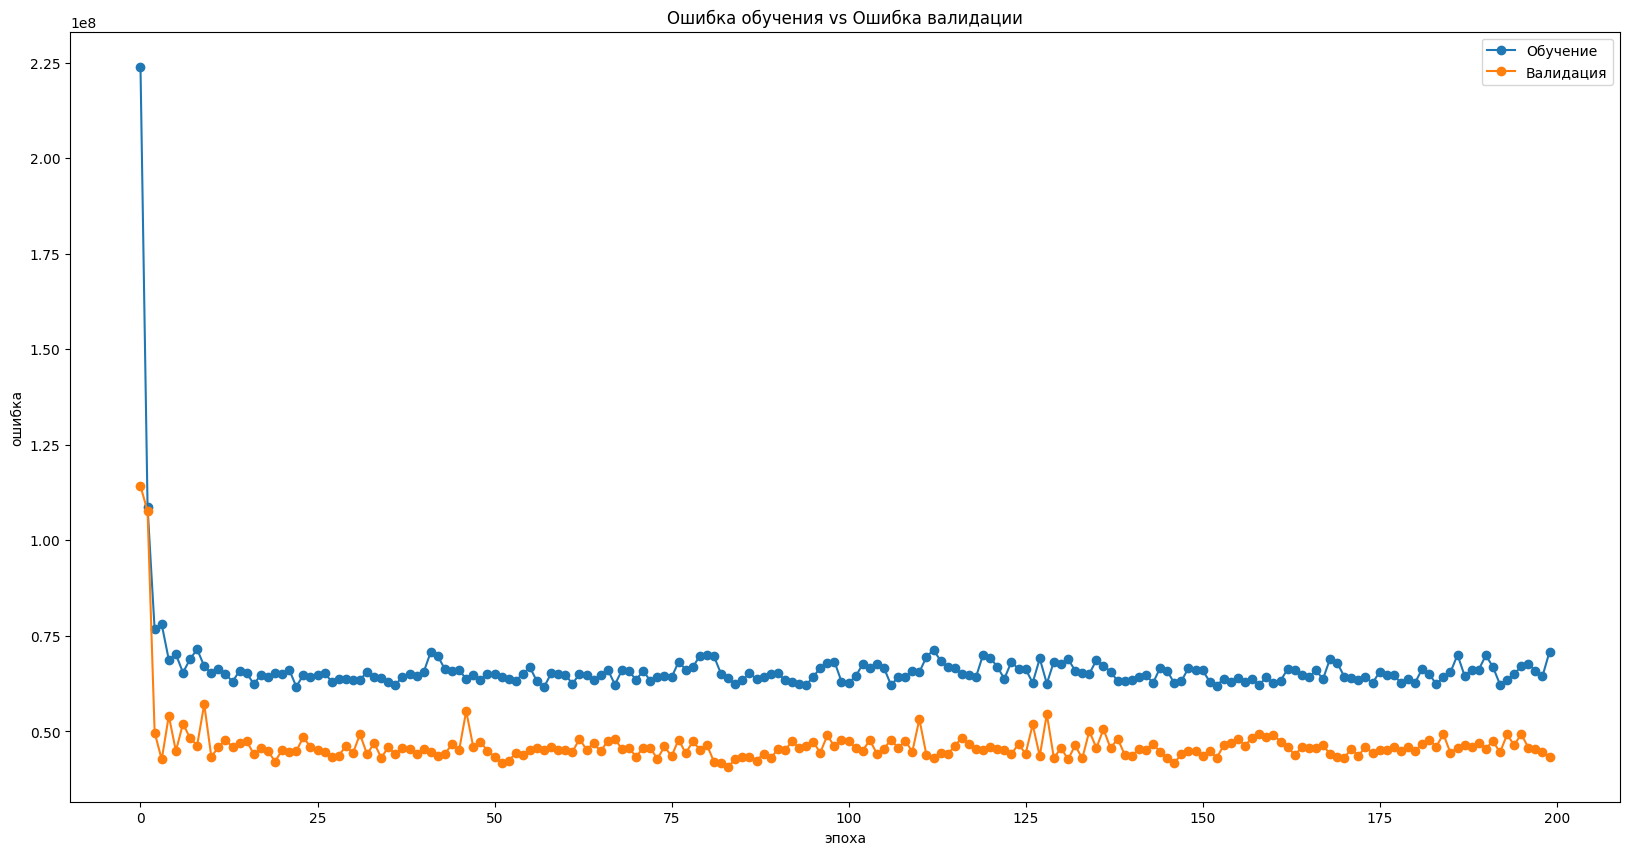

In [82]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()

не получается подобрать гиперпараметры, взрываются градиенты. возможные причины - маленький размер датасета, выбросы в таргете 

# Случайный лес

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
reg_forest_1 = RandomForestRegressor()

In [153]:
reg_forest_1.fit(X_train,y_train);
reg_forest_1.score(X_test,y_test)

0.9523206456305732

In [180]:
sum(tree.tree_.node_count for tree in reg_forest_1.estimators_)

19686

In [156]:
len(reg_forest_1.estimators_)

100

In [178]:
reg_forest_2 = RandomForestRegressor(n_estimators=100, max_depth=18)

In [179]:
reg_forest_2.fit(X_train,y_train);
reg_forest_2.score(X_test,y_test)

0.9533634966637569

In [181]:
sum(tree.tree_.node_count for tree in reg_forest_2.estimators_)

19848

# Бустинг

In [108]:
from sklearn.ensemble import AdaBoostRegressor

In [105]:
ABR_model = AdaBoostRegressor(
        n_estimators=500,
        learning_rate=0.1,
        random_state=42)
ABR_model.fit(X_train, y_train);
ABR_model.score(X_test, y_test)

0.9806122240055939

In [106]:
ABR_model.score(X_train, y_train)

0.9494246966969929

In [101]:
reg_lasso = linear_model.LassoCV(alphas=alphas, cv=10)
ABR_model2 = AdaBoostRegressor(estimator=reg_lasso,
        n_estimators=30,
        learning_rate=0.01,
        random_state=42)
ABR_model2.fit(X_train, y_train);
ABR_model2.score(X_test, y_test)

0.8209300573002403

In [107]:
ABR_model2.score(X_train, y_train)

0.8139810696462242